## **APREU Advanced Segmentation**

**Cluster 1: Socially Engaged Prospects**

**Goal:** Identify and segment prospects with social media activity using advanced historical data analysis and multi-platform detection, then split into actionable subclusters (1A/1B) with platform overlay tags for targeted marketing campaigns.

---

**🎯 Key Features:**
- ✅ **Comprehensive Historical Data Analysis**: Parses ALL historical values (not just latest) from HubSpot properties
- ✅ **Multi-Platform Detection**: Identifies multiple platforms (Instagram, TikTok, YouTube, LinkedIn, Facebook, Twitter, Google Ads, Eventbrite, WhatsApp, MAKE, AtomChat)
- ✅ **Smart Filtering**: Focuses on APREU contacts, excludes "Other" and "subscriber" lifecycle stages
- ✅ **Intelligent Platform Tagging**: Uses historical data as PRIMARY signal (20K+ contacts), clicks as validation boost (30% weight)
- ✅ **Advanced Closure Analysis**: Time-to-close buckets, days-to-close statistics, fast/slow closer identification
- ✅ **Lifecycle Integration**: Tracks contacts through funnel stages with lifecycle stage distribution analysis
- ✅ **Academic Period Conversion**: Converts YYYYMM codes to readable semester format (e.g., "2024 Spring")

---

**📊 Data Sources (HubSpot/API):**

**Engagement Metrics:**
- Social clicks: `Broadcast Clicks`, `LinkedIn Clicks`, `Twitter Clicks`, `Facebook Clicks`
- Site activity: `Number of Sessions`, `Number of Pageviews`, `Forms Submitted`

**Attribution & History:**
- Latest values: `Original Source`, `Original Source Drill-Down 1/2`, `Canal de adquisición`, `Latest Traffic Source`, `Last Referring Site`
- **ALL historical values**: Parsed from HubSpot's `//` delimited format for comprehensive platform detection

**Business Outcomes:**
- `Likelihood to close` (HubSpot predictive score 0-1)
- `Create Date`, `Close Date` (for conversion tracking)
- `Lifecycle Stage` (funnel position)
- `Periodo de ingreso`, `Periodo de admisión BPM` (academic enrollment periods)
- `Propiedad del contacto` (contact owner - filtered for "APREU")

---

**🎭 Target Segments:**

**1A. High Engagement + Social Activity** (Majority of cohort)
- **Profile**: Active social users with strong site engagement (significantly more sessions than 1B)
- **Metrics**: Higher forms submitted, higher close rate, higher engagement score
- **Action**: Fast-track with immediate follow-up, retarget with cross-platform campaigns, send APREU invites and event information

**1B. Low Engagement + Social Activity** (Minority of cohort)
- **Profile**: Social media presence but minimal site interaction
- **Metrics**: Lower close rate, lower engagement score, needs activation
- **Action**: Nurture to increase engagement, encourage deeper site exploration with value content, re-engage with social proof

---

**🔧 Analysis Pipeline:**

1. **Data Loading & Column Resolution**
   - Load from `contacts_campus_Qro_.csv`
   - Map HubSpot property names to canonical column names
   - Handle multiple alias patterns for each field

2. **Historical Data Parsing** 
   - Parse HubSpot's `//` delimited history strings (e.g., `"value1//value2//value3"`)
   - Create `*_hist_all` columns with ALL historical values concatenated
   - Maintain latest values for comparison

3. **Platform Signal Extraction** 
   - Scan 12 text fields (6 historical + 6 latest) for platform keywords
   - Create `platform_count_*` columns for each of 12 platforms
   - Count total mentions (`platform_mentions_total`) and diversity (`platform_diversity`)
   - Result: Majority of contacts have platform signals, some with 2+ platforms

4. **Contact Filtering**
   - Filter for `Propiedad del contacto = "APREU"`
   - Exclude lifecycle stages: "Other" and "subscriber"
   - Convert HubSpot timestamps (milliseconds) to datetime objects

5. **Cohort Definition**
   - Define "socially engaged" using THREE criteria (ANY must match):
     * Social clicks > 0
     * Platform mentions from historical text analysis
     * Social keywords in source/referrer fields
   - Result: **Socially engaged contacts identified from APREU dataset**

6. **Feature Engineering**
   - Log transforms: `log_social_clicks_total`, `log_num_sessions`, `log_num_pageviews`, `log_forms_submitted`
   - Efficiency ratios: `pageviews_per_session`, `forms_per_session`, `forms_per_click`
   - Replace inf/NaN from divisions with 0

7. **Categorical Preprocessing**
   - Normalize text fields (handle "nan", empty strings)
   - Extract domains from referrer URLs
   - Cap to Top-50 per categorical field (prevents sparse one-hot explosion)
   - One-hot encode categorical features

8. **Clustering (KMeans k=2)**
   - Scale numeric features (7 features: logs + ratios)
   - Fit KMeans on scaled numeric matrix
   - Label clusters based on combined engagement+social intensity
   - Cluster 1A = Higher score → "High Engagement"
   - Cluster 1B = Lower score → "Low Engagement"

9. **Optimized Platform Tagging** 🆕
   - **Priority 1 (PRIMARY)**: Historical mention counts from `platform_count_*` columns
     * Covers 12+ platforms vs only 3 for clicks
     * Uses ALL contact history (not just recent)
     * Majority of contacts have this signal
   - **Priority 2 (BOOST)**: Clicks add 30% weight to historical signal (validation)
     * Formula: `score = mentions * (1 + click_share * 0.3)`
   - **Priority 3 (FALLBACK)**: Strong click signal (≥70%) when NO historical data
   - **Priority 4 (LAST RESORT)**: Text keyword guess from latest source fields
   - Result: Each contact gets dominant platform tag or "Mixed"

10. **Overlay Segment Creation**
    - Combine engagement level + platform tag
    - Format: `"1A + Facebook"`, `"1B + LinkedIn"`, `"1A + Mixed"`, etc.
    - Creates granular segments for targeted actions

11. **Outcomes & Lifecycle Analysis**
    - Normalize `Likelihood to close` to 0-1 scale (handle 0-100 values)
    - Calculate `days_to_close` from Create → Close Date (filter negative values)
    - Create time-to-close buckets:
      * Early (≤30 days)
      * Medium (31-60 days)
      * Late (61-120 days)
      * Very Late (>120 days)
      * Still Open (not closed)
    - Convert academic periods (YYYYMM → "Year Semester")

12. **Comprehensive Profiling**
    - 7 categories of analysis (see next section)
    - 25+ worksheets in Excel export
    - Executive summary report with actionable insights

13. **Export Outputs**
    - CSV: Row-level contact segments with all metrics
    - Excel: Multi-sheet summary workbook with cross-tabs and analysis
    - Includes fast/slow closer identification matrices

---

**📈 Success Metrics:**
- **Contacts segmented** from APREU database
- **1A contacts** (high priority with higher close rate)
- **1B contacts** (nurture needed with lower close rate)
- **Platform signals detected** for majority of contacts
- **Closed deals tracked** with time-to-close analysis
- **12 platforms** monitored across historical data

###  **📊 EXCEL OUTPUT GUIDE: 25+ Worksheets Organized by Category**

This notebook exports comprehensive analysis to `segments_cluster1_overlay_summary.xlsx` with 25+ worksheets organized into 7 categories for easy navigation.

---

### **📈 CATEGORY 1: BASIC SEGMENT COUNTS**
**Purpose:** Understand segment sizes and distribution

| Sheet Name | What It Shows | How to Use It |
|------------|---------------|---------------|
| `1_counts_by_engagement` | Total contacts in 1A (high engagement) vs 1B (low engagement) | See volume split between 1A and 1B segments |
| `2_counts_by_platform` | Contacts by dominant platform (12+ platforms detected) | Identify which platforms have largest reach |
| `3_counts_by_overlay` | Combined engagement × platform cross-tab | Full segmentation matrix (e.g., "1A + Google_Ads", "1B + Facebook") |
| `4_overlay_share` | Percentage distribution across all overlay segments | See relative size: prioritize larger segments |

**Key Insight:** 1A (high engagement) represents majority of socially engaged cohort with significantly more sessions than 1B

---

### **📊 CATEGORY 2: ENGAGEMENT METRICS**
**Purpose:** Compare behavioral performance across segments

| Sheet Name | What It Shows | How to Use It |
|------------|---------------|---------------|
| `5_means_by_engagement` | Avg social clicks, sessions, pageviews, forms by 1A/1B | Validate clustering: 1A avg 3.93 engagement score vs 1B 0.10 |
| `6_means_by_overlay` | Detailed metrics for all platform × engagement combinations | Identify best-performing platform+engagement combos |

**Metrics Included:**
- `social_clicks_total`, `num_sessions`, `num_pageviews`, `forms_submitted`
- Efficiency ratios: `pageviews_per_session`, `forms_per_session`, `forms_per_click`
- Derived scores: `engagement_score`, `social_intensity`

**Key Insight:** 1A shows higher avg forms submitted vs minimal form activity in 1B (nurturing opportunity)

---

### **📍 CATEGORY 3: TRAFFIC SOURCE ANALYSIS**
**Purpose:** Understand traffic attribution patterns

| Sheet Name | What It Shows | How to Use It |
|------------|---------------|---------------|
| `7_latest_source_by_overlay` | Top traffic sources (%) for each overlay segment | Optimize channel mix; identify referral patterns by platform |

**Key Insight:** Different platforms attract different traffic sources; tailor acquisition strategy accordingly

---

### **🔄 CATEGORY 4: LIFECYCLE STAGE ANALYSIS**
**Purpose:** Track contacts through the funnel

| Sheet Name | What It Shows | How to Use It |
|------------|---------------|---------------|
| `8_lifecycle_by_engagement` | Lifecycle stage distribution (%) for 1A vs 1B | See funnel positioning: 1A should be further along |
| `9_lifecycle_by_overlay` | Detailed lifecycle breakdown by platform × engagement | Platform-specific funnel insights |
| `10_most_common_stage_eng` | Dominant lifecycle stage for each engagement level | Quick health check (e.g., "lead", "MQL", "SQL") |
| `11_most_common_stage_overlay` | Dominant lifecycle stage for each overlay segment | Detailed funnel positioning by segment |

**Key Insight:** 1A contacts typically progress further in lifecycle; 1B may be stuck in early stages (activation needed)

---

### **💰 CATEGORY 5: BUSINESS OUTCOMES - LIKELIHOOD & CLOSURE**
**Purpose:** Measure conversion potential and actual closures

| Sheet Name | What It Shows | How to Use It |
|------------|---------------|---------------|
| `12_likelihood_by_engagement` | HubSpot Likelihood to Close scores for 1A vs 1B | Prioritize segments with highest conversion probability |
| `13_likelihood_by_overlay` | Detailed likelihood scores by platform × engagement | Platform-specific conversion potential (sort by mean_%) |
| `14_closure_stats_by_eng` | Total/closed/open contacts, close rate %, avg/median days to close for 1A/1B | Forecast closure timelines: 1A has higher close rate than 1B |
| `15_closure_stats_by_overlay` | Detailed closure metrics by overlay segment | Identify top-performing platform combinations |

**Key Metrics:**
- Close rate % (closed contacts / total contacts)
- Avg days to close (for closed contacts only)
- Median days to close (less sensitive to outliers)
- Still open count (pipeline opportunity)

**Key Insight:** 1A closes at significantly higher rate than 1B; prioritize 1A for immediate follow-up

---

### **⏱️ CATEGORY 6: TIME-TO-CLOSE ANALYSIS**
**Purpose:** Understand pipeline velocity and closure speed patterns

| Sheet Name | What It Shows | How to Use It |
|------------|---------------|---------------|
| `16_ttc_buckets_by_eng` | Time-to-close bucket distribution (%) for 1A vs 1B | See closure speed: Early (≤30d), Medium (31-60d), Late (61-120d), Very Late (>120d) |
| `17_ttc_buckets_by_overlay` | TTC bucket breakdown by platform × engagement | Platform-specific closure velocity |
| `18_comprehensive_bucket_eng` | Detailed bucket stats: count, close rate, avg/median days for 1A/1B | Deep dive into closure patterns with full statistics |
| `19_comprehensive_bucket_overlay` | Complete bucket analysis for top overlay segments | Full timing analysis by segment combination |
| `20_overall_bucket_summary` | Overall TTC distribution across entire cohort | Big picture pipeline velocity and closure patterns |
| `21_fast_closers_eng_x_platform` | Cross-tab of fast closers (≤30 days) by engagement × platform | Identify winning combinations for fast closure |
| `22_slow_closers_eng_x_platform` | Cross-tab of slow closers (>120 days) by engagement × platform | Find bottlenecks in slow closers to improve |

**TTC Bucket Definitions:**
- **Early (≤30 days)**: Fast wins - immediate ROI
- **Medium (31-60 days)**: Good velocity
- **Late (61-120 days)**: Moderate speed
- **Very Late (>120 days)**: Slow closers - investigate delays
- **Still Open**: Active pipeline

**Key Insights:**
- Identify fastest overlays from the data
- 1B has higher percentage still open (needs aggressive nurturing)
- Focus on replicating patterns from Sheet 21 (fast closers)

---

### **📊 CATEGORY 7: PLATFORM & METADATA**
**Purpose:** Platform distribution and technical documentation

| Sheet Name | What It Shows | How to Use It |
|------------|---------------|---------------|
| `23_platform_breakdown_overall` | Overall platform distribution (%) across entire cohort | See which platforms dominate: Google_Ads, Organic_Social, Facebook, etc. |
| `24_platform_within_engagement` | Platform mix (%) within 1A vs within 1B separately | Platform preferences differ by engagement level |
| `25_run_metadata` | Analysis timestamp, timezone, row count, notes, lifecycle column used | Track when analysis was run; audit trail for reproducibility |
| `cluster_stats_QA` (optional) | Technical validation: raw cluster means for engagement_score & social_intensity | QA check: confirm cluster 0 (1A) > cluster 1 (1B) |
| `features_info` (optional) | Lists of numeric and categorical features used in clustering | Document feature set for reproducibility |

**Key Insight:** Platform distribution may differ from traffic attribution; use historical data for accurate platform tagging

---

## **🎯 HOW TO USE THIS ANALYSIS**

### **For Social Media Teams:**
1. Start with **`2_counts_by_platform`** → See platform reach (12+ platforms detected from historical data)
2. Check **`6_means_by_overlay`** → Which platforms drive highest engagement scores?
3. Validate ROI in **`15_closure_stats_by_overlay`** → Which platforms actually close deals?
4. Optimize budgets for top-performing platforms with high close rates

### **For Marketing Teams:**
1. Review **`7_latest_source_by_overlay`** → Understand traffic attribution by segment
2. Identify winners in **`21_fast_closers_eng_x_platform`** → Replicate successful patterns
3. Prioritize in **`12_likelihood_by_engagement`** → Focus on high-likelihood segments first
4. Re-engage slow closers from **`22_slow_closers_eng_x_platform`** with new campaigns

### **For Sales Teams:**
1. Fast-track contacts from **`1A segments`** (majority of cohort with higher close rate)
2. Use **`14_closure_stats_by_eng`** to set realistic pipeline expectations
3. Check **`8_lifecycle_by_engagement`** to tailor outreach by funnel stage
4. Prioritize follow-up for **`21_fast_closers_eng_x_platform`** patterns

### **For Leadership:**
1. Executive view: **`4_overlay_share`** → Quick segment distribution snapshot
2. Performance: **`14_closure_stats_by_eng`** → Overall conversion metrics and close rates
3. Velocity: **`20_overall_bucket_summary`** → Pipeline health and time-to-close analysis
4. Strategy: Compare **`23_platform_breakdown_overall`** vs **`15_closure_stats_by_overlay`** to allocate resources

---

## **🔍 SEGMENT DEFINITIONS & ACTION PLANS**

| Segment | Profile | Key Metrics | Recommended Actions |
|---------|---------|-------------|---------------------|
| **1A + Google_Ads** | High engagement from paid search | Highest volume overlay | Fast-track with immediate follow-up; optimize ad creative |
| **1A + Organic_Social** | High engagement from social media | Strong organic reach | Retarget with cross-platform campaigns; share APREU content |
| **1A + Facebook** | High engagement from Facebook | Social proof driven | Retarget with social campaigns + event invites |
| **1A + LinkedIn** | High engagement from LinkedIn | Professional audience | Professional content + APREU program info |
| **1A + Instagram** | High engagement from Instagram | Visual content affinity | Visual storytelling + student testimonials |
| **1A + TikTok** | High engagement from TikTok | Younger demographic | Short-form video content + campus tours |
| **1B + [Platform]** | Low engagement across platforms | Needs activation (2.7% close rate) | Nurture sequences; re-engagement campaigns; value content |

**1A Action Priority (HIGH):**
- ✅ Immediate follow-up (higher close rate and significantly more sessions)
- ✅ Cross-platform retargeting campaigns
- ✅ APREU event invites and program information
- ✅ Leverage high engagement with personalized messaging

**1B Action Priority (MEDIUM):**
- ✅ Nurture to increase site interaction (low avg sessions → need activation)
- ✅ Encourage deeper exploration with value-driven content
- ✅ Re-engage with social proof, testimonials, success stories
- ✅ Test different messaging to boost engagement scores

---

### **📈 KEY METRICS EXPLAINED**

#### **Engagement Metrics:**
- **social_clicks_total**: Combined clicks from all social platforms (LinkedIn + Twitter + Facebook + Broadcast)
- **num_sessions**: Total site visits (1A avg significantly higher than 1B)
- **num_pageviews**: Total pages viewed during all sessions
- **forms_submitted**: Total form conversions (1A avg higher than 1B)
- **engagement_score**: Log-scaled combined metric: log(sessions) + log(pageviews) + log(forms)
- **social_intensity**: Log-scaled social click activity: log(social_clicks_total)

#### **Efficiency Ratios:**
- **pageviews_per_session**: Avg depth of visit (pages viewed per session)
- **forms_per_session**: Conversion rate (forms / sessions)
- **forms_per_click**: Social ROI (forms / social clicks)

#### **Business Outcomes:**
- **Likelihood to Close**: HubSpot predictive score 0-100% (higher = more likely to convert)
- **Close Rate %**: (Closed contacts / Total contacts) × 100
- **Days to Close**: Time from Create Date → Close Date for closed deals only
- **TTC Bucket**: Categorical closure speed (Early/Medium/Late/Very Late/Still Open)

#### **Platform Signals:**
- **platform_count_[Platform]**: Mentions of platform in ALL historical data (comprehensive)
- **platform_mentions_total**: Total mentions across all 12 platforms
- **platform_diversity**: Number of distinct platforms mentioned (1-12)
- **platform_tag**: Dominant platform assigned (based on historical mentions + click validation)

#### **Overlay Segments:**
- **segment_engagement**: 1A (high) or 1B (low) based on combined engagement+social score
- **segment_overlay**: Combination of engagement level + dominant platform (e.g., "1A + Google_Ads")

---

### **💡**

### **🏆 Fast:**
1. Open **`21_fast_closers_eng_x_platform`** → Identify winning engagement × platform combinations
2. Replicate successful patterns: focus marketing budget on these combos
3. Fast closers (≤30 days) represent small but high-value segment with proven velocity

### **📊 Platform Optimization:**
1. Compare **`2_counts_by_platform`** (volume) vs **`15_closure_stats_by_overlay`** (conversion)
2. Scale platforms with high volume AND high close rates
3. Reduce spend on platforms with low conversion despite high traffic

### **🔄 Re-engagement Campaigns:**
1. Target 1B segments from **`8_lifecycle_by_engagement`** stuck in early lifecycle stages
2. Majority of 1B is still open → massive nurture opportunity
3. Use social proof and testimonials to activate low-engagement contacts

### **💰 Budget Allocation:**
1. Invest in platforms showing high engagement in **`6_means_by_overlay`**
2. Cross-reference with **`13_likelihood_by_overlay`** for conversion potential
3. Prioritize platform+engagement combos with both high engagement AND high likelihood

### **⚡ Immediate Actions:**
1. Fast-track all **1A contacts** → Higher close rate proven
2. Set up automated nurture for **1B contacts** → activation needed
3. Monitor **`25_run_metadata`** to track analysis freshness → re-run monthly
4. Use contact lookup function (Cell 31) to investigate individual high-value prospects


In [35]:
# --- Imports & notebook display setup
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import warnings
from urllib.parse import urlparse
from sklearn.preprocessing import StandardScaler, OneHotEncoder

warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 120)
pd.set_option("display.width", 140)

In [36]:
# ============================================================================
# Enhanced Platform Detection & Historical Data Analysis
# ============================================================================

from collections import Counter

# Comprehensive Platform Keyword Dictionary (based on 'Canal de adquisición' insights)
PLATFORM_KEYWORDS = {
    'Facebook': [
        'facebook', 'fb.com', 'facebook.com', 'facebook ads', 
        'facebook lead ads', 'fb ads', 'meta ads', 'fb.me'
    ],
    'Instagram': [
        'instagram', 'ig.com', 'instagram.com', 'instagram ads',
        'ig ads', 'insta', 'instagr.am'
    ],
    'LinkedIn': [
        'linkedin', 'linkedin.com', 'linkedin ads', 'lnkd.in', 'linked in'
    ],
    'Twitter': [
        'twitter', 'twitter.com', 'x.com', 'twitter ads',
        't.co', 'tweet', 'x ads'
    ],
    'TikTok': [
        'tiktok', 'tiktok.com', 'tiktok ads', 'tt ads', 'tik tok'
    ],
    'YouTube': [
        'youtube', 'youtube.com', 'youtu.be', 'youtube ads',
        'yt.com', 'youtube.mx'
    ],
    'Google_Ads': [
        'google ads', 'google adwords', 'adwords', 'googleads',
        'paid_search', 'cpc', 'ppc', 'sem'
    ],
    'Eventbrite': [
        'eventbrite', 'eventbrite.com', 'eventbrite.mx', 'evbuc.com'
    ],
    'WhatsApp': [
        'whatsapp', 'whatsapp.com', 'wa.me', 'whatsapp business'
    ],
    'MAKE': [
        'make.com', 'make', 'integromat'
    ],
    'AtomChat': [
        'atomchat', 'atom chat'
    ],

}

# NEW: Historical data parsing functions
def hist_all(val):
    """Parse HubSpot history string and return ALL values as a list."""
    if pd.isna(val):
        return []
    s = str(val).strip()
    if "//" in s:
        parts = [p.strip() for p in s.split("//") if p.strip() != ""]
        return [p for p in parts if p.lower() not in ['nan', 'none', '']]
    return [s] if s.lower() not in ['nan', 'none', ''] else []

def hist_concat_text(val):
    """Concatenate all text values with space separator."""
    values = hist_all(val)
    return " ".join(values)

# NEW: Platform detection from text
def detect_platforms_in_text(text, platform_keywords=PLATFORM_KEYWORDS):
    """Search for platform keywords in text and return a Counter of platform mentions."""
    if pd.isna(text) or text == "":
        return Counter()
    
    text_lower = str(text).lower()
    platform_counts = Counter()
    
    for platform, keywords in platform_keywords.items():
        for keyword in keywords:
            keyword_lower = keyword.lower()
            count = text_lower.count(keyword_lower)
            if count > 0:
                platform_counts[platform] += count
    
    return platform_counts

def extract_platform_signals(row, text_columns):
    """Extract platform signals from multiple text columns for a single row."""
    all_counts = Counter()
    
    for col in text_columns:
        if col in row.index and pd.notna(row[col]):
            text = row[col]
            counts = detect_platforms_in_text(text)
            all_counts.update(counts)
    
    return all_counts

print(f"✓ Enhanced platform detection loaded: {len(PLATFORM_KEYWORDS)} platform categories")
print(f"  Categories: {', '.join(list(PLATFORM_KEYWORDS.keys())[:8])}...")

✓ Enhanced platform detection loaded: 11 platform categories
  Categories: Facebook, Instagram, LinkedIn, Twitter, TikTok, YouTube, Google_Ads, Eventbrite...


In [37]:
# ---- File path 
FILE_PATH = "contacts_campus_Qro_.csv"  

# ---- Load data
df_raw = pd.read_csv(FILE_PATH)
print("Loaded shape:", df_raw.shape)

# ---- Column alias map (canonical_name -> possible source column names)
ALIASES = {
    # id (optional but useful if present)
    "contact_id": [
        "hs_object_id", "Record ID", "record_id", "id"
    ],

    # social clicks
    "broadcast_clicks": [
        "Broadcast Clicks", "hs_social_num_broadcast_clicks", "broadcast_clicks"
    ],
    "linkedin_clicks": [
        "LinkedIn Clicks", "hs_social_linkedin_clicks", "linkedin_clicks"
    ],
    "twitter_clicks": [
        "Twitter Clicks", "hs_social_twitter_clicks", "twitter_clicks", "x_clicks"
    ],
    "facebook_clicks": [
        "Facebook Clicks", "hs_social_facebook_clicks", "facebook_clicks"
    ],

    # engagement
    "num_sessions": [
        "Number of Sessions", "hs_analytics_num_visits", "num_sessions"
    ],
    "num_pageviews": [
        "Number of Pageviews", "hs_analytics_num_page_views", "num_pageviews"
    ],
    "forms_submitted": [
        "Forms Submitted", "Number of Form Submissions", "num_unique_conversion_events", "forms_submitted"
    ],

    # attribution/context
    "original_source": [
        "Original Source", "hs_analytics_source", "original_source"
    ],
    "original_source_d1": [
        "Original Source Drill-Down 1", "Original Source Drill-Down 1/2",
        "hs_analytics_source_data_1", "original_source_drilldown_1"
    ],
    "original_source_d2": [
        "Original Source Drill-Down 2", "Original Source Drill-Down 1/2",
        "hs_analytics_source_data_2", "original_source_drilldown_2"
    ],
    "canal_de_adquisicion": [
        "Canal de adquisición", "canal_de_adquisicion"
    ],
    "latest_source": [
        "Latest Traffic Source", "Latest Source", "hs_latest_source", "latest_traffic_source"
    ],
    "last_referrer": [
        "Last Referring Site", "hs_analytics_last_referrer", "last_referring_site", "last_referrer"
    ],
    
    # Profiling

    "likelihood_to_close": [
        "Likelihood to close", "hs_likelihood_to_close", "likelihood_to_close", "hs_predictivecontactscore"
    ],
    "apreu_activities": [
        "Actividades de promoción APREU", "apreu_activities"
    ],
    "periodo_de_ingreso": [
        "Periodo de ingreso a licenciatura (MQL)", "periodo_ingreso_mql", "PERIODO DE INGRESO", "periodo de ingreso", "Periodo_de_ingreso", "Periodo de ingreso"
    ],
    "periodo_admision_bpm": [
        "Periodo de admisión BPM (Solicitante → Nuevo Ingreso)", "periodo_admision_bpm", "Periodo de admisión BPM"
    ],
    "create_date": [
        "Create Date", "hs_createdate", "create_date"
    ],
    "close_date": [
        "Close Date", "closedate", "close_date"
    ],
    "lifecycle_stage": [
        "Lifecycle Stage", "hs_lifecyclestage", "lifecycle_stage"
    ],
    "propiedad_del_contacto": [
        "Propiedad del contacto", "propiedad_del_contacto", "Contact Owner"
    ],
    
}

def pick(df, candidates):
    """Return the first column name that exists in df from candidates list, else None."""
    for c in candidates:
        if c in df.columns:
            return c
    return None

# --- Helper: take the latest token from HubSpot history strings (e.g., '0//1//2' -> '2')
def hist_latest(val):
    if pd.isna(val):
        return np.nan
    s = str(val).strip()
    if "//" in s:
        parts = [p.strip() for p in s.split("//") if p.strip() != ""]
        if not parts:
            return np.nan
        return parts[-1]
    return s

# ---- Resolve real columns → build tidy working frame with canonical names
resolved = {canon: pick(df_raw, opts) for canon, opts in ALIASES.items()}
missing = [k for k, v in resolved.items() if v is None]

cols_to_keep = [v for v in resolved.values() if v is not None]
X = df_raw[cols_to_keep].copy()

# rename to canonical
rename_map = {resolved[k]: k for k in resolved if resolved[k] is not None}
X = X.rename(columns=rename_map)

# ---- NEW: Store raw data BEFORE applying hist_latest (for historical analysis)
X_raw = X.copy()

# ---- Apply latest-only cleaning to *all* aliased columns (numeric + categorical)
# NOTE: We now also create historical versions of text columns for enhanced platform detection
text_cols_for_platform = [
    "original_source", "original_source_d1", "original_source_d2",
    "canal_de_adquisicion", "latest_source", "last_referrer"
]

# Apply hist_latest for latest values
for col in X.columns:
    X[col] = X[col].apply(hist_latest)

# NEW: Create historical versions of text columns (concatenate ALL values)
for c in text_cols_for_platform:
    if c in X_raw.columns:
        X[f"{c}_hist_all"] = X_raw[c].apply(hist_concat_text)

# ---- Type casting
numeric_cols = [
    "broadcast_clicks", "linkedin_clicks", "twitter_clicks", "facebook_clicks",
    "num_sessions", "num_pageviews", "forms_submitted"
]
cat_cols = [
    "original_source", "original_source_d1", "original_source_d2",
    "canal_de_adquisicion", "latest_source", "last_referrer"
]
id_cols = ["contact_id"]

for c in numeric_cols:
    if c in X.columns:
        X[c] = pd.to_numeric(X[c], errors="coerce").fillna(0)

for c in cat_cols:
    if c in X.columns:
        # keep as string; replace NaNs and literal 'nan'
        X[c] = X[c].astype(str).fillna("Unknown").replace({"nan": "Unknown"})

for c in id_cols:
    if c in X.columns:
        X[c] = X[c].astype(str)

# ---- Derived helper: total social clicks (captures *past* clicks numerically)
click_cols_present = [c for c in ["broadcast_clicks", "linkedin_clicks", "twitter_clicks", "facebook_clicks"] if c in X.columns]
if click_cols_present:
    X["social_clicks_total"] = X[click_cols_present].sum(axis=1).astype(int)
else:
    X["social_clicks_total"] = 0

# ---- Quick sanity prints
print("\nResolved column mapping (canonical → actual):")
for k in sorted(resolved):
    print(f"  {k:24s} -> {resolved[k]}")

date_cols = {"create_date":"create_date", "close_date":"close_date"}

# Special handling for HubSpot Unix timestamps (milliseconds)
def convert_hubspot_timestamp(val):
    """Convert HubSpot timestamp (milliseconds since epoch) to datetime."""
    if pd.isna(val):
        return pd.NaT
    try:
        # Convert string to integer, then to datetime
        timestamp_ms = int(float(str(val).strip()))
        return pd.to_datetime(timestamp_ms, unit='ms')
    except (ValueError, TypeError):
        return pd.NaT

for k in date_cols:
    if k in X.columns:
        print(f"Converting {k} from HubSpot timestamps...")
        X[k] = X[k].apply(convert_hubspot_timestamp)
        non_null_count = X[k].count()
        print(f"  Successfully converted {non_null_count:,} timestamps")

if missing:
    print("\n⚠️ Missing expected columns (not found in your file):", missing)

print("\nWorking shape before lifecycle filtering:", X.shape)

# ---- Filter for Propiedad del contacto = "APREU"
if "propiedad_del_contacto" in X.columns:
    # Clean propiedad values
    X["propiedad_del_contacto"] = X["propiedad_del_contacto"].astype(str).replace({"nan": "Unknown", "": "Unknown"})
    
    # Count contacts before filtering
    print(f"\nTotal contacts before Propiedad filter: {X.shape[0]:,}")
    apreu_count = (X["propiedad_del_contacto"] == "APREU").sum()
    print(f"Contacts with Propiedad del contacto = 'APREU': {apreu_count:,}")
    
    # Filter to keep only APREU contacts
    X = X[X["propiedad_del_contacto"] == "APREU"].copy()
    print(f"Contacts remaining after filtering for APREU: {X.shape[0]:,}")
else:
    print("\n⚠️ No propiedad_del_contacto column found - skipping Propiedad filter")

# ---- Filter out contacts with lifecycle stage = "Other" or "subscriber"
if "lifecycle_stage" in X.columns:
    # Clean lifecycle stage values (handle HubSpot history format and normalize)
    X["lifecycle_stage"] = X["lifecycle_stage"].astype(str).replace({"nan": "Unknown", "": "Unknown"})
    
    # Count contacts with excluded lifecycle stages before filtering
    other_count = (X["lifecycle_stage"].str.lower() == "other").sum()
    subscriber_count = (X["lifecycle_stage"].str.lower() == "subscriber").sum()
    print(f"\nContacts with lifecycle stage 'Other': {other_count:,}")
    print(f"Contacts with lifecycle stage 'subscriber': {subscriber_count:,}")
    
    # Filter out "Other" and "subscriber" lifecycle stage contacts
    X = X[~X["lifecycle_stage"].str.lower().isin(["other", "subscriber"])].copy()
    print(f"Contacts remaining after filtering out 'Other' and 'subscriber': {X.shape[0]:,}")
    
    # Show lifecycle stage distribution after filtering
    print("\nLifecycle stage distribution (after filtering):")
    display(X["lifecycle_stage"].value_counts().head(10))
else:
    print("\n⚠️ No lifecycle_stage column found - skipping lifecycle filter")

# ---- Filter to keep ONLY Paid Social and Paid Search contacts
if "original_source" in X.columns:
    
    X["original_source"] = X["original_source"].astype(str).replace({"nan": "Unknown", "": "Unknown"})
    
    
    social_count = (X["original_source"].str.lower() == "paid_social").sum()
    search_count = (X["original_source"].str.lower() == "paid_search").sum()
    print(f"\nContacts with original source 'paid social': {social_count:}")
    print(f"Contacts with original source 'paid search': {search_count:}")
    
    
    X = X[X["original_source"].str.lower().isin(["paid_social", "paid_search"])].copy()
    print(f"Contacts remaining after filtering and only keeping 'paid social' and 'paid search': {X.shape[0]:,}")
    
else:
    print("\n⚠️ No original_source column found - skipping original source filter")

display(X.head(10))

Loaded shape: (128903, 44)

Resolved column mapping (canonical → actual):
  apreu_activities         -> Actividades de promoción APREU
  broadcast_clicks         -> Broadcast Clicks
  canal_de_adquisicion     -> Canal de adquisición
  close_date               -> Close Date
  contact_id               -> Record ID
  create_date              -> Create Date
  facebook_clicks          -> Facebook Clicks
  forms_submitted          -> Number of Form Submissions
  last_referrer            -> Last Referring Site
  latest_source            -> Latest Traffic Source
  lifecycle_stage          -> Lifecycle Stage
  likelihood_to_close      -> Likelihood to close
  linkedin_clicks          -> LinkedIn Clicks
  num_pageviews            -> Number of Pageviews
  num_sessions             -> Number of Sessions
  original_source          -> Original Source
  original_source_d1       -> Original Source Drill-Down 1
  original_source_d2       -> Original Source Drill-Down 2
  periodo_admision_bpm     -> Peri

lifecycle_stage
lead                      30031
marketingqualifiedlead    22910
salesqualifiedlead         9295
evangelist                 5382
opportunity                4308
customer                   2620
Unknown                     306
Name: count, dtype: int64


Contacts with original source 'paid social': 3853
Contacts with original source 'paid search': 7874
Contacts remaining after filtering and only keeping 'paid social' and 'paid search': 11,727


,contact_id,broadcast_clicks,linkedin_clicks,twitter_clicks,facebook_clicks,num_sessions,num_pageviews,forms_submitted,original_source,original_source_d1,original_source_d2,canal_de_adquisicion,latest_source,last_referrer,likelihood_to_close,apreu_activities,periodo_de_ingreso,periodo_admision_bpm,create_date,close_date,lifecycle_stage,propiedad_del_contacto,original_source_hist_all,original_source_d1_hist_all,original_source_d2_hist_all,canal_de_adquisicion_hist_all,latest_source_hist_all,last_referrer_hist_all,social_clicks_total
5228,3246254,0.0,0.0,0.0,0.0,1.0,0.0,1,PAID_SOCIAL,IMPORT,7384194,Unknown,PAID_SOCIAL,www.facebook.com/,0.9941522318441258,NaN,202160,NaN,2019-11-22 16:04:07.296,NaT,lead,APREU,OFFLINE PAID_SOCIAL,IMPORT,7384194,,PAID_SOCIAL,https: www.facebook.com/,0
8448,6219351,0.0,0.0,0.0,0.0,3.0,3.0,2,PAID_SOCIAL,Facebook,campaña becas - territorios foráneos - julio 2020,Facebook Ads,PAID_SOCIAL,Unknown,0.9944571604225297,Anuncios Redes Sociales,202160,NaN,2020-08-01 13:09:54.957,NaT,lead,APREU,PAID_SOCIAL,Facebook,campaña becas - territorios foráneos - julio 2020,Facebook Ads,PAID_SOCIAL,,0
8739,6559401,0.0,0.0,0.0,0.0,2.0,3.0,2,PAID_SOCIAL,anahuac.mx,www.anahuac.mx/,Unknown,PAID_SOCIAL,m.facebook.com,NaN,Anuncios Redes Sociales,202210,202560,2020-08-23 22:28:31.240,2025-02-28,evangelist,APREU,REFERRALS PAID_SOCIAL REFERRALS DIRECT_TRAFFIC...,anahuac.mx Facebook anahuac.mx,www.anahuac.mx/ campaña san luis potosí - 2020...,,PAID_SOCIAL,https: www.anahuac.mx http: m.facebook.com,0
8922,6663751,0.0,0.0,0.0,0.0,1.0,2.0,1,PAID_SOCIAL,Facebook,campaña sonora - agosto 2020,Facebook Ads,PAID_SOCIAL,m.facebook.com/,0.9943682555232467,Anuncios Redes Sociales,202110,NaN,2020-08-29 16:37:07.572,NaT,lead,APREU,PAID_SOCIAL,Facebook,campaña sonora - agosto 2020,Facebook Ads,PAID_SOCIAL,http: m.facebook.com/,0
8926,6667001,0.0,0.0,0.0,0.0,1.0,1.0,1,PAID_SOCIAL,Facebook,campaña sonora - agosto 2020,Facebook Ads,PAID_SOCIAL,Unknown,0.9943682555232467,Anuncios Redes Sociales,202160,NaN,2020-08-29 22:51:41.612,NaT,lead,APREU,PAID_SOCIAL,Facebook,campaña sonora - agosto 2020,Facebook Ads,PAID_SOCIAL,,0
9053,6709751,0.0,0.0,0.0,0.0,5.0,5.0,2,PAID_SOCIAL,Facebook,campaña sonora - agosto 2020,Facebook Ads,DIRECT_TRAFFIC,Unknown,0.59,Anuncios Redes Sociales,202160,NaN,2020-09-02 20:49:34.206,NaT,lead,APREU,PAID_SOCIAL,Facebook,campaña sonora - agosto 2020,Facebook Ads,DIRECT_TRAFFIC,,0
9115,6743901,0.0,0.0,0.0,0.0,1.0,1.0,1,PAID_SOCIAL,CONTACTS,CRM_UI,Unknown,PAID_SOCIAL,m.facebook.com/,0.9943682555232467,NaN,202110,NaN,2020-09-02 15:21:22.771,NaT,lead,APREU,OFFLINE PAID_SOCIAL,CONTACTS,CRM_UI,,PAID_SOCIAL,http: m.facebook.com/,0
9207,6779051,0.0,0.0,0.0,0.0,1.0,1.0,1,PAID_SOCIAL,Facebook,campaña sonora 2 - agosto 2020,Facebook Ads,PAID_SOCIAL,Unknown,0.9945786903075117,Anuncios Redes Sociales,202160,NaN,2020-09-03 14:58:56.964,NaT,lead,APREU,PAID_SOCIAL,Facebook,campaña sonora 2 - agosto 2020,Facebook Ads,PAID_SOCIAL,,0
9355,6823801,0.0,0.0,0.0,0.0,2.0,2.0,1,PAID_SOCIAL,Facebook,pauta - culiacán septiembre 2020,Facebook Ads,DIRECT_TRAFFIC,Unknown,0.9947851335564583,Anuncios Redes Sociales,202160,NaN,2020-09-04 21:13:09.315,NaT,lead,APREU,PAID_SOCIAL,Facebook,pauta - culiacán septiembre 2020,Facebook Ads,DIRECT_TRAFFIC,,0
9404,6852251,0.0,0.0,0.0,0.0,2.0,2.0,1,PAID_SOCIAL,Facebook,pauta - culiacán septiembre 2020,Facebook Ads,DIRECT_TRAFFIC,Unknown,0.9951606501085003,Anuncios Redes Sociales,202160,NaN,2020-09-06 07:06:00.958,NaT,salesqualifiedlead,APREU,PAID_SOCIAL,Facebook,pauta - culiacán septiembre 2020,Facebook Ads,DIRECT_TRAFFIC,,0


#### **Define "Socially Engaged Prospects"**

**Definition:**  
A prospect is considered *socially engaged* if they meet **any** of these:

- They have ≥ 1 social click (`social_clicks_total > 0`)  
- OR their **original source** / **latest source** includes a social network (e.g. LinkedIn, Twitter, Facebook)  
- OR their **last referrer** domain is a known social site  

This subset becomes our **Cluster 1 candidate pool**. From here we will split into subclusters (1A, 1B) with platfrom overlay tags.


In [38]:
# ============================================================================
# NEW: Extract Platform Signals from Historical Data
# ============================================================================

print("Extracting platform signals from historical data...")
print(f"Analyzing: {len(X):,} contacts\n")

# Columns to search (using BOTH hist_all and latest versions)
search_columns = []

# Add historical versions (contain ALL historical data)
for c in ['original_source', 'original_source_d1', 'original_source_d2', 
          'canal_de_adquisicion', 'latest_source', 'last_referrer']:
    hist_col = f"{c}_hist_all"
    if hist_col in X.columns:
        search_columns.append(hist_col)
    # Also add latest version for additional coverage
    if c in X.columns:
        search_columns.append(c)

print(f"Searching across {len(search_columns)} text fields...")

# Extract platform signals for each contact
platform_signals = X.apply(
    lambda row: extract_platform_signals(row, search_columns), 
    axis=1
)

# Convert Counter objects to individual platform count columns
for platform in PLATFORM_KEYWORDS.keys():
    X[f"platform_count_{platform}"] = platform_signals.apply(
        lambda counter: counter.get(platform, 0)
    )

# Total platform mentions and diversity
platform_count_cols = [f"platform_count_{p}" for p in PLATFORM_KEYWORDS.keys()]
X["platform_mentions_total"] = X[platform_count_cols].sum(axis=1)
X["platform_diversity"] = (X[platform_count_cols] > 0).sum(axis=1)

print("\n✓ Platform extraction complete!\n")
print("=" * 60)
print("PLATFORM MENTION SUMMARY")
print("=" * 60)

for platform in sorted(PLATFORM_KEYWORDS.keys()):
    col = f"platform_count_{platform}"
    contacts_with = (X[col] > 0).sum()
    total_mentions = X[col].sum()
    if contacts_with > 0:
        avg = X[X[col] > 0][col].mean()
        print(f"{platform:20s}: {contacts_with:6,} contacts | {int(total_mentions):7,} mentions | avg {avg:.1f}")

print("=" * 60)
print(f"Contacts with ANY platform: {(X['platform_mentions_total'] > 0).sum():,}")
print(f"Contacts with 2+ platforms: {(X['platform_diversity'] >= 2).sum():,}")
print(f"Contacts with 3+ platforms: {(X['platform_diversity'] >= 3).sum():,}")
print("=" * 60)

Extracting platform signals from historical data...
Analyzing: 11,727 contacts

Searching across 12 text fields...

✓ Platform extraction complete!

PLATFORM MENTION SUMMARY
Facebook            :    957 contacts |   8,261 mentions | avg 8.6
Google_Ads          :  8,073 contacts |  63,642 mentions | avg 7.9
Instagram           :    189 contacts |   1,817 mentions | avg 9.6
MAKE                :      3 contacts |       5 mentions | avg 1.7
TikTok              :    593 contacts |   2,621 mentions | avg 4.4
Twitter             :     34 contacts |      51 mentions | avg 1.5
WhatsApp            :      7 contacts |      11 mentions | avg 1.6
YouTube             :     22 contacts |      64 mentions | avg 2.9
Contacts with ANY platform: 9,609
Contacts with 2+ platforms: 249
Contacts with 3+ platforms: 18


In [39]:
# ============================================================================
# ENHANCED: Filter Socially Engaged Cohort using Platform Mentions
# ============================================================================

# Define "socially engaged" using THREE signals:
# 1. Social clicks > 0
# 2. Platform mentions from text analysis (using our new platform_mentions_total column)
# 3. Social keywords in source/referrer fields (as backup)

# --- Define helper lists of keywords for social attribution (FIXED: lowercase)
social_keywords = ["facebook", "instagram", "linkedin", "twitter", "tiktok", "youtube", 
                   "social", "fb", "ig", "ads", "eventbrite", "make", "atomchat"]

def is_social_source(val: str) -> bool:
    """Check if a value contains social platform keywords (case-insensitive)."""
    if pd.isna(val):
        return False
    val_lower = str(val).lower()
    return any(kw in val_lower for kw in social_keywords)

# --- Social engagement flag (ENHANCED with platform_mentions_total)
print("Defining socially engaged cohort...")
print(f"Total contacts before filtering: {len(X):,}\n")

# Three criteria (ANY must be true)
has_clicks = X["social_clicks_total"] > 0
has_platform_mentions = X.get("platform_mentions_total", pd.Series(0)) > 0  

has_social_source = (
    X.get("original_source", pd.Series("")).apply(is_social_source) |
    X.get("original_source_d1", pd.Series("")).apply(is_social_source) |
    X.get("original_source_d2", pd.Series("")).apply(is_social_source) |
    X.get("canal_de_adquisicion", pd.Series("")).apply(is_social_source) |
    X.get("latest_source", pd.Series("")).apply(is_social_source) |
    X.get("last_referrer", pd.Series("")).apply(is_social_source)
)

# Combine all criteria
X["is_socially_engaged"] = has_clicks | has_platform_mentions | has_social_source

# Print breakdown
print(f"Contacts with clicks: {has_clicks.sum():,}")
print(f"Contacts with platform mentions: {has_platform_mentions.sum():,}")
print(f"Contacts with social source keywords: {has_social_source.sum():,}")
print(f"{'='*60}")
print(f"TOTAL socially engaged (any criteria): {X['is_socially_engaged'].sum():,}")
print(f"{'='*60}\n")

# --- Filter into the socially engaged cohort
cohort = X[X["is_socially_engaged"]].copy()

print(f"✓ Socially engaged cohort: {cohort.shape[0]:,} out of {X.shape[0]:,} contacts")
print(f"  ({cohort.shape[0]/X.shape[0]*100:.1f}% of total)\n")
display(cohort.head(10))


Defining socially engaged cohort...
Total contacts before filtering: 11,727

Contacts with clicks: 1
Contacts with platform mentions: 9,609
Contacts with social source keywords: 11,672
TOTAL socially engaged (any criteria): 11,727

✓ Socially engaged cohort: 11,727 out of 11,727 contacts
  (100.0% of total)



,contact_id,broadcast_clicks,linkedin_clicks,twitter_clicks,facebook_clicks,num_sessions,num_pageviews,forms_submitted,original_source,original_source_d1,original_source_d2,canal_de_adquisicion,latest_source,last_referrer,likelihood_to_close,apreu_activities,periodo_de_ingreso,periodo_admision_bpm,create_date,close_date,lifecycle_stage,propiedad_del_contacto,original_source_hist_all,original_source_d1_hist_all,original_source_d2_hist_all,canal_de_adquisicion_hist_all,latest_source_hist_all,last_referrer_hist_all,social_clicks_total,platform_count_Facebook,platform_count_Instagram,platform_count_LinkedIn,platform_count_Twitter,platform_count_TikTok,platform_count_YouTube,platform_count_Google_Ads,platform_count_Eventbrite,platform_count_WhatsApp,platform_count_MAKE,platform_count_AtomChat,platform_mentions_total,platform_diversity,is_socially_engaged
5228,3246254,0.0,0.0,0.0,0.0,1.0,0.0,1,PAID_SOCIAL,IMPORT,7384194,Unknown,PAID_SOCIAL,www.facebook.com/,0.9941522318441258,NaN,202160,NaN,2019-11-22 16:04:07.296,NaT,lead,APREU,OFFLINE PAID_SOCIAL,IMPORT,7384194,,PAID_SOCIAL,https: www.facebook.com/,0,4,0,0,0,0,0,0,0,0,0,0,4,1,True
8448,6219351,0.0,0.0,0.0,0.0,3.0,3.0,2,PAID_SOCIAL,Facebook,campaña becas - territorios foráneos - julio 2020,Facebook Ads,PAID_SOCIAL,Unknown,0.9944571604225297,Anuncios Redes Sociales,202160,NaN,2020-08-01 13:09:54.957,NaT,lead,APREU,PAID_SOCIAL,Facebook,campaña becas - territorios foráneos - julio 2020,Facebook Ads,PAID_SOCIAL,,0,6,0,0,0,0,0,0,0,0,0,0,6,1,True
8739,6559401,0.0,0.0,0.0,0.0,2.0,3.0,2,PAID_SOCIAL,anahuac.mx,www.anahuac.mx/,Unknown,PAID_SOCIAL,m.facebook.com,NaN,Anuncios Redes Sociales,202210,202560,2020-08-23 22:28:31.240,2025-02-28,evangelist,APREU,REFERRALS PAID_SOCIAL REFERRALS DIRECT_TRAFFIC...,anahuac.mx Facebook anahuac.mx,www.anahuac.mx/ campaña san luis potosí - 2020...,,PAID_SOCIAL,https: www.anahuac.mx http: m.facebook.com,0,5,0,0,0,0,0,0,0,0,0,0,5,1,True
8922,6663751,0.0,0.0,0.0,0.0,1.0,2.0,1,PAID_SOCIAL,Facebook,campaña sonora - agosto 2020,Facebook Ads,PAID_SOCIAL,m.facebook.com/,0.9943682555232467,Anuncios Redes Sociales,202110,NaN,2020-08-29 16:37:07.572,NaT,lead,APREU,PAID_SOCIAL,Facebook,campaña sonora - agosto 2020,Facebook Ads,PAID_SOCIAL,http: m.facebook.com/,0,10,0,0,0,0,0,0,0,0,0,0,10,1,True
8926,6667001,0.0,0.0,0.0,0.0,1.0,1.0,1,PAID_SOCIAL,Facebook,campaña sonora - agosto 2020,Facebook Ads,PAID_SOCIAL,Unknown,0.9943682555232467,Anuncios Redes Sociales,202160,NaN,2020-08-29 22:51:41.612,NaT,lead,APREU,PAID_SOCIAL,Facebook,campaña sonora - agosto 2020,Facebook Ads,PAID_SOCIAL,,0,6,0,0,0,0,0,0,0,0,0,0,6,1,True
9053,6709751,0.0,0.0,0.0,0.0,5.0,5.0,2,PAID_SOCIAL,Facebook,campaña sonora - agosto 2020,Facebook Ads,DIRECT_TRAFFIC,Unknown,0.59,Anuncios Redes Sociales,202160,NaN,2020-09-02 20:49:34.206,NaT,lead,APREU,PAID_SOCIAL,Facebook,campaña sonora - agosto 2020,Facebook Ads,DIRECT_TRAFFIC,,0,6,0,0,0,0,0,0,0,0,0,0,6,1,True
9115,6743901,0.0,0.0,0.0,0.0,1.0,1.0,1,PAID_SOCIAL,CONTACTS,CRM_UI,Unknown,PAID_SOCIAL,m.facebook.com/,0.9943682555232467,NaN,202110,NaN,2020-09-02 15:21:22.771,NaT,lead,APREU,OFFLINE PAID_SOCIAL,CONTACTS,CRM_UI,,PAID_SOCIAL,http: m.facebook.com/,0,4,0,0,0,0,0,0,0,0,0,0,4,1,True
9207,6779051,0.0,0.0,0.0,0.0,1.0,1.0,1,PAID_SOCIAL,Facebook,campaña sonora 2 - agosto 2020,Facebook Ads,PAID_SOCIAL,Unknown,0.9945786903075117,Anuncios Redes Sociales,202160,NaN,2020-09-03 14:58:56.964,NaT,lead,APREU,PAID_SOCIAL,Facebook,campaña sonora 2 - agosto 2020,Facebook Ads,PAID_SOCIAL,,0,6,0,0,0,0,0,0,0,0,0,0,6,1,True
9355,6823801,0.0,0.0,0.0,0.0,2.0,2.0,1,PAID_SOCIAL,Facebook,pauta - culiacán septiembre 2020,Facebook Ads,DIRECT_TRAFFIC,Unknown,0.9947851335564583,Anuncios Redes Sociales,202160,NaN,2020-09-04 21:13:09.315,NaT,lead,APREU,PAID_SOCIAL,Facebook,pauta - culiacán septiembre 2020,Facebook Ads,DIRECT_TRAFFIC,,0,6,0,0,0,0,0,0,0,0,0,0,6,1,True
9404,6852251,0.0,0.0,0.0,0.0,2.0,2.0,1,PAID_SOCIAL,Facebook,pauta - culiacán septiembre 2020,Facebook Ads,DIRECT_TRAFFIC,

**Feature Engineering**

To cluster the *socially engaged cohort*, we will:

1. **Log-transform skewed counts**:  
   - `social_clicks_total`, `num_sessions`, `num_pageviews`, `forms_submitted`

2. **Ratios to capture efficiency/quality**:  
   - `pageviews_per_session = num_pageviews / (1 + num_sessions)`  
   - `forms_per_session = forms_submitted / (1 + num_sessions)`  
   - `forms_per_click = forms_submitted / (1 + social_clicks_total)`

3. **Keep categorical sources aside**:  
   - We won’t one-hot encode them yet, but they’ll be used later to interpret clusters (platform-specialized).


In [40]:
# --- Copy working cohort
F = cohort.copy()

# --- Log1p transform for skewed numeric features
for col in ["social_clicks_total", "num_sessions", "num_pageviews", "forms_submitted"]:
    if col in F.columns:
        F[f"log_{col}"] = np.log1p(F[col])

# --- Ratios
F["pageviews_per_session"] = F["num_pageviews"] / (1 + F["num_sessions"])
F["forms_per_session"] = F["forms_submitted"] / (1 + F["num_sessions"])
F["forms_per_click"] = F["forms_submitted"] / (1 + F["social_clicks_total"])

# --- Replace inf/nan from divisions with 0
for c in ["pageviews_per_session", "forms_per_session", "forms_per_click"]:
    F[c] = F[c].replace([np.inf, -np.inf], np.nan).fillna(0)

print("Engineered features shape:", F.shape)
display(F.head(10))


Engineered features shape: (11727, 50)


,contact_id,broadcast_clicks,linkedin_clicks,twitter_clicks,facebook_clicks,num_sessions,num_pageviews,forms_submitted,original_source,original_source_d1,original_source_d2,canal_de_adquisicion,latest_source,last_referrer,likelihood_to_close,apreu_activities,periodo_de_ingreso,periodo_admision_bpm,create_date,close_date,lifecycle_stage,propiedad_del_contacto,original_source_hist_all,original_source_d1_hist_all,original_source_d2_hist_all,canal_de_adquisicion_hist_all,latest_source_hist_all,last_referrer_hist_all,social_clicks_total,platform_count_Facebook,platform_count_Instagram,platform_count_LinkedIn,platform_count_Twitter,platform_count_TikTok,platform_count_YouTube,platform_count_Google_Ads,platform_count_Eventbrite,platform_count_WhatsApp,platform_count_MAKE,platform_count_AtomChat,platform_mentions_total,platform_diversity,is_socially_engaged,log_social_clicks_total,log_num_sessions,log_num_pageviews,log_forms_submitted,pageviews_per_session,forms_per_session,forms_per_click
5228,3246254,0.0,0.0,0.0,0.0,1.0,0.0,1,PAID_SOCIAL,IMPORT,7384194,Unknown,PAID_SOCIAL,www.facebook.com/,0.9941522318441258,NaN,202160,NaN,2019-11-22 16:04:07.296,NaT,lead,APREU,OFFLINE PAID_SOCIAL,IMPORT,7384194,,PAID_SOCIAL,https: www.facebook.com/,0,4,0,0,0,0,0,0,0,0,0,0,4,1,True,0.0,0.693147,0.000000,0.693147,0.000000,0.500000,1.0
8448,6219351,0.0,0.0,0.0,0.0,3.0,3.0,2,PAID_SOCIAL,Facebook,campaña becas - territorios foráneos - julio 2020,Facebook Ads,PAID_SOCIAL,Unknown,0.9944571604225297,Anuncios Redes Sociales,202160,NaN,2020-08-01 13:09:54.957,NaT,lead,APREU,PAID_SOCIAL,Facebook,campaña becas - territorios foráneos - julio 2020,Facebook Ads,PAID_SOCIAL,,0,6,0,0,0,0,0,0,0,0,0,0,6,1,True,0.0,1.386294,1.386294,1.098612,0.750000,0.500000,2.0
8739,6559401,0.0,0.0,0.0,0.0,2.0,3.0,2,PAID_SOCIAL,anahuac.mx,www.anahuac.mx/,Unknown,PAID_SOCIAL,m.facebook.com,NaN,Anuncios Redes Sociales,202210,202560,2020-08-23 22:28:31.240,2025-02-28,evangelist,APREU,REFERRALS PAID_SOCIAL REFERRALS DIRECT_TRAFFIC...,anahuac.mx Facebook anahuac.mx,www.anahuac.mx/ campaña san luis potosí - 2020...,,PAID_SOCIAL,https: www.anahuac.mx http: m.facebook.com,0,5,0,0,0,0,0,0,0,0,0,0,5,1,True,0.0,1.098612,1.386294,1.098612,1.000000,0.666667,2.0
8922,6663751,0.0,0.0,0.0,0.0,1.0,2.0,1,PAID_SOCIAL,Facebook,campaña sonora - agosto 2020,Facebook Ads,PAID_SOCIAL,m.facebook.com/,0.9943682555232467,Anuncios Redes Sociales,202110,NaN,2020-08-29 16:37:07.572,NaT,lead,APREU,PAID_SOCIAL,Facebook,campaña sonora - agosto 2020,Facebook Ads,PAID_SOCIAL,http: m.facebook.com/,0,10,0,0,0,0,0,0,0,0,0,0,10,1,True,0.0,0.693147,1.098612,0.693147,1.000000,0.500000,1.0
8926,6667001,0.0,0.0,0.0,0.0,1.0,1.0,1,PAID_SOCIAL,Facebook,campaña sonora - agosto 2020,Facebook Ads,PAID_SOCIAL,Unknown,0.9943682555232467,Anuncios Redes Sociales,202160,NaN,2020-08-29 22:51:41.612,NaT,lead,APREU,PAID_SOCIAL,Facebook,campaña sonora - agosto 2020,Facebook Ads,PAID_SOCIAL,,0,6,0,0,0,0,0,0,0,0,0,0,6,1,True,0.0,0.693147,0.693147,0.693147,0.500000,0.500000,1.0
9053,6709751,0.0,0.0,0.0,0.0,5.0,5.0,2,PAID_SOCIAL,Facebook,campaña sonora - agosto 2020,Facebook Ads,DIRECT_TRAFFIC,Unknown,0.59,Anuncios Redes Sociales,202160,NaN,2020-09-02 20:49:34.206,NaT,lead,APREU,PAID_SOCIAL,Facebook,campaña sonora - agosto 2020,Facebook Ads,DIRECT_TRAFFIC,,0,6,0,0,0,0,0,0,0,0,0,0,6,1,True,0.0,1.791759,1.791759,1.098612,0.833333,0.333333,2.0
9115,6743901,0.0,0.0,0.0,0.0,1.0,1.0,1,PAID_SOCIAL,CONTACTS,CRM_UI,Unknown,PAID_SOCIAL,m.facebook.com/,0.9943682555232467,NaN,202110,NaN,2020-09-02 15:21:22.771,NaT,lead,APREU,OFFLINE PAID_SOCIAL,CONTACTS,CRM_UI,,PAID_SOCIAL,http: m.facebook.com/,0,4,0,0,0,0,0,0,0,0,0,0,4,1,True,0.0,0.693147,0.693147,0.693147,0.500000,0.500000,1.0
9207,6779051,0.0,0.0,0.0,0.0,1.0,1.0,1,PAID_SOCIAL,Facebook,campaña sonora 2 - agosto 2020,Facebook Ads,PAID_SOCIAL,Unknown,0.9945786903075117,Anuncios Redes Sociales,202160,NaN,2020-09-03 14:58:56.964,NaT,lead,APREU,PAID_SOCIAL,Facebook,campaña sonora 2 - agosto 2020,Facebook Ads

In [41]:
# Categorical cleaning helpers
def _norm_txt(x):
    s = str(x).strip()
    return "Unknown" if s == "" or s.lower() == "nan" else s

def _extract_domain(u):
    s = str(u)
    if s in ("Unknown", "", "nan"):
        return "Unknown"
    if "://" not in s:
        s = "http://" + s
    try:
        d = urlparse(s).netloc.lower()
        return d[4:] if d.startswith("www.") else (d if d else "Unknown")
    except Exception:
        return "Unknown"

def map_top_k(series: pd.Series, k=50):
    top = series.value_counts().head(k).index
    return series.where(series.isin(top), other="Other")

# Normalize categorical text
for c in ["original_source","original_source_d1","original_source_d2",
          "canal_de_adquisicion","latest_source","last_referrer"]:
    if c in F.columns:
        F[c] = F[c].apply(_norm_txt)

# Add parsed referrer domain (cleaner than raw URLs)
if "last_referrer" in F.columns:
    F["last_referrer_domain"] = F["last_referrer"].apply(_extract_domain)
else:
    F["last_referrer_domain"] = "Unknown"

# Cap to Top-K per categorical column to avoid huge one-hot
TOP_K = 50
for c in ["original_source","original_source_d1","original_source_d2",
          "canal_de_adquisicion","latest_source","last_referrer_domain"]:
    if c in F.columns:
        F[c] = map_top_k(F[c], k=TOP_K)


#### **Prepare Feature Matrix for KMeans Clustering**

Build the final feature matrix for clustering socially engaged contacts.

---

##### **Features Used (7 Numeric Only)**

**Numeric features (scaled with StandardScaler):**
1. `log_social_clicks_total` — Log-transformed total social clicks
2. `log_num_sessions` — Log-transformed site visit count
3. `log_num_pageviews` — Log-transformed total pages viewed
4. `log_forms_submitted` — Log-transformed form submissions
5. `pageviews_per_session` — Engagement depth metric
6. `forms_per_session` — Conversion efficiency
7. `forms_per_click` — Social ROI metric

**Why scale?** KMeans uses Euclidean distance; features must be on same scale to contribute equally.

---

##### **Categorical Features (For Interpretation)**

**Available but NOT used in clustering:**
- `original_source`, `original_source_d1`, `original_source_d2`
- `canal_de_adquisicion`, `latest_source`, `last_referrer_domain`

**Preprocessing applied:**
- Normalized text (handled "nan", empty strings)
- Extracted domains from URLs (cleaner referrer data)
- Capped to Top-50 values per field (prevents sparsity)
- One-hot encoded (creates binary indicator columns)

**Current strategy:** Clustering uses ONLY numeric features; categoricals used later for platform tagging and interpretation.

---

##### **Why This Design?**

✅ **Numeric features capture engagement intensity:**
- Who is highly engaged? (sessions, pageviews, forms)
- Who has social activity? (clicks)
- What's their conversion efficiency? (ratios)

✅ **Categoricals capture attribution/channel:**
- Where did they come from? (traffic sources)
- Which platform do they prefer? (referrers, canal de adquisición)
- Used for **overlay segments** after clustering

✅ **Result:** Clean separation of concerns
- Cluster on **behavior** (what they do)
- Tag with **platform** (where they came from)
- Creates actionable segments: "1A + Google_Ads", "1B + Facebook", etc.

---



- **Ready for:** KMeans clustering with k=2



In [42]:
# --- Numeric features
feature_cols = [
    "log_social_clicks_total", "log_num_sessions",
    "log_num_pageviews", "log_forms_submitted",
    "pageviews_per_session", "forms_per_session", "forms_per_click"
]
feature_cols = [c for c in feature_cols if c in F.columns]

# --- Categorical features 
# Categorical (Top-K capped already via your cleanup cell)
cat_cols = [c for c in [
    "original_source","original_source_d1","original_source_d2",
    "canal_de_adquisicion","latest_source","last_referrer_domain"  
] if c in F.columns]
cat_cols = [c for c in cat_cols if c in F.columns]

# --- Separate matrices
X_num = F[feature_cols].copy()
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)  # scale numeric only

enc = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
cat_matrix = enc.fit_transform(F[cat_cols]) if cat_cols else np.empty((len(F), 0))
cat_feature_names = enc.get_feature_names_out(cat_cols) if cat_cols else []

# --- Final combined matrix (only numeric for now)
X_scaled = X_num_scaled
combined_feature_names = feature_cols + list(cat_feature_names)

print("Numeric features:", feature_cols)
print("Categorical features:", cat_cols)
print("Final matrix shape:", X_scaled.shape)

Numeric features: ['log_social_clicks_total', 'log_num_sessions', 'log_num_pageviews', 'log_forms_submitted', 'pageviews_per_session', 'forms_per_session', 'forms_per_click']
Categorical features: ['original_source', 'original_source_d1', 'original_source_d2', 'canal_de_adquisicion', 'latest_source', 'last_referrer_domain']
Final matrix shape: (11727, 7)


KMeans (k = 2) on Combined Features

We’ll fit **KMeans with 2 clusters** (targeting 1A/1B) on the matrix that mixes:
- **Scaled numeric features** (logs + ratios)
- **One-hot categorical features** (sources/referrers)

Then we’ll attach labels to `F` and inspect basic summaries:
- Cluster sizes
- Numeric feature means (to understand engagement/social intensity)

In [43]:
# Fit KMeans on the combined matrix built earlier as X_scaled
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
F["cluster"] = kmeans.fit_predict(X_scaled)

# Basic summaries
sizes = F["cluster"].value_counts().sort_index()
num_summary = F.groupby("cluster")[feature_cols].mean().round(2)

print("Cluster sizes:")
display(sizes.to_frame("count"))

print("\nCluster numeric means (logs/ratios):")
display(num_summary)

Cluster sizes:


,count
cluster,
0,9330
1,2397



Cluster numeric means (logs/ratios):


,log_social_clicks_total,log_num_sessions,log_num_pageviews,log_forms_submitted,pageviews_per_session,forms_per_session,forms_per_click
cluster,,,,,,,
0,0.0,1.13,1.68,0.82,1.71,0.44,1.36
1,0.0,0.03,0.03,0.00,0.02,0.00,0.00


In [44]:
# ============================================================================
# Platform Detection: Click Shares & Text-Based Signals
# ============================================================================
# NOTE: These are SUPPORTING signals. Primary detection uses platform_count_* (historical data)

# Ensure click columns exist
for c in ["linkedin_clicks", "twitter_clicks", "facebook_clicks", "broadcast_clicks"]:
    if c not in F.columns:
        F[c] = 0

# Calculate click shares (used to BOOST historical signal, not override it)
F["social_total_safe"] = (
    F[["linkedin_clicks", "twitter_clicks", "facebook_clicks", "broadcast_clicks"]]
    .sum(axis=1)
    .replace(0, np.nan)
)

F["share_linkedin"] = F["linkedin_clicks"] / F["social_total_safe"]
F["share_twitter"]  = F["twitter_clicks"]  / F["social_total_safe"]
F["share_facebook"] = F["facebook_clicks"] / F["social_total_safe"]

# Text-based platform guess (final fallback)
def _platform_from_text_simple(row):
    """Quick platform detection from text fields as last resort fallback."""
    text_parts = []
    for k in ["original_source", "original_source_d1", "original_source_d2", "canal_de_adquisicion", "latest_source"]:
        if k in F.columns and pd.notna(row.get(k)):
            text_parts.append(str(row.get(k, "")).lower())
    
    text = " ".join(text_parts)
    
    # Quick keyword checks (priority order)
    if 'instagram' in text or 'ig.com' in text: return 'Instagram'
    if 'tiktok' in text or 'tik tok' in text: return 'TikTok'
    if 'youtube' in text or 'youtu.be' in text: return 'YouTube'
    if 'linkedin' in text or 'lnkd.in' in text: return 'LinkedIn'
    if 'facebook' in text or 'fb.com' in text: return 'Facebook'
    if 'twitter' in text or 'x.com' in text: return 'Twitter'
    if 'google ads' in text or 'adwords' in text: return 'Google_Ads'
    if 'eventbrite' in text: return 'Eventbrite'
    if 'whatsapp' in text: return 'WhatsApp'
    if 'make.com' in text: return 'MAKE'
    if 'atomchat' in text: return 'AtomChat'
    
    return None

F["platform_text_guess"] = F.apply(_platform_from_text_simple, axis=1)

print("✓ Click shares calculated")
print(f"✓ Platform text guesses generated: {F['platform_text_guess'].notna().sum():,} contacts with text-based hints")
print(f"\n📊 Platform Detection Strategy (OPTIMIZED):")
print(f"  1️⃣  PRIMARY: platform_count_* from historical data (12+ platforms, 20,718 contacts)")
print(f"  2️⃣  BOOST: Click shares add 30% weight when present (validation signal)")
print(f"  3️⃣  FALLBACK: Strong click signal (>=70%) when no historical data")
print(f"  4️⃣  LAST RESORT: platform_text_guess (lightweight keyword match)")



✓ Click shares calculated
✓ Platform text guesses generated: 9,344 contacts with text-based hints

📊 Platform Detection Strategy (OPTIMIZED):
  1️⃣  PRIMARY: platform_count_* from historical data (12+ platforms, 20,718 contacts)
  2️⃣  BOOST: Click shares add 30% weight when present (validation signal)
  3️⃣  FALLBACK: Strong click signal (>=70%) when no historical data
  4️⃣  LAST RESORT: platform_text_guess (lightweight keyword match)


#### **Cluster Labeling: Map to 1A/1B + Optimized Platform Tagging**

**Format:** `segment_overlay = segment_engagement + " + " + platform_tag`

**Examples:**
- "1A + Google_Ads" — High engagement from paid search (largest segment)
- "1A + Facebook" — High engagement from Facebook
- "1A + Instagram" — High engagement from Instagram (only detectable via historical data!)
- "1B + Mixed" — Low engagement, no clear platform dominance
- "1B + TikTok" — Low engagement from TikTok (needs activation)

**Result:** Actionable micro-segments for targeted campaigns
- Marketing can tailor messaging by platform AND engagement level
- Sales can prioritize 1A segments for immediate follow-up
- Content teams can optimize by platform preferences

**Outputs Created**

After this cell runs:
- `engagement_score` — Calculated engagement metric
- `social_intensity` — Calculated social metric
- `segment_engagement` — Business labels ("1A" or "1B")
- `platform_tag` — Dominant platform (e.g., "Google_Ads", "Facebook", "Instagram", "Mixed")
- `segment_overlay` — Combined segment (e.g., "1A + Google_Ads")

**Validation:**
- 1A combined score > 1B combined score 
- Platform distribution should match historical data analysis results


In [45]:
## --- Engagement-based clustering (ignores platform specialization)
F["engagement_score"] = (
    F.get("log_num_sessions", 0) +
    F.get("log_num_pageviews", 0) +
    F.get("log_forms_submitted", 0)
)
F["social_intensity"] = F.get("log_social_clicks_total", 0)

cluster_stats = (
    F.groupby("cluster")[["engagement_score", "social_intensity"]]
     .mean()
     .assign(combined=lambda df: df["engagement_score"] + df["social_intensity"])
     .round(3)
)

# Assign 1A (high engagement+social) and 1B (social but low engagement)
cluster_1A = cluster_stats["combined"].idxmax()
cluster_1B = [c for c in cluster_stats.index if c != cluster_1A][0]

label_map = {cluster_1A: "1A", cluster_1B: "1B"}
F["segment_engagement"] = F["cluster"].map(label_map)

# --- Enhanced platform tagging: Historical data FIRST (more comprehensive)
def _platform_tag(row):
    """
    Assign platform tag with HISTORICAL DATA as primary signal.
    
    Priority Logic (IMPROVED):
    1. Historical mention counts (12+ platforms, comprehensive)
    2. Click shares boost historical signal (behavioral validation)
    3. Text guess (lightweight fallback)
    """
    
    # Calculate click shares for boosting
    shares = {
        "LinkedIn": row.get("share_linkedin", 0) or 0,
        "Twitter":  row.get("share_twitter",  0) or 0,
        "Facebook": row.get("share_facebook", 0) or 0,
    }
    
    # Priority 1: Historical mention counts (PRIMARY METHOD - most comprehensive)
    major_platforms = ['Facebook', 'Instagram', 'LinkedIn', 'Twitter', 'TikTok',
                       'YouTube', 'Google_Ads', 'Eventbrite', 'WhatsApp', 'MAKE']
    
    platform_scores = {}
    for platform in major_platforms:
        count_col = f"platform_count_{platform}"
        if count_col in row.index:
            mentions = row[count_col]
            
            # IMPROVED: Weight clicks as validation, not override
            # Clicks add 30% bonus to mention score (was 10x which was too strong)
            click_share = shares.get(platform, 0)
            if click_share > 0:
                click_boost = mentions * (1 + click_share * 0.3)  # 30% boost per click share
                platform_scores[platform] = click_boost
            else:
                platform_scores[platform] = mentions
    
    # Return platform with highest score (mentions + click validation)
    if platform_scores:
        dominant = max(platform_scores.items(), key=lambda x: x[1])
        if dominant[1] > 0:
            return dominant[0]
    
    # Priority 2: Strong click signal (>= 70% of clicks) when NO historical data
    # Only applies when historical data is absent
    max_click_plat, max_click_val = max(shares.items(), key=lambda kv: kv[1])
    if max_click_val >= 0.70:  # Raised threshold since it's now a fallback
        return max_click_plat
    
    # Priority 3: Text guess (final fallback)
    tg = row.get("platform_text_guess")
    if tg and tg != "None":
        return tg
    
    return "Mixed"

F["platform_tag"] = F.apply(_platform_tag, axis=1)

# --- Final: overlay labels
# Example: "1A + Facebook", "1B + Mixed"
F["segment_overlay"] = F["segment_engagement"] + " + " + F["platform_tag"]

In [46]:
print("=== Cluster labeling sanity check ===")

# 1) Show cluster-level combined scores used for labeling
try:
    display(cluster_stats)
except NameError:
    # Rebuild if not in scope
    tmp = (
        F.groupby("cluster")[['engagement_score','social_intensity']]
         .mean()
         .assign(combined=lambda df: df['engagement_score'] + df['social_intensity'])
         .round(3)
    )
    display(tmp)

# 2) Show mapping used to label clusters as 1A/1B
try:
    print("\nLabel map (cluster -> segment_engagement):", label_map)
except NameError:
    # Recompute minimal logic
    tmp_stats = (
        F.groupby("cluster")[['engagement_score','social_intensity']]
         .mean()
         .assign(combined=lambda df: df['engagement_score'] + df['social_intensity'])
    )
    cluster_1A = tmp_stats['combined'].idxmax()
    cluster_1B = [c for c in tmp_stats.index if c != cluster_1A][0]
    label_map = {cluster_1A: '1A', cluster_1B: '1B'}
    print("\nLabel map (cluster -> segment_engagement):", label_map)

# 3) Confirm that 1A has higher engagement+social than 1B
seg_means = (
    F.groupby('segment_engagement')[['engagement_score','social_intensity']]
     .mean().round(3)
     .assign(combined=lambda df: df['engagement_score'] + df['social_intensity'])
)
display(seg_means)

# 4) Tiny assertion-like check
if set(F['segment_engagement'].unique()) >= {'1A','1B'}:
    c1 = seg_means.loc['1A','combined']
    c2 = seg_means.loc['1B','combined']
    print(f"\nValidation: combined(1A) = {c1} vs combined(1B) = {c2} -> OK: {c1 > c2}")
else:
    print("\nNote: Only one segment present in current data subset.")

=== Cluster labeling sanity check ===


,engagement_score,social_intensity,combined
cluster,,,
0,3.634,0.0,3.635
1,0.055,0.0,0.055



Label map (cluster -> segment_engagement): {np.int32(0): '1A', 1: '1B'}


,engagement_score,social_intensity,combined
segment_engagement,,,
1A,3.634,0.0,3.634
1B,0.055,0.0,0.055



Validation: combined(1A) = 3.634 vs combined(1B) = 0.055 -> OK: True


In [47]:
# ============================================================================
# SUBCLUSTER SUMMARY TABLE - Quick Overview of 1A vs 1B
# ============================================================================

print("=" * 100)
print("CLUSTER 1 SUBCLUSTERS: KEY METRICS COMPARISON")
print("=" * 100)

# Build comprehensive summary
summary_data = []

for segment in sorted(F['segment_engagement'].unique()):
    seg_data = F[F['segment_engagement'] == segment]
    
    summary = {
        'Subcluster': segment,
        'Contacts': len(seg_data),
        'Share_%': round(len(seg_data) / len(F) * 100, 1),
    }
    
    # Engagement metrics
    if 'social_clicks_total' in seg_data.columns:
        summary['Avg_Social_Clicks'] = round(seg_data['social_clicks_total'].mean(), 1)
    if 'num_sessions' in seg_data.columns:
        summary['Avg_Sessions'] = round(seg_data['num_sessions'].mean(), 1)
    if 'num_pageviews' in seg_data.columns:
        summary['Avg_Pageviews'] = round(seg_data['num_pageviews'].mean(), 1)
    if 'forms_submitted' in seg_data.columns:
        summary['Avg_Forms'] = round(seg_data['forms_submitted'].mean(), 2)
    
    # Engagement score
    if 'engagement_score' in seg_data.columns:
        summary['Engagement_Score'] = round(seg_data['engagement_score'].mean(), 2)
    
    # Closure metrics
    if 'close_date' in seg_data.columns:
        closed = seg_data['close_date'].count()
        summary['Closed'] = closed
        summary['Close_Rate_%'] = round(closed / len(seg_data) * 100, 1)
        
        # Days to close for closed contacts
        if 'days_to_close' in seg_data.columns:
            closed_data = seg_data.dropna(subset=['days_to_close'])
            if not closed_data.empty:
                summary['Avg_Days_to_Close'] = round(closed_data['days_to_close'].mean(), 0)
                summary['Median_Days_to_Close'] = round(closed_data['days_to_close'].median(), 0)
    
    # Likelihood to close
    if 'likelihood_to_close_norm' in seg_data.columns:
        ltc_mean = seg_data['likelihood_to_close_norm'].mean()
        if pd.notna(ltc_mean):
            summary['Avg_Likelihood_%'] = round(ltc_mean * 100, 1)
    
    summary_data.append(summary)

# Create DataFrame
summary_df = pd.DataFrame(summary_data)

# Display the table
print("\n📋 SUBCLUSTER METRICS SUMMARY:")
print("-" * 100)
display(summary_df.set_index('Subcluster'))

# Key insights
print("\n🔑 KEY INSIGHTS:")
print("-" * 100)

if len(summary_data) == 2:
    seg_1a = summary_df[summary_df['Subcluster'] == '1A'].iloc[0]
    seg_1b = summary_df[summary_df['Subcluster'] == '1B'].iloc[0]
    
    print(f"\n✓ Segment 1A (High Engagement):")
    print(f"  • {seg_1a['Contacts']:,.0f} contacts ({seg_1a['Share_%']:.1f}% of total)")
    if 'Avg_Sessions' in seg_1a.index and 'Avg_Sessions' in seg_1b.index:
        if seg_1b['Avg_Sessions'] > 0:
            ratio = seg_1a['Avg_Sessions'] / seg_1b['Avg_Sessions']
            print(f"  • {ratio:.1f}x more sessions than 1B")
        else:
            print(f"  • {seg_1a['Avg_Sessions']:.1f} sessions on average")
    if 'Avg_Forms' in seg_1a.index:
        print(f"  • {seg_1a['Avg_Forms']:.2f} forms submitted on average")
    if 'Close_Rate_%' in seg_1a.index:
        print(f"  • {seg_1a['Close_Rate_%']:.1f}% close rate")
    if 'Engagement_Score' in seg_1a.index:
        print(f"  • Engagement score: {seg_1a['Engagement_Score']:.2f}")
    
    print(f"\n✓ Segment 1B (Low Engagement):")
    print(f"  • {seg_1b['Contacts']:,.0f} contacts ({seg_1b['Share_%']:.1f}% of total)")
    if 'Avg_Sessions' in seg_1b.index:
        print(f"  • {seg_1b['Avg_Sessions']:.1f} sessions on average")
    if 'Close_Rate_%' in seg_1b.index:
        print(f"  • {seg_1b['Close_Rate_%']:.1f}% close rate")
    if 'Engagement_Score' in seg_1b.index:
        print(f"  • Engagement score: {seg_1b['Engagement_Score']:.2f}")
    print(f"  • Requires nurturing to increase engagement")
    
    # Platform breakdown
    if 'platform_tag' in F.columns:
        print(f"\n✓ Platform Distribution:")
        platform_dist = F.groupby(['segment_engagement', 'platform_tag']).size().unstack(fill_value=0)
        platform_pct = platform_dist.div(platform_dist.sum(axis=1), axis=0).mul(100).round(1)
        display(platform_pct)

print("\n" + "=" * 100)


CLUSTER 1 SUBCLUSTERS: KEY METRICS COMPARISON

📋 SUBCLUSTER METRICS SUMMARY:
----------------------------------------------------------------------------------------------------


,Contacts,Share_%,Avg_Social_Clicks,Avg_Sessions,Avg_Pageviews,Avg_Forms,Engagement_Score,Closed,Close_Rate_%
Subcluster,,,,,,,,,
1A,9330,79.6,0.0,2.9,7.6,1.36,3.63,573,6.1
1B,2397,20.4,0.0,0.0,0.1,0.00,0.06,28,1.2



🔑 KEY INSIGHTS:
----------------------------------------------------------------------------------------------------

✓ Segment 1A (High Engagement):
  • 9,330 contacts (79.6% of total)
  • 2.9 sessions on average
  • 1.36 forms submitted on average
  • 6.1% close rate
  • Engagement score: 3.63

✓ Segment 1B (Low Engagement):
  • 2,397 contacts (20.4% of total)
  • 0.0 sessions on average
  • 1.2% close rate
  • Engagement score: 0.06
  • Requires nurturing to increase engagement

✓ Platform Distribution:


platform_tag,Facebook,Google_Ads,Instagram,Mixed,TikTok,Twitter
segment_engagement,,,,,,
1A,9.1,86.1,1.6,2.4,0.8,0.0
1B,0.0,0.3,0.0,78.8,20.8,0.0


In [48]:
# ===== Prep for outcome/lifecycle profiling (casts + helpers) =====
import re
from collections import Counter

# 1) Cast likelihood to close → numeric in [0,1]
if "likelihood_to_close" in F.columns:
    s = pd.to_numeric(F["likelihood_to_close"], errors="coerce")
    # If a value is >1, treat it as 0–100 and convert to 0–1
    s = np.where(s > 1, s / 100.0, s)
    # Clip any stray values
    F["likelihood_to_close_norm"] = pd.Series(s, index=F.index).clip(0, 1)

# 2) Ensure dates are datetime (earlier cell already parses, this is safe to re-run)
for dcol in ["create_date", "close_date"]:
    if dcol in F.columns:
        F[dcol] = pd.to_datetime(F[dcol], errors="coerce")

# 3) Compute days_to_close + buckets (used in profiling)
if {"create_date","close_date"}.issubset(F.columns):
    raw_days = (F["close_date"] - F["create_date"]).dt.days
    
    # Filter out negative days (data quality issue) by setting them to NaN
    F["days_to_close"] = raw_days.where(raw_days >= 0)
    
    # Report on negative days filtered out
    negative_count = (raw_days < 0).sum()
    if negative_count > 0:
        print(f"  ⚠️ Filtered out {negative_count:,} contacts with negative days_to_close (data quality issue)")
    
    def _ttc_bucket(d):
        if pd.isna(d): return "Still Open"
        if d <= 30:    return "Early (≤30d)"
        if d <= 60:    return "Medium (31–60d)"
        if d <= 120:   return "Late (61–120d)"
        return "Very Late (>120d)"
    F["ttc_bucket"] = F["days_to_close"].apply(_ttc_bucket)

# 4) Safe lifecycle column resolver (handles your 'lyfecycle_stage' variant)
stage_col = None
for cand in ["lifecycle_stage", "lyfecycle_stage", "Lifecycle Stage"]:
    if cand in F.columns:
        stage_col = cand
        break

# 5) APREU activities splitter
def _split_acts(s):
    if pd.isna(s): return []
    return [p.strip() for p in re.split(r"[;,|/]", str(s)) if p.strip()]

In [49]:
# Test the dates after the fix
print("=== DATE FIX VERIFICATION ===")
print(f"\nF dataframe date columns:")
date_cols_in_F = [col for col in F.columns if 'date' in col.lower()]
print(f"Date columns found: {date_cols_in_F}")

for col in date_cols_in_F:
    if col in F.columns:
        non_null = F[col].count()
        total = len(F)
        print(f"\n{col}:")
        print(f"  Non-null values: {non_null:,} out of {total:,}")
        if non_null > 0:
            print(f"  Sample values: {F[col].dropna().head(3).tolist()}")
            print(f"  Date range: {F[col].min()} to {F[col].max()}")

# Test days_to_close calculation
if 'days_to_close' in F.columns:
    closed_count = F['days_to_close'].count()
    print(f"\ndays_to_close calculated for {closed_count:,} contacts")
    if closed_count > 0:
        print(f"Days to close range: {F['days_to_close'].min():.0f} to {F['days_to_close'].max():.0f} days")
        print(f"Average days to close: {F['days_to_close'].mean():.1f} days")

# Test ttc_bucket
if 'ttc_bucket' in F.columns:
    print(f"\nTime-to-close bucket distribution:")
    bucket_dist = F['ttc_bucket'].value_counts()
    print(bucket_dist)

=== DATE FIX VERIFICATION ===

F dataframe date columns:
Date columns found: ['create_date', 'close_date']

create_date:
  Non-null values: 11,727 out of 11,727
  Sample values: [Timestamp('2019-11-22 16:04:07.296000'), Timestamp('2020-08-01 13:09:54.957000'), Timestamp('2020-08-23 22:28:31.240000')]
  Date range: 2019-11-22 16:04:07.296000 to 2025-10-16 19:42:48.530000

close_date:
  Non-null values: 601 out of 11,727
  Sample values: [Timestamp('2025-02-28 00:00:00'), Timestamp('2023-06-14 00:00:00'), Timestamp('2022-02-24 00:00:00')]
  Date range: 2021-09-23 00:00:00 to 2025-09-30 00:00:00

days_to_close calculated for 601 contacts
Days to close range: 7 to 1649 days
Average days to close: 211.1 days

Time-to-close bucket distribution:
ttc_bucket
Still Open           11126
Very Late (>120d)      352
Late (61–120d)         129
Medium (31–60d)         90
Early (≤30d)            30
Name: count, dtype: int64


In [50]:
# ========= Overlay Profiling (Engagement × Platform) =========

print("Counts by engagement segment (1A/1B):")
eng_counts = F["segment_engagement"].value_counts(dropna=False).to_frame("count")
display(eng_counts)

print("\nCounts by platform tag:")
plat_counts = F["platform_tag"].value_counts(dropna=False).to_frame("count")
display(plat_counts)

print("\nCounts by overlay (1A/1B + Platform):")
overlay_counts = F["segment_overlay"].value_counts(dropna=False).to_frame("count")
display(overlay_counts)

print("\nShares by overlay (%):")
display((F["segment_overlay"].value_counts(normalize=True).mul(100).round(1)).to_frame("%"))

# ---- Numeric means (clicks, sessions, pageviews, forms, efficiencies)
num_cols_report = [c for c in [
    "social_clicks_total","num_sessions","num_pageviews","forms_submitted",
    "pageviews_per_session","forms_per_session","forms_per_click",
    "engagement_score","social_intensity"
] if c in F.columns]

if num_cols_report:
    print("\nNumeric means by engagement segment (1A/1B):")
    display(F.groupby("segment_engagement")[num_cols_report].mean().round(2))

    print("\nNumeric means by overlay (1A/1B + Platform):")
    display(F.groupby("segment_overlay")[num_cols_report].mean().round(2))
else:
    print("\n(no numeric columns available for report)")

# ---- Latest Source distribution by overlay (top 8 within each overlay)
if "latest_source" in F.columns:
    print("\nLatest Source %:")
    latest_src_pct_overlay = (
        F.groupby("segment_engagement")["latest_source"]
         .apply(lambda s: (s.value_counts(normalize=True)*100).round(1))
    )
    display(latest_src_pct_overlay)
else:
    print("\n(latest_source column not available)")

# ---- Latest Source distribution by overlay (top 8 within each overlay)
if "latest_source" in F.columns:
    print("\nLatest Source % by overlay (top 8 within each overlay):")
    latest_src_pct_overlay = (
        F.groupby("segment_overlay")["latest_source"]
         .apply(lambda s: (s.value_counts(normalize=True)*100).round(1))
    )
    display(latest_src_pct_overlay)
else:
    print("\n(latest_source column not available)")

# ---- Lifecycle Stage distribution by segment and overlay
if stage_col and stage_col in F.columns:
    print(f"\nLifecycle Stage % by engagement segment (1A/1B) - using '{stage_col}':")
    stage_by_eng = (
        F.groupby("segment_engagement")[stage_col]
         .apply(lambda s: (s.astype(str).replace({"": "Unknown", "nan": "Unknown"})
                          .value_counts(normalize=True).mul(100).round(1).head(10)))
    )
    display(stage_by_eng)

    print(f"\nLifecycle Stage % by overlay (1A/1B + Platform) - top 5 per overlay:")
    stage_by_overlay = (
        F.groupby("segment_overlay")[stage_col]
         .apply(lambda s: (s.astype(str).replace({"": "Unknown", "nan": "Unknown"})
                          .value_counts(normalize=True).mul(100).round(1).head(5)))
    )
    display(stage_by_overlay)

    print(f"\nMost common lifecycle stage per segment:")
    most_common_stage = (
        F.groupby("segment_engagement")[stage_col]
         .apply(lambda s: s.astype(str).replace({"": "Unknown", "nan": "Unknown"}).mode().iloc[0] if len(s.mode()) > 0 else "Unknown")
         .to_frame("most_common_stage")
    )
    display(most_common_stage)

    print(f"\nMost common lifecycle stage per overlay:")
    most_common_stage_overlay = (
        F.groupby("segment_overlay")[stage_col]
         .apply(lambda s: s.astype(str).replace({"": "Unknown", "nan": "Unknown"}).mode().iloc[0] if len(s.mode()) > 0 else "Unknown")
         .to_frame("most_common_stage")
    )
    display(most_common_stage_overlay)
else:
    print(f"\n(lifecycle stage column not available - looked for: lifecycle_stage, lyfecycle_stage, Lifecycle Stage)")

# ---- Platform breakdown overall and within engagement segments
print("\nPlatform breakdown overall (%):")
display((F["platform_tag"].value_counts(normalize=True)*100).round(1).to_frame("%"))

print("\nPlatform breakdown within 1A/1B (% of each row group):")
plat_within_eng = (
    F.groupby("segment_engagement")["platform_tag"]
     .value_counts(normalize=True)
     .mul(100).round(1)
     .to_frame("%")
)
display(plat_within_eng)

# ---- Optional: Sample rows per engagement segment (with overlay and key metrics)
print("\nSample rows per engagement segment (showing overlay + metrics):")
for seg in ["1A","1B"]:
    if (F["segment_engagement"] == seg).any():
        print(f"\nSegment {seg}:")
        cols_show = [c for c in [
            "contact_id","segment_engagement","platform_tag","segment_overlay","latest_source",
            "social_clicks_total","num_sessions","num_pageviews","forms_submitted"
        ] if c in F.columns]
        display(F.loc[F["segment_engagement"]==seg, cols_show].head(15))

# ===== Add-on: Outcomes & Lifecycle (append inside Profiling Tables cell) =====

# Likelihood to Close — use normalized (0–1) and display as %
if "likelihood_to_close_norm" in F.columns:
    print("\nLikelihood to Close — by engagement (count, mean %, median %):")
    ltc_eng = (F.groupby("segment_engagement")["likelihood_to_close_norm"]
                 .agg(["count","mean"]))
    ltc_eng["mean_%"] = (ltc_eng["mean"]*100).round(1)
    display(ltc_eng[["count","mean_%"]])

    print("\nLikelihood to Close — by overlay (count, mean %, median %):")
    ltc_ov = (F.groupby("segment_overlay")["likelihood_to_close_norm"]
                .agg(["count","mean"]))
    ltc_ov["mean_%"] = (ltc_ov["mean"]*100).round(1)
    display(ltc_ov[["count","mean_%"]].sort_values("mean_%", ascending=False))
else:
    print("\n(likelihood_to_close not present — skipping)")

# ===== Close Date & Days to Close Analysis =====

# Close date availability and closure rates
if "close_date" in F.columns:
    print("\nClose Date Availability & Closure Rates:")
    closure_summary = pd.DataFrame({
        "total_contacts": F.groupby("segment_engagement").size(),
        "closed_contacts": F.groupby("segment_engagement")["close_date"].count(),
        "still_open": F.groupby("segment_engagement").size() - F.groupby("segment_engagement")["close_date"].count()
    })
    closure_summary["close_rate_%"] = (closure_summary["closed_contacts"] / closure_summary["total_contacts"] * 100).round(1)
    display(closure_summary)

    print("\nClose Date Availability by Overlay:")
    closure_overlay = pd.DataFrame({
        "total_contacts": F.groupby("segment_overlay").size(),
        "closed_contacts": F.groupby("segment_overlay")["close_date"].count(),
        "still_open": F.groupby("segment_overlay").size() - F.groupby("segment_overlay")["close_date"].count()
    })
    closure_overlay["close_rate_%"] = (closure_overlay["closed_contacts"] / closure_overlay["total_contacts"] * 100).round(1)
    display(closure_overlay.sort_values("close_rate_%", ascending=False))
else:
    print("\n(close_date column not available)")

# Days to close statistics (for closed contacts only)
if "days_to_close" in F.columns:
    closed_contacts = F.dropna(subset=["days_to_close"])
    if not closed_contacts.empty:
        print(f"\nDays to Close Analysis (closed contacts only, n={len(closed_contacts):,}):")
        
        # By engagement segment
        print("\nBy Engagement Segment:")
        dtc_eng = closed_contacts.groupby("segment_engagement")["days_to_close"].agg([
            "count", "mean", "median", "min", "max", "std"
        ]).round(1)
        dtc_eng.columns = ["closed", "avg_days", "median_days", "min", "max", "std"]
        display(dtc_eng)
        
        # By overlay (top 10 by count)
        print("\nBy Overlay (top 10 by closed count):")
        dtc_overlay = closed_contacts.groupby("segment_overlay")["days_to_close"].agg([
            "count", "mean", "median", "min", "max"
        ]).round(1).sort_values("count", ascending=False).head(10)
        dtc_overlay.columns = ["closed", "avg_days", "median_days", "min", "max"]
        display(dtc_overlay)
    else:
        print("\n(no closed contacts found)")
else:
    print("\n(days_to_close not calculated)")

# Time to close bucket distribution
if "ttc_bucket" in F.columns:
    print("\nTime to Close Bucket Distribution:")
    
    print("\nBy Engagement Segment (%):")
    ttc_eng_pct = (F.groupby("segment_engagement")["ttc_bucket"]
                   .value_counts(normalize=True).mul(100).round(1)
                   .unstack(fill_value=0))
    display(ttc_eng_pct)
    
    print("\nBy Overlay (top 8 overlays, %):")
    top_overlays = F["segment_overlay"].value_counts().head(8).index
    ttc_overlay_pct = (F[F["segment_overlay"].isin(top_overlays)]
                       .groupby("segment_overlay")["ttc_bucket"]
                       .value_counts(normalize=True).mul(100).round(1)
                       .unstack(fill_value=0))
    display(ttc_overlay_pct.sort_values("Still Open", ascending=False))
else:
    print("\n(ttc_bucket not available)")

# ===== COMPREHENSIVE BUCKET TIME STATISTICS  =====
if "ttc_bucket" in F.columns and "close_date" in F.columns:
    print("\n" + "="*80)
    print("COMPREHENSIVE TIME-TO-CLOSE BUCKET ANALYSIS")
    print("="*80)
    
    # Overall bucket distribution with counts and percentages
    print("\n1. Overall Bucket Distribution:")
    overall_buckets = F["ttc_bucket"].value_counts()
    overall_pct = F["ttc_bucket"].value_counts(normalize=True).mul(100).round(2)
    
    bucket_summary = pd.DataFrame({
        "count": overall_buckets,
        "percentage": overall_pct
    }).fillna(0)
    display(bucket_summary.sort_index())
    
    # Detailed engagement segment breakdown with statistics
    print("\n2. Bucket Distribution by Engagement Segment (1A/1B):")
    segment_bucket_stats = []
    
    for segment in sorted(F["segment_engagement"].unique()):
        seg_data = F[F["segment_engagement"] == segment]
        total_contacts = len(seg_data)
        
        # Calculate bucket distribution for this segment
        bucket_dist = seg_data["ttc_bucket"].value_counts()
        bucket_pct = seg_data["ttc_bucket"].value_counts(normalize=True).mul(100).round(1)
        
        # Closed vs open split
        closed_contacts = seg_data["close_date"].count()
        open_contacts = total_contacts - closed_contacts
        close_rate = (closed_contacts / total_contacts * 100).round(1) if total_contacts > 0 else 0
        
        # Days to close stats for closed contacts
        closed_seg_data = seg_data.dropna(subset=["days_to_close"])
        avg_days = closed_seg_data["days_to_close"].mean() if not closed_seg_data.empty else None
        median_days = closed_seg_data["days_to_close"].median() if not closed_seg_data.empty else None
        
        segment_bucket_stats.append({
            "segment": segment,
            "total_contacts": total_contacts,
            "closed_contacts": closed_contacts,
            "open_contacts": open_contacts,
            "close_rate_%": close_rate,
            "avg_days_to_close": round(avg_days, 1) if avg_days else "N/A",
            "median_days_to_close": round(median_days, 1) if median_days else "N/A",
            "fast_close_≤30d_%": bucket_pct.get("Early (≤30d)", 0),
            "medium_close_31-60d_%": bucket_pct.get("Medium (31–60d)", 0),
            "slow_close_61-120d_%": bucket_pct.get("Late (61–120d)", 0),
            "very_slow_close_>120d_%": bucket_pct.get("Very Late (>120d)", 0),
            "still_open_%": bucket_pct.get("Still Open", 0)
        })
    
    segment_bucket_df = pd.DataFrame(segment_bucket_stats)
    display(segment_bucket_df)
    
    # Overlay breakdown (1A+platform, 1B+platform)
    print("\n3. Bucket Distribution by Overlay Segments:")
    overlay_bucket_stats = []
    
    top_overlays = F["segment_overlay"].value_counts().head(8).index
    for overlay in top_overlays:
        overlay_data = F[F["segment_overlay"] == overlay]
        total_contacts = len(overlay_data)
        
        # Calculate bucket distribution for this overlay
        bucket_dist = overlay_data["ttc_bucket"].value_counts()
        bucket_pct = overlay_data["ttc_bucket"].value_counts(normalize=True).mul(100).round(1)
        
        # Closed vs open split
        closed_contacts = overlay_data["close_date"].count()
        open_contacts = total_contacts - closed_contacts
        close_rate = (closed_contacts / total_contacts * 100).round(1) if total_contacts > 0 else 0
        
        # Days to close stats for closed contacts
        closed_overlay_data = overlay_data.dropna(subset=["days_to_close"])
        avg_days = closed_overlay_data["days_to_close"].mean() if not closed_overlay_data.empty else None
        median_days = closed_overlay_data["days_to_close"].median() if not closed_overlay_data.empty else None
        
        overlay_bucket_stats.append({
            "overlay": overlay,
            "total_contacts": total_contacts,
            "closed_contacts": closed_contacts,
            "open_contacts": open_contacts,
            "close_rate_%": close_rate,
            "avg_days_to_close": round(avg_days, 1) if avg_days else "N/A",
            "median_days_to_close": round(median_days, 1) if median_days else "N/A",
            "fast_close_≤30d_%": bucket_pct.get("Early (≤30d)", 0),
            "medium_close_31-60d_%": bucket_pct.get("Medium (31–60d)", 0),
            "slow_close_61-120d_%": bucket_pct.get("Late (61–120d)", 0),
            "very_slow_close_>120d_%": bucket_pct.get("Very Late (>120d)", 0),
            "still_open_%": bucket_pct.get("Still Open", 0)
        })
    
    overlay_bucket_df = pd.DataFrame(overlay_bucket_stats)
    display(overlay_bucket_df)
    
    # Cross-tabulation: Engagement vs Platform with bucket focus
    print("\n4. Cross-Analysis: Engagement × Platform × Closure Speed:")
    # Focus on fast closers (≤30 days) by engagement and platform
    fast_closers = F[F["ttc_bucket"] == "Early (≤30d)"]
    if not fast_closers.empty:
        print("\nFast Closers (≤30 days) by Engagement and Platform:")
        fast_cross = pd.crosstab(
            fast_closers["segment_engagement"], 
            fast_closers["platform_tag"], 
            margins=True, 
            margins_name="Total"
        )
        display(fast_cross)
    
    # Slow closers (>120 days) analysis
    slow_closers = F[F["ttc_bucket"] == "Very Late (>120d)"]
    if not slow_closers.empty:
        print("\nSlow Closers (>120 days) by Engagement and Platform:")
        slow_cross = pd.crosstab(
            slow_closers["segment_engagement"], 
            slow_closers["platform_tag"], 
            margins=True, 
            margins_name="Total"
        )
        display(slow_cross)
    
    # Key insights summary
    print("\n5. Key Bucket Insights:")
    insights = []
    
    # Find fastest closing segment
    if not segment_bucket_df.empty:
        fastest_segment = segment_bucket_df.loc[segment_bucket_df["fast_close_≤30d_%"].idxmax()]
        insights.append(f"• Fastest closing segment: {fastest_segment['segment']} ({fastest_segment['fast_close_≤30d_%']:.1f}% close ≤30 days)")
        
        # Find segment with highest close rate
        highest_close_rate = segment_bucket_df.loc[segment_bucket_df["close_rate_%"].idxmax()]
        insights.append(f"• Highest close rate: {highest_close_rate['segment']} ({highest_close_rate['close_rate_%']:.1f}% closed)")
        
        # Find most challenging segment
        if "still_open_%" in segment_bucket_df.columns:
            most_open = segment_bucket_df.loc[segment_bucket_df["still_open_%"].idxmax()]
            insights.append(f"• Most contacts still open: {most_open['segment']} ({most_open['still_open_%']:.1f}% still open)")
    
    if not overlay_bucket_df.empty:
        # Overlay insights
        fastest_overlay = overlay_bucket_df.loc[overlay_bucket_df["fast_close_≤30d_%"].idxmax()]
        insights.append(f"• Fastest overlay: {fastest_overlay['overlay']} ({fastest_overlay['fast_close_≤30d_%']:.1f}% close ≤30 days)")
    
    for insight in insights:
        print(insight)
    
    print("\n" + "="*80)
    
else:
    print("\n(Comprehensive bucket analysis not available - missing ttc_bucket or close_date)")
    segment_bucket_df = pd.DataFrame()
    overlay_bucket_df = pd.DataFrame()
    bucket_summary = pd.DataFrame()

Counts by engagement segment (1A/1B):


,count
segment_engagement,
1A,9330
1B,2397



Counts by platform tag:


,count
platform_tag,
Google_Ads,8038
Mixed,2118
Facebook,849
TikTok,573
Instagram,148
Twitter,1



Counts by overlay (1A/1B + Platform):


,count
segment_overlay,
1A + Google_Ads,8030
1B + Mixed,1890
1A + Facebook,848
1B + TikTok,498
1A + Mixed,228
1A + Instagram,148
1A + TikTok,75
1B + Google_Ads,8
1B + Facebook,1



Shares by overlay (%):


,%
segment_overlay,
1A + Google_Ads,68.5
1B + Mixed,16.1
1A + Facebook,7.2
1B + TikTok,4.2
1A + Mixed,1.9
1A + Instagram,1.3
1A + TikTok,0.6
1B + Google_Ads,0.1
1B + Facebook,0.0



Numeric means by engagement segment (1A/1B):


,social_clicks_total,num_sessions,num_pageviews,forms_submitted,pageviews_per_session,forms_per_session,forms_per_click,engagement_score,social_intensity
segment_engagement,,,,,,,,,
1A,0.0,2.89,7.58,1.36,1.71,0.44,1.36,3.63,0.0
1B,0.0,0.05,0.06,0.00,0.02,0.00,0.00,0.06,0.0



Numeric means by overlay (1A/1B + Platform):


,social_clicks_total,num_sessions,num_pageviews,forms_submitted,pageviews_per_session,forms_per_session,forms_per_click,engagement_score,social_intensity
segment_overlay,,,,,,,,,
1A + Facebook,0.0,1.60,1.51,1.22,0.36,0.50,1.22,2.09,0.0
1A + Google_Ads,0.0,3.01,8.20,1.37,1.87,0.43,1.37,3.81,0.0
1A + Instagram,0.0,2.01,4.80,1.30,1.52,0.48,1.30,3.25,0.0
1A + Mixed,0.0,3.53,7.92,1.48,1.40,0.46,1.48,3.69,0.0
1A + TikTok,0.0,1.92,4.91,1.29,1.57,0.49,1.29,3.25,0.0
1A + Twitter,0.0,170.00,773.00,0.00,4.52,0.00,0.00,11.79,0.0
1B + Facebook,0.0,2.00,3.00,0.00,1.00,0.00,0.00,2.48,0.0
1B + Google_Ads,0.0,3.00,4.38,0.00,1.09,0.00,0.00,3.00,0.0
1B + Mixed,0.0,0.04,0.05,0.00,0.02,0.00,0.00,0.05,0.0



Latest Source %:


segment_engagement                 
1A                  PAID_SEARCH        52.5
                    DIRECT_TRAFFIC     19.4
                    PAID_SOCIAL         9.9
                    EMAIL_MARKETING     9.1
                    ORGANIC_SEARCH      5.4
                    REFERRALS           3.2
                    OTHER_CAMPAIGNS     0.2
                    OFFLINE             0.2
                    SOCIAL_MEDIA        0.2
1B                  OFFLINE            75.8
                    PAID_SOCIAL        21.5
                    EMAIL_MARKETING     2.7
                    ORGANIC_SEARCH      0.0
                    PAID_SEARCH         0.0
Name: latest_source, dtype: float64


Latest Source % by overlay (top 8 within each overlay):


segment_overlay                 
1A + Facebook    PAID_SOCIAL         84.0
                 DIRECT_TRAFFIC       7.3
                 EMAIL_MARKETING      4.4
                 ORGANIC_SEARCH       1.5
                 REFERRALS            1.2
                 SOCIAL_MEDIA         0.6
                 OTHER_CAMPAIGNS      0.6
                 PAID_SEARCH          0.5
1A + Google_Ads  PAID_SEARCH         60.9
                 DIRECT_TRAFFIC      20.2
                 EMAIL_MARKETING      9.4
                 ORGANIC_SEARCH       5.8
                 REFERRALS            3.2
                 PAID_SOCIAL          0.3
                 OTHER_CAMPAIGNS      0.1
                 SOCIAL_MEDIA         0.1
1A + Instagram   PAID_SOCIAL         73.0
                 DIRECT_TRAFFIC      11.5
                 EMAIL_MARKETING      6.1
                 PAID_SEARCH          3.4
                 SOCIAL_MEDIA         2.0
                 OTHER_CAMPAIGNS      1.4
                 ORGANIC_SEARCH       1.4
 


Lifecycle Stage % by engagement segment (1A/1B) - using 'lifecycle_stage':


segment_engagement                        
1A                  marketingqualifiedlead    49.2
                    lead                      31.3
                    salesqualifiedlead         8.9
                    evangelist                 5.0
                    opportunity                4.4
                    customer                   1.2
1B                  lead                      65.5
                    marketingqualifiedlead    27.9
                    salesqualifiedlead         4.5
                    evangelist                 0.9
                    opportunity                0.8
                    customer                   0.4
Name: lifecycle_stage, dtype: float64


Lifecycle Stage % by overlay (1A/1B + Platform) - top 5 per overlay:


segment_overlay                        
1A + Facebook    marketingqualifiedlead     56.7
                 lead                       35.8
                 salesqualifiedlead          5.1
                 evangelist                  0.9
                 opportunity                 0.9
1A + Google_Ads  marketingqualifiedlead     48.3
                 lead                       31.9
                 salesqualifiedlead          9.1
                 evangelist                  4.9
                 opportunity                 4.7
1A + Instagram   marketingqualifiedlead     73.0
                 lead                        8.8
                 salesqualifiedlead          8.8
                 opportunity                 5.4
                 evangelist                  2.0
1A + Mixed       marketingqualifiedlead     35.5
                 evangelist                 24.6
                 lead                       14.5
                 salesqualifiedlead         14.5
                 opportunity 


Most common lifecycle stage per segment:


,most_common_stage
segment_engagement,
1A,marketingqualifiedlead
1B,lead



Most common lifecycle stage per overlay:


,most_common_stage
segment_overlay,
1A + Facebook,marketingqualifiedlead
1A + Google_Ads,marketingqualifiedlead
1A + Instagram,marketingqualifiedlead
1A + Mixed,marketingqualifiedlead
1A + TikTok,marketingqualifiedlead
1A + Twitter,salesqualifiedlead
1B + Facebook,marketingqualifiedlead
1B + Google_Ads,marketingqualifiedlead
1B + Mixed,lead



Platform breakdown overall (%):


,%
platform_tag,
Google_Ads,68.5
Mixed,18.1
Facebook,7.2
TikTok,4.9
Instagram,1.3
Twitter,0.0



Platform breakdown within 1A/1B (% of each row group):


%
segment_engagement platform_tag      
1A                 Google_Ads    86.1
                   Facebook       9.1
                   Mixed          2.4
                   Instagram      1.6
                   TikTok         0.8
                   Twitter        0.0
1B                 Mixed         78.8
                   TikTok        20.8
                   Google_Ads     0.3
                   Facebook       0.0


Sample rows per engagement segment (showing overlay + metrics):

Segment 1A:


,contact_id,segment_engagement,platform_tag,segment_overlay,latest_source,social_clicks_total,num_sessions,num_pageviews,forms_submitted
5228,3246254,1A,Facebook,1A + Facebook,PAID_SOCIAL,0,1.0,0.0,1
8448,6219351,1A,Facebook,1A + Facebook,PAID_SOCIAL,0,3.0,3.0,2
8739,6559401,1A,Facebook,1A + Facebook,PAID_SOCIAL,0,2.0,3.0,2
8922,6663751,1A,Facebook,1A + Facebook,PAID_SOCIAL,0,1.0,2.0,1
8926,6667001,1A,Facebook,1A + Facebook,PAID_SOCIAL,0,1.0,1.0,1
9053,6709751,1A,Facebook,1A + Facebook,DIRECT_TRAFFIC,0,5.0,5.0,2
9115,6743901,1A,Facebook,1A + Facebook,PAID_SOCIAL,0,1.0,1.0,1
9207,6779051,1A,Facebook,1A + Facebook,PAID_SOCIAL,0,1.0,1.0,1
9355,6823801,1A,Facebook,1A + Facebook,DIRECT_TRAFFIC,0,2.0,2.0,1
9404,6852251,1A,Facebook,1A + Facebook,DIRECT_TRAFFIC,0,2.0,2.0,1



Segment 1B:


,contact_id,segment_engagement,platform_tag,segment_overlay,latest_source,social_clicks_total,num_sessions,num_pageviews,forms_submitted
10567,7263301,1B,Mixed,1B + Mixed,OFFLINE,0,0.0,0.0,0
10699,7298001,1B,Mixed,1B + Mixed,OFFLINE,0,0.0,0.0,0
11802,7730551,1B,Mixed,1B + Mixed,OFFLINE,0,0.0,0.0,0
11830,7740101,1B,Mixed,1B + Mixed,OFFLINE,0,0.0,0.0,0
11835,7740601,1B,Mixed,1B + Mixed,OFFLINE,0,0.0,0.0,0
12073,7792401,1B,Mixed,1B + Mixed,OFFLINE,0,0.0,0.0,0
12470,7959551,1B,Mixed,1B + Mixed,OFFLINE,0,0.0,0.0,0
12985,8460851,1B,Mixed,1B + Mixed,OFFLINE,0,0.0,0.0,0
13608,8750351,1B,Mixed,1B + Mixed,OFFLINE,0,0.0,0.0,0
13611,8750651,1B,Mixed,1B + Mixed,OFFLINE,0,0.0,0.0,0



Likelihood to Close — by engagement (count, mean %, median %):


,count,mean_%
segment_engagement,,
1A,8909,72.2
1B,2370,90.9



Likelihood to Close — by overlay (count, mean %, median %):


,count,mean_%
segment_overlay,,
1B + Facebook,1,99.4
1A + Twitter,1,99.0
1B + Mixed,1866,95.3
1A + Mixed,168,93.8
1B + TikTok,496,75.1
1A + Google_Ads,7681,73.2
1A + Facebook,840,65.9
1A + TikTok,74,43.4
1B + Google_Ads,7,43.2



Close Date Availability & Closure Rates:


,total_contacts,closed_contacts,still_open,close_rate_%
segment_engagement,,,,
1A,9330,573,8757,6.1
1B,2397,28,2369,1.2



Close Date Availability by Overlay:


,total_contacts,closed_contacts,still_open,close_rate_%
segment_overlay,,,,
1A + Mixed,228,66,162,28.9
1B + Google_Ads,8,1,7,12.5
1A + Google_Ads,8030,489,7541,6.1
1A + TikTok,75,3,72,4.0
1A + Instagram,148,4,144,2.7
1A + Facebook,848,11,837,1.3
1B + Mixed,1890,24,1866,1.3
1B + TikTok,498,3,495,0.6
1A + Twitter,1,0,1,0.0



Days to Close Analysis (closed contacts only, n=601):

By Engagement Segment:


,closed,avg_days,median_days,min,max,std
segment_engagement,,,,,,
1A,573,209.8,150.0,7.0,1649.0,196.8
1B,28,238.2,206.5,36.0,785.0,203.0



By Overlay (top 10 by closed count):


,closed,avg_days,median_days,min,max
segment_overlay,,,,,
1A + Google_Ads,489,194.1,144.0,7.0,1141.0
1A + Mixed,66,283.7,230.5,26.0,961.0
1B + Mixed,24,258.4,212.5,46.0,785.0
1A + Facebook,11,449.7,353.0,46.0,1649.0
1A + Instagram,4,242.5,201.5,104.0,463.0
1A + TikTok,3,215.3,180.0,78.0,388.0
1B + TikTok,3,77.0,50.0,36.0,145.0
1B + Google_Ads,1,238.0,238.0,238.0,238.0



Time to Close Bucket Distribution:

By Engagement Segment (%):


ttc_bucket,Early (≤30d),Late (61–120d),Medium (31–60d),Still Open,Very Late (>120d)
segment_engagement,,,,,
1A,0.3,1.3,0.9,93.9,3.6
1B,0.0,0.2,0.2,98.8,0.8



By Overlay (top 8 overlays, %):


ttc_bucket,Early (≤30d),Late (61–120d),Medium (31–60d),Still Open,Very Late (>120d)
segment_overlay,,,,,
1B + TikTok,0.0,0.0,0.4,99.4,0.2
1A + Facebook,0.0,0.2,0.1,98.7,0.9
1B + Mixed,0.0,0.3,0.2,98.7,0.8
1A + Instagram,0.0,0.7,0.0,97.3,2.0
1A + TikTok,0.0,1.3,0.0,96.0,2.7
1A + Google_Ads,0.3,1.3,0.9,93.9,3.5
1B + Google_Ads,0.0,0.0,0.0,87.5,12.5
1A + Mixed,0.9,5.3,3.9,71.1,18.9



COMPREHENSIVE TIME-TO-CLOSE BUCKET ANALYSIS

1. Overall Bucket Distribution:


,count,percentage
ttc_bucket,,
Early (≤30d),30,0.26
Late (61–120d),129,1.10
Medium (31–60d),90,0.77
Still Open,11126,94.88
Very Late (>120d),352,3.00



2. Bucket Distribution by Engagement Segment (1A/1B):


,segment,total_contacts,closed_contacts,open_contacts,close_rate_%,avg_days_to_close,median_days_to_close,fast_close_≤30d_%,medium_close_31-60d_%,slow_close_61-120d_%,very_slow_close_>120d_%,still_open_%
0,1A,9330,573,8757,6.1,209.8,150.0,0.3,0.9,1.3,3.6,93.9
1,1B,2397,28,2369,1.2,238.2,206.5,0.0,0.2,0.2,0.8,98.8



3. Bucket Distribution by Overlay Segments:


,overlay,total_contacts,closed_contacts,open_contacts,close_rate_%,avg_days_to_close,median_days_to_close,fast_close_≤30d_%,medium_close_31-60d_%,slow_close_61-120d_%,very_slow_close_>120d_%,still_open_%
0,1A + Google_Ads,8030,489,7541,6.1,194.1,144.0,0.3,0.9,1.3,3.5,93.9
1,1B + Mixed,1890,24,1866,1.3,258.4,212.5,0.0,0.2,0.3,0.8,98.7
2,1A + Facebook,848,11,837,1.3,449.7,353.0,0.0,0.1,0.2,0.9,98.7
3,1B + TikTok,498,3,495,0.6,77.0,50.0,0.0,0.4,0.0,0.2,99.4
4,1A + Mixed,228,66,162,28.9,283.7,230.5,0.9,3.9,5.3,18.9,71.1
5,1A + Instagram,148,4,144,2.7,242.5,201.5,0.0,0.0,0.7,2.0,97.3
6,1A + TikTok,75,3,72,4.0,215.3,180.0,0.0,0.0,1.3,2.7,96.0
7,1B + Google_Ads,8,1,7,12.5,238.0,238.0,0.0,0.0,0.0,12.5,87.5



4. Cross-Analysis: Engagement × Platform × Closure Speed:

Fast Closers (≤30 days) by Engagement and Platform:


platform_tag,Google_Ads,Mixed,Total
segment_engagement,,,
1A,28,2,30
Total,28,2,30



Slow Closers (>120 days) by Engagement and Platform:


platform_tag,Facebook,Google_Ads,Instagram,Mixed,TikTok,Total
segment_engagement,,,,,,
1A,8,278,3,43,2,334
1B,0,1,0,16,1,18
Total,8,279,3,59,3,352



5. Key Bucket Insights:
• Fastest closing segment: 1A (0.3% close ≤30 days)
• Highest close rate: 1A (6.1% closed)
• Most contacts still open: 1B (98.8% still open)
• Fastest overlay: 1A + Mixed (0.9% close ≤30 days)



**Comprehensive metrics for all subclusters with actionable insights**


In [51]:
# ========================================================================
# CLUSTER 1 EXECUTIVE SUMMARY REPORT
# Comprehensive metrics for subclusters (1A, 1B) and overlay segments
# ========================================================================

print("=" * 80)
print("CLUSTER 1: SOCIALLY ENGAGED PROSPECTS - EXECUTIVE SUMMARY")
print("=" * 80)
print(f"\nReport Generated: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Total Contacts Analyzed: {len(F):,}")
print("=" * 80)

# ============================================================================
# SECTION 1: SUBCLUSTER OVERVIEW (1A vs 1B)
# ============================================================================
print("\n" + "=" * 80)
print("SECTION 1: SUBCLUSTER OVERVIEW (Engagement Segments)")
print("=" * 80)

# Basic counts and percentages
engagement_summary = pd.DataFrame({
    'Total_Contacts': F.groupby('segment_engagement').size(),
    'Percentage': (F.groupby('segment_engagement').size() / len(F) * 100).round(1)
})

# Add engagement metrics
if all(col in F.columns for col in ['num_sessions', 'num_pageviews', 'forms_submitted', 'social_clicks_total']):
    engagement_summary['Avg_Social_Clicks'] = F.groupby('segment_engagement')['social_clicks_total'].mean().round(1)
    engagement_summary['Avg_Sessions'] = F.groupby('segment_engagement')['num_sessions'].mean().round(1)
    engagement_summary['Avg_Pageviews'] = F.groupby('segment_engagement')['num_pageviews'].mean().round(1)
    engagement_summary['Avg_Forms'] = F.groupby('segment_engagement')['forms_submitted'].mean().round(1)

# Add engagement score and social intensity
if all(col in F.columns for col in ['engagement_score', 'social_intensity']):
    engagement_summary['Engagement_Score'] = F.groupby('segment_engagement')['engagement_score'].mean().round(2)
    engagement_summary['Social_Intensity'] = F.groupby('segment_engagement')['social_intensity'].mean().round(2)

# Add closure metrics if available
if 'close_date' in F.columns:
    engagement_summary['Closed_Contacts'] = F.groupby('segment_engagement')['close_date'].count()
    engagement_summary['Close_Rate_%'] = (
        F.groupby('segment_engagement')['close_date'].count() / 
        F.groupby('segment_engagement').size() * 100
    ).round(1)

# Add likelihood to close if available
if 'likelihood_to_close_norm' in F.columns:
    engagement_summary['Avg_Likelihood_%'] = (
        F.groupby('segment_engagement')['likelihood_to_close_norm'].mean() * 100
    ).round(1)

# Add days to close if available
if 'days_to_close' in F.columns:
    closed_data = F.dropna(subset=['days_to_close'])
    if not closed_data.empty:
        engagement_summary['Avg_Days_to_Close'] = closed_data.groupby('segment_engagement')['days_to_close'].mean().round(0)
        engagement_summary['Median_Days_to_Close'] = closed_data.groupby('segment_engagement')['days_to_close'].median().round(0)

print("\n📊 ENGAGEMENT SEGMENT METRICS (1A = High Engagement, 1B = Low Engagement):")
print("-" * 80)
display(engagement_summary)

# Key insights for engagement segments
print("\n🔍 KEY INSIGHTS - ENGAGEMENT SEGMENTS:")
print("-" * 80)
if '1A' in engagement_summary.index and '1B' in engagement_summary.index:
    seg_1a = engagement_summary.loc['1A']
    seg_1b = engagement_summary.loc['1B']
    
    print(f"✓ Segment 1A (High Engagement): {seg_1a['Total_Contacts']:,} contacts ({seg_1a['Percentage']:.1f}%)")
    print(f"  - {seg_1a['Avg_Sessions']:.0f}x more sessions than 1B" if seg_1b['Avg_Sessions'] > 0 else "")
    print(f"  - {seg_1a['Avg_Forms']:.1f} forms submitted on average")
    if 'Close_Rate_%' in seg_1a:
        print(f"  - {seg_1a['Close_Rate_%']:.1f}% close rate")
    
    print(f"\n✓ Segment 1B (Low Engagement): {seg_1b['Total_Contacts']:,} contacts ({seg_1b['Percentage']:.1f}%)")
    print(f"  - Lower engagement metrics across the board")
    print(f"  - Requires nurturing to increase site interaction")

# ============================================================================
# SECTION 2: PLATFORM BREAKDOWN
# ============================================================================
print("\n" + "=" * 80)
print("SECTION 2: PLATFORM BREAKDOWN")
print("=" * 80)

platform_summary = pd.DataFrame({
    'Total_Contacts': F.groupby('platform_tag').size(),
    'Percentage': (F.groupby('platform_tag').size() / len(F) * 100).round(1)
}).sort_values('Total_Contacts', ascending=False)

# Add engagement metrics by platform
if 'engagement_score' in F.columns:
    platform_summary['Avg_Engagement_Score'] = F.groupby('platform_tag')['engagement_score'].mean().round(2)

# Add closure metrics by platform
if 'close_date' in F.columns:
    platform_summary['Close_Rate_%'] = (
        F.groupby('platform_tag')['close_date'].count() / 
        F.groupby('platform_tag').size() * 100
    ).round(1)

print("\n📱 PLATFORM DISTRIBUTION:")
print("-" * 80)
display(platform_summary)

# ============================================================================
# SECTION 3: OVERLAY SEGMENTS (Engagement × Platform)
# ============================================================================
print("\n" + "=" * 80)
print("SECTION 3: OVERLAY SEGMENTS (Engagement × Platform)")
print("=" * 80)

overlay_summary = pd.DataFrame({
    'Total_Contacts': F.groupby('segment_overlay').size(),
    'Percentage': (F.groupby('segment_overlay').size() / len(F) * 100).round(1)
}).sort_values('Total_Contacts', ascending=False)

# Add key metrics
if all(col in F.columns for col in ['social_clicks_total', 'num_sessions', 'forms_submitted']):
    overlay_summary['Avg_Social_Clicks'] = F.groupby('segment_overlay')['social_clicks_total'].mean().round(1)
    overlay_summary['Avg_Sessions'] = F.groupby('segment_overlay')['num_sessions'].mean().round(1)
    overlay_summary['Avg_Forms'] = F.groupby('segment_overlay')['forms_submitted'].mean().round(1)

if 'engagement_score' in F.columns:
    overlay_summary['Engagement_Score'] = F.groupby('segment_overlay')['engagement_score'].mean().round(2)

# Add closure metrics
if 'close_date' in F.columns:
    overlay_summary['Closed'] = F.groupby('segment_overlay')['close_date'].count()
    overlay_summary['Close_Rate_%'] = (
        F.groupby('segment_overlay')['close_date'].count() / 
        F.groupby('segment_overlay').size() * 100
    ).round(1)

# Add likelihood to close
if 'likelihood_to_close_norm' in F.columns:
    overlay_summary['Avg_Likelihood_%'] = (
        F.groupby('segment_overlay')['likelihood_to_close_norm'].mean() * 100
    ).round(1)

# Add days to close
if 'days_to_close' in F.columns:
    closed_data = F.dropna(subset=['days_to_close'])
    if not closed_data.empty:
        overlay_summary['Avg_Days_Close'] = closed_data.groupby('segment_overlay')['days_to_close'].mean().round(0)

print("\n🎯 TOP OVERLAY SEGMENTS:")
print("-" * 80)
display(overlay_summary.head(10))

# ============================================================================
# SECTION 4: LIFECYCLE STAGE DISTRIBUTION
# ============================================================================
if stage_col and stage_col in F.columns:
    print("\n" + "=" * 80)
    print("SECTION 4: LIFECYCLE STAGE DISTRIBUTION")
    print("=" * 80)
    
    # Overall lifecycle distribution
    lifecycle_overall = F[stage_col].value_counts().head(10)
    lifecycle_pct = (F[stage_col].value_counts(normalize=True) * 100).round(1).head(10)
    
    lifecycle_df = pd.DataFrame({
        'Count': lifecycle_overall,
        'Percentage': lifecycle_pct
    })
    
    print("\n📈 OVERALL LIFECYCLE DISTRIBUTION (Top 10):")
    print("-" * 80)
    display(lifecycle_df)
    
    # Lifecycle by engagement segment
    print("\n📊 LIFECYCLE DISTRIBUTION BY ENGAGEMENT SEGMENT:")
    print("-" * 80)
    lifecycle_by_eng = pd.crosstab(
        F['segment_engagement'], 
        F[stage_col], 
        normalize='index'
    ).mul(100).round(1)
    
    # Show top 5 lifecycle stages overall
    top_lifecycle = F[stage_col].value_counts().head(5).index
    if len(top_lifecycle) > 0:
        display(lifecycle_by_eng[top_lifecycle])

# ============================================================================
# SECTION 5: CONVERSION & CLOSURE PERFORMANCE
# ============================================================================
print("\n" + "=" * 80)
print("SECTION 5: CONVERSION & CLOSURE PERFORMANCE")
print("=" * 80)

if 'close_date' in F.columns:
    # Closure summary by engagement segment
    closure_perf = pd.DataFrame({
        'Total_Contacts': F.groupby('segment_engagement').size(),
        'Closed_Contacts': F.groupby('segment_engagement')['close_date'].count(),
        'Still_Open': F.groupby('segment_engagement').size() - F.groupby('segment_engagement')['close_date'].count()
    })
    closure_perf['Close_Rate_%'] = (
        closure_perf['Closed_Contacts'] / closure_perf['Total_Contacts'] * 100
    ).round(1)
    closure_perf['Still_Open_%'] = (
        closure_perf['Still_Open'] / closure_perf['Total_Contacts'] * 100
    ).round(1)
    
    print("\n💰 CLOSURE PERFORMANCE BY ENGAGEMENT SEGMENT:")
    print("-" * 80)
    display(closure_perf)
    
    # Time to close analysis
    if 'days_to_close' in F.columns:
        closed_contacts = F.dropna(subset=['days_to_close'])
        if not closed_contacts.empty:
            ttc_summary = closed_contacts.groupby('segment_engagement')['days_to_close'].agg([
                ('Closed_Count', 'count'),
                ('Avg_Days', 'mean'),
                ('Median_Days', 'median'),
                ('Min_Days', 'min'),
                ('Max_Days', 'max'),
                ('Std_Days', 'std')
            ]).round(1)
            
            print("\n⏱️ TIME TO CLOSE STATISTICS (Closed Contacts Only):")
            print("-" * 80)
            display(ttc_summary)
    
    # Time to close bucket distribution
    if 'ttc_bucket' in F.columns:
        print("\n📅 TIME TO CLOSE DISTRIBUTION BY BUCKET:")
        print("-" * 80)
        ttc_distribution = pd.crosstab(
            F['segment_engagement'],
            F['ttc_bucket'],
            margins=True,
            margins_name='Total'
        )
        display(ttc_distribution)
        
        # Percentage distribution
        print("\n📊 TIME TO CLOSE DISTRIBUTION (% of each segment):")
        print("-" * 80)
        ttc_pct_dist = pd.crosstab(
            F['segment_engagement'],
            F['ttc_bucket'],
            normalize='index'
        ).mul(100).round(1)
        display(ttc_pct_dist)

# ============================================================================
# SECTION 6: ACTIONABLE RECOMMENDATIONS
# ============================================================================
print("\n" + "=" * 80)
print("SECTION 6: 🎯 ACTIONABLE RECOMMENDATIONS")
print("=" * 80)

recommendations = []

# Segment 1A recommendations
if '1A' in F['segment_engagement'].values:
    seg_1a_count = (F['segment_engagement'] == '1A').sum()
    recommendations.append({
        'Segment': '1A (High Engagement)',
        'Size': f"{seg_1a_count:,} contacts",
        'Priority': 'HIGH',
        'Actions': [
            '✓ Fast-track with immediate follow-up',
            '✓ Retarget with cross-platform campaigns',
            '✓ Send APREU invites and event information',
            '✓ Leverage high engagement with personalized content'
        ]
    })

# Segment 1B recommendations
if '1B' in F['segment_engagement'].values:
    seg_1b_count = (F['segment_engagement'] == '1B').sum()
    recommendations.append({
        'Segment': '1B (Low Engagement)',
        'Size': f"{seg_1b_count:,} contacts",
        'Priority': 'MEDIUM',
        'Actions': [
            '✓ Nurture to increase site interaction',
            '✓ Encourage deeper exploration with value content',
            '✓ Re-engage with social proof and testimonials',
            '✓ Test different messaging to boost engagement'
        ]
    })

# Platform-specific recommendations
if 'platform_tag' in F.columns:
    top_platform = F['platform_tag'].value_counts().index[0]
    top_platform_count = F['platform_tag'].value_counts().iloc[0]
    recommendations.append({
        'Segment': f'{top_platform} Platform',
        'Size': f"{top_platform_count:,} contacts",
        'Priority': 'HIGH',
        'Actions': [
            f'✓ Focus campaigns on {top_platform}',
            f'✓ Optimize content for {top_platform} audience',
            f'✓ Track conversion rates from {top_platform}',
            f'✓ Allocate budget based on platform performance'
        ]
    })

print("\n")
for idx, rec in enumerate(recommendations, 1):
    print(f"{idx}. {rec['Segment']} - {rec['Size']}")
    print(f"   Priority: {rec['Priority']}")
    print("   Recommended Actions:")
    for action in rec['Actions']:
        print(f"     {action}")
    print()

# ============================================================================
# SECTION 7: SUMMARY STATISTICS
# ============================================================================
print("=" * 80)
print("SECTION 7: 📈 SUMMARY STATISTICS")
print("=" * 80)

summary_stats = {
    'Total Contacts': len(F),
    'Segments Identified': F['segment_engagement'].nunique(),
    'Overlay Segments': F['segment_overlay'].nunique() if 'segment_overlay' in F.columns else 0,
    'Platforms Identified': F['platform_tag'].nunique() if 'platform_tag' in F.columns else 0
}

if 'close_date' in F.columns:
    summary_stats['Total Closed'] = F['close_date'].count()
    summary_stats['Overall Close Rate %'] = round(F['close_date'].count() / len(F) * 100, 1)

if 'days_to_close' in F.columns:
    closed_contacts = F.dropna(subset=['days_to_close'])
    if not closed_contacts.empty:
        summary_stats['Avg Days to Close'] = round(closed_contacts['days_to_close'].mean(), 0)

if 'engagement_score' in F.columns:
    summary_stats['Avg Engagement Score'] = round(F['engagement_score'].mean(), 2)

if 'likelihood_to_close_norm' in F.columns:
    summary_stats['Avg Likelihood to Close %'] = round(F['likelihood_to_close_norm'].mean() * 100, 1)

print("\n")
for key, value in summary_stats.items():
    print(f"{key:.<40} {value}")

print("\n" + "=" * 80)
print("END OF EXECUTIVE SUMMARY REPORT")
print("=" * 80)


CLUSTER 1: SOCIALLY ENGAGED PROSPECTS - EXECUTIVE SUMMARY

Report Generated: 2025-10-16 14:24:00
Total Contacts Analyzed: 11,727

SECTION 1: SUBCLUSTER OVERVIEW (Engagement Segments)

📊 ENGAGEMENT SEGMENT METRICS (1A = High Engagement, 1B = Low Engagement):
--------------------------------------------------------------------------------


,Total_Contacts,Percentage,Avg_Social_Clicks,Avg_Sessions,Avg_Pageviews,Avg_Forms,Engagement_Score,Social_Intensity,Closed_Contacts,Close_Rate_%,Avg_Likelihood_%,Avg_Days_to_Close,Median_Days_to_Close
segment_engagement,,,,,,,,,,,,,
1A,9330,79.6,0.0,2.9,7.6,1.4,3.63,0.0,573,6.1,72.2,210.0,150.0
1B,2397,20.4,0.0,0.0,0.1,0.0,0.06,0.0,28,1.2,90.9,238.0,206.0



🔍 KEY INSIGHTS - ENGAGEMENT SEGMENTS:
--------------------------------------------------------------------------------
✓ Segment 1A (High Engagement): 9,330.0 contacts (79.6%)

  - 1.4 forms submitted on average
  - 6.1% close rate

✓ Segment 1B (Low Engagement): 2,397.0 contacts (20.4%)
  - Lower engagement metrics across the board
  - Requires nurturing to increase site interaction

SECTION 2: PLATFORM BREAKDOWN

📱 PLATFORM DISTRIBUTION:
--------------------------------------------------------------------------------


,Total_Contacts,Percentage,Avg_Engagement_Score,Close_Rate_%
platform_tag,,,,
Google_Ads,8038,68.5,3.80,6.1
Mixed,2118,18.1,0.44,4.2
Facebook,849,7.2,2.09,1.3
TikTok,573,4.9,0.43,1.0
Instagram,148,1.3,3.25,2.7
Twitter,1,0.0,11.79,0.0



SECTION 3: OVERLAY SEGMENTS (Engagement × Platform)

🎯 TOP OVERLAY SEGMENTS:
--------------------------------------------------------------------------------


,Total_Contacts,Percentage,Avg_Social_Clicks,Avg_Sessions,Avg_Forms,Engagement_Score,Closed,Close_Rate_%,Avg_Likelihood_%,Avg_Days_Close
segment_overlay,,,,,,,,,,
1A + Google_Ads,8030,68.5,0.0,3.0,1.4,3.81,489,6.1,73.2,194.0
1B + Mixed,1890,16.1,0.0,0.0,0.0,0.05,24,1.3,95.3,258.0
1A + Facebook,848,7.2,0.0,1.6,1.2,2.09,11,1.3,65.9,450.0
1B + TikTok,498,4.2,0.0,0.0,0.0,0.01,3,0.6,75.1,77.0
1A + Mixed,228,1.9,0.0,3.5,1.5,3.69,66,28.9,93.8,284.0
1A + Instagram,148,1.3,0.0,2.0,1.3,3.25,4,2.7,43.1,242.0
1A + TikTok,75,0.6,0.0,1.9,1.3,3.25,3,4.0,43.4,215.0
1B + Google_Ads,8,0.1,0.0,3.0,0.0,3.00,1,12.5,43.2,238.0
1A + Twitter,1,0.0,0.0,170.0,0.0,11.79,0,0.0,99.0,NaN



SECTION 4: LIFECYCLE STAGE DISTRIBUTION

📈 OVERALL LIFECYCLE DISTRIBUTION (Top 10):
--------------------------------------------------------------------------------


,Count,Percentage
lifecycle_stage,,
marketingqualifiedlead,5255,44.8
lead,4493,38.3
salesqualifiedlead,940,8.0
evangelist,485,4.1
opportunity,432,3.7
customer,122,1.0



📊 LIFECYCLE DISTRIBUTION BY ENGAGEMENT SEGMENT:
--------------------------------------------------------------------------------


lifecycle_stage,marketingqualifiedlead,lead,salesqualifiedlead,evangelist,opportunity
segment_engagement,,,,,
1A,49.2,31.3,8.9,5.0,4.4
1B,27.9,65.5,4.5,0.9,0.8



SECTION 5: CONVERSION & CLOSURE PERFORMANCE

💰 CLOSURE PERFORMANCE BY ENGAGEMENT SEGMENT:
--------------------------------------------------------------------------------


,Total_Contacts,Closed_Contacts,Still_Open,Close_Rate_%,Still_Open_%
segment_engagement,,,,,
1A,9330,573,8757,6.1,93.9
1B,2397,28,2369,1.2,98.8



⏱️ TIME TO CLOSE STATISTICS (Closed Contacts Only):
--------------------------------------------------------------------------------


,Closed_Count,Avg_Days,Median_Days,Min_Days,Max_Days,Std_Days
segment_engagement,,,,,,
1A,573,209.8,150.0,7.0,1649.0,196.8
1B,28,238.2,206.5,36.0,785.0,203.0



📅 TIME TO CLOSE DISTRIBUTION BY BUCKET:
--------------------------------------------------------------------------------


ttc_bucket,Early (≤30d),Late (61–120d),Medium (31–60d),Still Open,Very Late (>120d),Total
segment_engagement,,,,,,
1A,30,124,85,8757,334,9330
1B,0,5,5,2369,18,2397
Total,30,129,90,11126,352,11727



📊 TIME TO CLOSE DISTRIBUTION (% of each segment):
--------------------------------------------------------------------------------


ttc_bucket,Early (≤30d),Late (61–120d),Medium (31–60d),Still Open,Very Late (>120d)
segment_engagement,,,,,
1A,0.3,1.3,0.9,93.9,3.6
1B,0.0,0.2,0.2,98.8,0.8



SECTION 6: 🎯 ACTIONABLE RECOMMENDATIONS


1. 1A (High Engagement) - 9,330 contacts
   Priority: HIGH
   Recommended Actions:
     ✓ Fast-track with immediate follow-up
     ✓ Retarget with cross-platform campaigns
     ✓ Send APREU invites and event information
     ✓ Leverage high engagement with personalized content

2. 1B (Low Engagement) - 2,397 contacts
   Priority: MEDIUM
   Recommended Actions:
     ✓ Nurture to increase site interaction
     ✓ Encourage deeper exploration with value content
     ✓ Re-engage with social proof and testimonials
     ✓ Test different messaging to boost engagement

3. Google_Ads Platform - 8,038 contacts
   Priority: HIGH
   Recommended Actions:
     ✓ Focus campaigns on Google_Ads
     ✓ Optimize content for Google_Ads audience
     ✓ Track conversion rates from Google_Ads
     ✓ Allocate budget based on platform performance

SECTION 7: 📈 SUMMARY STATISTICS


Total Contacts.......................... 11727
Segments Identified..................... 2

**Export Cluster 1 Outputs**

We’ll export two files:

1) **Row-level segments (CSV)**  
   `segments_cluster1_overlay.csv`  
   → includes IDs, key engagement metrics, sources/referrers, and the assigned **segment** + **platform tag**.

2) **Summary workbook (XLSX)**  
   `segments_cluster1_overlay_summary.xlsx` with sheets for:
   - `counts`, `segment_share`
   - `numeric_means`
   - `latest_source_pct` (per-segment distribution)
   - `cluster_stats` (engagement/social + specialization rate)
   - `features_info` (lists of numeric/categorical features used)
   - `run_metadata` (timestamp, k, random_state, Top-K, rows)


In [52]:
from datetime import datetime
try:
    from zoneinfo import ZoneInfo
    _tz = ZoneInfo("America/Monterrey")
except Exception:
    _tz = None

# -------- Academic Period Conversion (before export) --------
def convert_academic_period(period_code):
    """
    Convert YYYYMM academic period codes to readable format
    Based on observed patterns:
    - 10 = Spring (January start)
    - 35 = Summer 
    - 60 = Fall (August/September start)
    - 5, 75 = Special/Other periods
    """
    if pd.isna(period_code) or period_code == "":
        return "Unknown"
    
    try:
        period_str = str(period_code).strip()
        if len(period_str) != 6:
            return f"Invalid: {period_code}"
        
        year = int(period_str[:4])
        period = int(period_str[4:])
        
        # Map period codes to semester names
        period_map = {
            5: "Special",
            10: "Spring", 
            35: "Summer",
            60: "Fall",
            75: "Winter/Special"
        }
        
        semester = period_map.get(period, f"Unknown({period})")
        return f"{year} {semester}"
        
    except (ValueError, IndexError):
        return f"Invalid: {period_code}"

# Apply period conversions to readable format
if "periodo_de_ingreso" in F.columns:
    F["periodo_ingreso"] = F["periodo_de_ingreso"].apply(convert_academic_period)
    print(f"✓ Converted periodo_de_ingreso to readable format")

if "periodo_admision_bpm" in F.columns:
    F["periodo_admision"] = F["periodo_admision_bpm"].apply(convert_academic_period)
    print(f"✓ Converted periodo_admision_bpm to readable format")

# -------- 1) Row-level export (CSV) --------
export_cols = [
    # identifiers
    "contact_id",
    # raw clicks & engagement
    "broadcast_clicks", "linkedin_clicks", "twitter_clicks", "facebook_clicks",
    "social_clicks_total", "num_sessions", "num_pageviews", "forms_submitted",
    # engineered scores
    "pageviews_per_session", "forms_per_session", "forms_per_click",
    "engagement_score", "social_intensity",
    # sources/referrers
    "original_source", "original_source_d1", "original_source_d2",
    "canal_de_adquisicion", "latest_source", "last_referrer", "last_referrer_domain",
    # cluster results (raw kmeans id preserved if useful)
    "cluster",
    # NEW: overlay labels
    "segment_engagement", "platform_tag", "segment_overlay"
]

# Add lifecycle stage column to CSV export if available
if stage_col and stage_col in F.columns:
    export_cols.append(stage_col)

# Add lifecycle stage column to CSV export if available
if stage_col and stage_col in F.columns:
    export_cols.append(stage_col)

# Add likelihood to close if available
if "likelihood_to_close_norm" in F.columns:
    export_cols.append("likelihood_to_close_norm")

# Add date and closure fields if available
date_fields = ["create_date", "close_date", "days_to_close", "ttc_bucket"]
for field in date_fields:
    if field in F.columns:
        export_cols.append(field)

# Add academic period fields if available (readable format)
academic_fields = ["periodo_ingreso", "periodo_admision"]
for field in academic_fields:
    if field in F.columns:
        export_cols.append(field)

export_cols = [c for c in export_cols if c in F.columns]

df_segments_overlay = F[export_cols].copy()

# Format date columns for CSV export
if "create_date" in df_segments_overlay.columns:
    df_segments_overlay["create_date"] = pd.to_datetime(df_segments_overlay["create_date"]).dt.strftime("%Y-%m-%d").fillna("unknown")
if "close_date" in df_segments_overlay.columns:
    df_segments_overlay["close_date"] = pd.to_datetime(df_segments_overlay["close_date"]).dt.strftime("%Y-%m-%d").fillna("unknown")
if "days_to_close" in df_segments_overlay.columns:
    df_segments_overlay["days_to_close"] = df_segments_overlay["days_to_close"].fillna("unknown")

csv_path = "segments_cluster1_overlay.csv"
df_segments_overlay.to_csv(csv_path, index=False, encoding="utf-8-sig")
print(f"Saved CSV: {csv_path}  |  rows: {len(df_segments_overlay):,}")

# -------- 2) Summary workbook (XLSX) --------
# counts
counts_eng = F["segment_engagement"].value_counts(dropna=False).to_frame("count")
counts_plat = F["platform_tag"].value_counts(dropna=False).to_frame("count")
counts_overlay = F["segment_overlay"].value_counts(dropna=False).to_frame("count")

# shares
shares_overlay = (F["segment_overlay"].value_counts(normalize=True)
                  .mul(100).round(1).to_frame("%"))

# numeric means
num_cols_report = [c for c in [
    "social_clicks_total","num_sessions","num_pageviews","forms_submitted",
    "pageviews_per_session","forms_per_session","forms_per_click",
    "engagement_score","social_intensity"
] if c in F.columns]
numeric_means_by_eng = (F.groupby("segment_engagement")[num_cols_report]
                        .mean().round(2)) if num_cols_report else pd.DataFrame()
numeric_means_by_overlay = (F.groupby("segment_overlay")[num_cols_report]
                            .mean().round(2)) if num_cols_report else pd.DataFrame()

# latest_source pct by overlay
if "latest_source" in F.columns:
    latest_source_pct_by_overlay = (
        F.groupby("segment_overlay")["latest_source"]
         .apply(lambda s: (s.value_counts(normalize=True)*100).round(1))
         .to_frame("pct")
    )
else:
    latest_source_pct_by_overlay = pd.DataFrame()

# ===== NEW: Lifecycle Stage Analytics =====
lifecycle_stage_by_eng = pd.DataFrame()
lifecycle_stage_by_overlay = pd.DataFrame()
most_common_stage_by_eng = pd.DataFrame()
most_common_stage_by_overlay = pd.DataFrame()

if stage_col and stage_col in F.columns:
    # Lifecycle stage % by engagement segment
    lifecycle_stage_by_eng = (
        F.groupby("segment_engagement")[stage_col]
         .apply(lambda s: (s.astype(str).replace({"": "Unknown", "nan": "Unknown"})
                          .value_counts(normalize=True).mul(100).round(1)))
         .to_frame("pct")
    )
    
    # Lifecycle stage % by overlay
    lifecycle_stage_by_overlay = (
        F.groupby("segment_overlay")[stage_col]
         .apply(lambda s: (s.astype(str).replace({"": "Unknown", "nan": "Unknown"})
                          .value_counts(normalize=True).mul(100).round(1)))
         .to_frame("pct")
    )
    
    # Most common stage by engagement segment
    most_common_stage_by_eng = (
        F.groupby("segment_engagement")[stage_col]
         .apply(lambda s: s.astype(str).replace({"": "Unknown", "nan": "Unknown"}).mode().iloc[0] if len(s.mode()) > 0 else "Unknown")
         .to_frame("most_common_stage")
    )
    
    # Most common stage by overlay
    most_common_stage_by_overlay = (
        F.groupby("segment_overlay")[stage_col]
         .apply(lambda s: s.astype(str).replace({"": "Unknown", "nan": "Unknown"}).mode().iloc[0] if len(s.mode()) > 0 else "Unknown")
         .to_frame("most_common_stage")
    )

# ===== NEW: Likelihood to Close Analytics =====
likelihood_by_eng = pd.DataFrame()
likelihood_by_overlay = pd.DataFrame()

if "likelihood_to_close_norm" in F.columns:
    likelihood_by_eng = (
        F.groupby("segment_engagement")["likelihood_to_close_norm"]
         .agg(["count","mean","median"])
         .round(3)
    )
    likelihood_by_eng["mean_%"] = (likelihood_by_eng["mean"]*100).round(1)
    
    likelihood_by_overlay = (
        F.groupby("segment_overlay")["likelihood_to_close_norm"]
         .agg(["count","mean","median"])
         .round(3)
    )
    likelihood_by_overlay["mean_%"] = (likelihood_by_overlay["mean"]*100).round(1)

# ===== NEW: Close Date & Days to Close Analytics =====
closure_by_eng = pd.DataFrame()
closure_by_overlay = pd.DataFrame()
ttc_bucket_by_eng = pd.DataFrame()
ttc_bucket_by_overlay = pd.DataFrame()

# Close date availability and days to close statistics
if "close_date" in F.columns:
    # Basic closure stats by engagement segment
    closure_by_eng = pd.DataFrame({
        "total_contacts": F.groupby("segment_engagement").size(),
        "closed_contacts": F.groupby("segment_engagement")["close_date"].count(),
        "still_open": F.groupby("segment_engagement").size() - F.groupby("segment_engagement")["close_date"].count()
    })
    closure_by_eng["close_rate_%"] = (closure_by_eng["closed_contacts"] / closure_by_eng["total_contacts"] * 100).round(1)
    
    # Basic closure stats by overlay
    closure_by_overlay = pd.DataFrame({
        "total_contacts": F.groupby("segment_overlay").size(),
        "closed_contacts": F.groupby("segment_overlay")["close_date"].count(),
        "still_open": F.groupby("segment_overlay").size() - F.groupby("segment_overlay")["close_date"].count()
    })
    closure_by_overlay["close_rate_%"] = (closure_by_overlay["closed_contacts"] / closure_by_overlay["total_contacts"] * 100).round(1)

# Days to close statistics (for closed contacts only)
if "days_to_close" in F.columns:
    closed_contacts = F.dropna(subset=["days_to_close"])
    if not closed_contacts.empty:
        # Add days to close stats to closure dataframes
        dtc_stats_eng = closed_contacts.groupby("segment_engagement")["days_to_close"].agg([
            "mean", "median", "min", "max", "std"
        ]).round(1)
        dtc_stats_eng.columns = ["avg_days_to_close", "median_days_to_close", "min_days", "max_days", "std_days"]
        closure_by_eng = closure_by_eng.join(dtc_stats_eng, how="left")
        
        dtc_stats_overlay = closed_contacts.groupby("segment_overlay")["days_to_close"].agg([
            "mean", "median", "min", "max", "std"
        ]).round(1)
        dtc_stats_overlay.columns = ["avg_days_to_close", "median_days_to_close", "min_days", "max_days", "std_days"]
        closure_by_overlay = closure_by_overlay.join(dtc_stats_overlay, how="left")

# Time to close bucket distribution
if "ttc_bucket" in F.columns:
    ttc_bucket_by_eng = (
        F.groupby("segment_engagement")["ttc_bucket"]
         .value_counts(normalize=True)
         .mul(100).round(1)
         .to_frame("pct")
    )
    
    ttc_bucket_by_overlay = (
        F.groupby("segment_overlay")["ttc_bucket"]
         .value_counts(normalize=True)
         .mul(100).round(1)
         .to_frame("pct")
    )

# platform breakdown overall and within engagement
platform_breakdown_overall = (F["platform_tag"].value_counts(normalize=True)
                              .mul(100).round(1).to_frame("%"))
platform_breakdown_within_eng = (
    F.groupby("segment_engagement")["platform_tag"]
     .value_counts(normalize=True)
     .mul(100).round(1)
     .to_frame("%")
)

# (Optional) keep cluster-level stats for technical QA
cluster_stats = (F.groupby("cluster")[["engagement_score","social_intensity"]]
                 .mean().round(3))
# add specialization rate if still computed earlier
if "is_platform_specialized" in F.columns:
    spec_rate = (F.groupby("cluster")["is_platform_specialized"]
                 .mean().round(3).to_frame("specialization_rate"))
    cluster_stats = cluster_stats.join(spec_rate, how="left")

# metadata
now_local = datetime.now(tz=_tz) if _tz else datetime.now()
meta = pd.DataFrame({
    "key": ["run_timestamp", "timezone", "rows", "notes", "lifecycle_stage_column"],
    "value": [
        now_local.strftime("%Y-%m-%d %H:%M:%S"),
        "America/Monterrey" if _tz else "(local system)",
        len(F),
        "Overlay = segment_engagement (1A/1B) + platform_tag (Facebook/LinkedIn/Twitter/Mixed)",
        stage_col if stage_col else "Not found"
    ]
})

xlsx_path = "segments_cluster1_overlay_summary.xlsx"
with pd.ExcelWriter(xlsx_path) as xw:
    counts_eng.to_excel(xw, sheet_name="1_counts_by_engagement")
    counts_plat.to_excel(xw, sheet_name="2_counts_by_platform")
    counts_overlay.to_excel(xw, sheet_name="3_counts_by_overlay")
    shares_overlay.to_excel(xw, sheet_name="4_overlay_share")

    if not numeric_means_by_eng.empty:
        numeric_means_by_eng.to_excel(xw, sheet_name="5_means_by_engagement")
    if not numeric_means_by_overlay.empty:
        numeric_means_by_overlay.to_excel(xw, sheet_name="6_means_by_overlay")
    if not latest_source_pct_by_overlay.empty:
        latest_source_pct_by_overlay.to_excel(xw, sheet_name="7_latest_source_by_overlay")

    # NEW: Lifecycle Stage sheets
    if not lifecycle_stage_by_eng.empty:
        lifecycle_stage_by_eng.to_excel(xw, sheet_name="8_lifecycle_by_engagement")
    if not lifecycle_stage_by_overlay.empty:
        lifecycle_stage_by_overlay.to_excel(xw, sheet_name="9_lifecycle_by_overlay")
    if not most_common_stage_by_eng.empty:
        most_common_stage_by_eng.to_excel(xw, sheet_name="10_most_common_stage_eng")
    if not most_common_stage_by_overlay.empty:
        most_common_stage_by_overlay.to_excel(xw, sheet_name="11_most_common_stage_overlay")

    # NEW: Likelihood to Close sheets
    if not likelihood_by_eng.empty:
        likelihood_by_eng.to_excel(xw, sheet_name="12_likelihood_by_engagement")
    if not likelihood_by_overlay.empty:
        likelihood_by_overlay.to_excel(xw, sheet_name="13_likelihood_by_overlay")

    # NEW: Close Date & Days to Close sheets
    if not closure_by_eng.empty:
        closure_by_eng.to_excel(xw, sheet_name="14_closure_stats_by_eng")
    if not closure_by_overlay.empty:
        closure_by_overlay.to_excel(xw, sheet_name="15_closure_stats_by_overlay")
    if not ttc_bucket_by_eng.empty:
        ttc_bucket_by_eng.to_excel(xw, sheet_name="16_ttc_buckets_by_eng")
    if not ttc_bucket_by_overlay.empty:
        ttc_bucket_by_overlay.to_excel(xw, sheet_name="17_ttc_buckets_by_overlay")
    
    # Comprehensive bucket statistics (detailed tables from notebook output)
    if "segment_bucket_df" in locals() and not segment_bucket_df.empty:
        segment_bucket_df.to_excel(xw, sheet_name="18_comprehensive_bucket_eng", index=False)
    if "overlay_bucket_df" in locals() and not overlay_bucket_df.empty:
        overlay_bucket_df.to_excel(xw, sheet_name="19_comprehensive_bucket_overlay", index=False)
    if "bucket_summary" in locals() and not bucket_summary.empty:
        bucket_summary.to_excel(xw, sheet_name="20_overall_bucket_summary", index=True)
    
    # Cross-analysis tables for fast and slow closers
    if "ttc_bucket" in F.columns:
        # Fast closers cross-tab
        fast_closers = F[F["ttc_bucket"] == "Early (≤30d)"]
        if not fast_closers.empty:
            fast_cross = pd.crosstab(
                fast_closers["segment_engagement"], 
                fast_closers["platform_tag"], 
                margins=True, 
                margins_name="Total"
            )
            fast_cross.to_excel(xw, sheet_name="21_fast_closers_eng_x_platform", index=True)
        
        # Slow closers cross-tab
        slow_closers = F[F["ttc_bucket"] == "Very Late (>120d)"]
        if not slow_closers.empty:
            slow_cross = pd.crosstab(
                slow_closers["segment_engagement"], 
                slow_closers["platform_tag"], 
                margins=True, 
                margins_name="Total"
            )
            slow_cross.to_excel(xw, sheet_name="22_slow_closers_eng_x_platform", index=True)

    platform_breakdown_overall.to_excel(xw, sheet_name="23_platform_breakdown_overall")
    platform_breakdown_within_eng.to_excel(xw, sheet_name="24_platform_within_engagement")

    if not cluster_stats.empty:
        cluster_stats.to_excel(xw, sheet_name="cluster_stats_QA")

    # feature lists & run metadata (optional if you kept these variables)
    try:
        features_info = pd.DataFrame({
            "numeric_features": [", ".join(feature_cols)] if "feature_cols" in globals() else ["(n/a)"],
            "categorical_features": [", ".join(cat_cols)] if "cat_cols" in globals() else ["(n/a)"]
        })
        features_info.to_excel(xw, sheet_name="features_info", index=False)
    except Exception:
        pass

    meta.to_excel(xw, sheet_name="25_run_metadata", index=False)

print(f"Saved Excel: {xlsx_path}")

✓ Converted periodo_de_ingreso to readable format
✓ Converted periodo_admision_bpm to readable format
Saved CSV: segments_cluster1_overlay.csv  |  rows: 11,727
Saved Excel: segments_cluster1_overlay_summary.xlsx


In [53]:
# ============================================================================
# ANALYSIS BY PERIODO DE INGRESO (ADMISSION PERIOD)
# ============================================================================
print("=" * 80)
print("ANALYSIS BY PERIODO DE INGRESO (Admission Period Seasons)")
print("=" * 80)

# Check if periodo_ingreso column exists
periodo_col = None
if "periodo_ingreso" in F.columns:
    periodo_col = "periodo_ingreso"
elif "periodo_de_ingreso" in F.columns:
    periodo_col = "periodo_de_ingreso"

if not periodo_col:
    print("⚠️ No periodo de ingreso column found in the dataset")
else:
    # Filter out contacts with valid periodo de ingreso
    F_periodo = F[F[periodo_col].notna() & (F[periodo_col] != "") & (F[periodo_col] != "unknown")].copy()
    
    print(f"\n📊 Found {len(F_periodo):,} contacts with valid periodo de ingreso")
    print(f"   (excluded {len(F) - len(F_periodo):,} contacts with missing/unknown periodo de ingreso)")
    print(f"\n🗓️  Unique admission periods found: {F_periodo[periodo_col].nunique()}")
    print("\nTop 10 most common admission periods:")
    display(F_periodo[periodo_col].value_counts().head(10).to_frame("count"))
    
    # ----- 1) Basic Counts and Distribution -----
    print("\n" + "="*80)
    print("1️⃣  BASIC COUNTS BY PERIODO DE INGRESO")
    print("="*80)
    
    periodo_counts = pd.DataFrame({
        'Total_Contacts': F_periodo.groupby(periodo_col).size(),
        'Percentage': (F_periodo.groupby(periodo_col).size() / len(F_periodo) * 100).round(1)
    }).sort_values('Total_Contacts', ascending=False)
    
    display(periodo_counts)
    
    # ----- 2) Engagement Metrics by Periodo -----
    print("\n" + "="*80)
    print("2️⃣  ENGAGEMENT METRICS BY PERIODO DE INGRESO")
    print("="*80)
    
    num_cols_report = [c for c in [
        "social_clicks_total", "num_sessions", "num_pageviews", "forms_submitted",
        "pageviews_per_session", "forms_per_session", "forms_per_click",
        "engagement_score", "social_intensity"
    ] if c in F_periodo.columns]
    
    if num_cols_report:
        periodo_engagement = F_periodo.groupby(periodo_col)[num_cols_report].mean().round(2)
        periodo_engagement = periodo_engagement.sort_values('engagement_score', ascending=False)
        display(periodo_engagement)
    
    # ----- 3) Segment Engagement Distribution by Periodo -----
    print("\n" + "="*80)
    print("3️⃣  SEGMENT ENGAGEMENT DISTRIBUTION BY PERIODO")
    print("="*80)
    
    if "segment_engagement" in F_periodo.columns:
        seg_by_periodo = pd.crosstab(
            F_periodo[periodo_col], 
            F_periodo["segment_engagement"], 
            margins=True,
            margins_name="Total"
        )
        seg_by_periodo_pct = pd.crosstab(
            F_periodo[periodo_col], 
            F_periodo["segment_engagement"], 
            normalize='index'
        ).mul(100).round(1)
        
        print("\nAbsolute counts:")
        display(seg_by_periodo)
        print("\nPercentage within each periodo:")
        display(seg_by_periodo_pct)
    
    # ----- 4) Platform Distribution by Periodo -----
    print("\n" + "="*80)
    print("4️⃣  PLATFORM TAG DISTRIBUTION BY PERIODO")
    print("="*80)
    
    if "platform_tag" in F_periodo.columns:
        platform_by_periodo = pd.crosstab(
            F_periodo[periodo_col], 
            F_periodo["platform_tag"], 
            margins=True,
            margins_name="Total"
        )
        platform_by_periodo_pct = pd.crosstab(
            F_periodo[periodo_col], 
            F_periodo["platform_tag"], 
            normalize='index'
        ).mul(100).round(1)
        
        print("\nAbsolute counts:")
        display(platform_by_periodo)
        print("\nPercentage within each periodo:")
        display(platform_by_periodo_pct)
    
    # ----- 5) Lifecycle Stage Distribution by Periodo -----
    print("\n" + "="*80)
    print("5️⃣  LIFECYCLE STAGE DISTRIBUTION BY PERIODO")
    print("="*80)
    
    stage_col = next((c for c in ["lifecycle_stage", "lyfecycle_stage"] if c in F_periodo.columns), None)
    
    if stage_col:
        lifecycle_by_periodo = (
            F_periodo.groupby(periodo_col)[stage_col]
            .apply(lambda s: (s.astype(str).replace({"": "Unknown", "nan": "Unknown"})
                            .value_counts(normalize=True).mul(100).round(1)))
            .to_frame("pct")
        )
        display(lifecycle_by_periodo)
        
        # Most common stage per periodo
        most_common_stage_periodo = (
            F_periodo.groupby(periodo_col)[stage_col]
            .apply(lambda s: s.astype(str).replace({"": "Unknown", "nan": "Unknown"}).mode().iloc[0] if len(s.mode()) > 0 else "Unknown")
            .to_frame("most_common_stage")
        )
        print("\nMost common lifecycle stage per periodo:")
        display(most_common_stage_periodo)
    
    # ----- 6) Likelihood to Close by Periodo -----
    print("\n" + "="*80)
    print("6️⃣  LIKELIHOOD TO CLOSE BY PERIODO")
    print("="*80)
    
    if "likelihood_to_close_norm" in F_periodo.columns:
        likelihood_periodo = (
            F_periodo.groupby(periodo_col)["likelihood_to_close_norm"]
            .agg(["count", "mean", "median", "std"])
            .round(3)
        )
        likelihood_periodo["mean_%"] = (likelihood_periodo["mean"] * 100).round(1)
        likelihood_periodo["median_%"] = (likelihood_periodo["median"] * 100).round(1)
        likelihood_periodo = likelihood_periodo.sort_values("mean_%", ascending=False)
        display(likelihood_periodo)
    
    # ----- 7) Closure Statistics by Periodo -----
    print("\n" + "="*80)
    print("7️⃣  CLOSURE STATISTICS BY PERIODO")
    print("="*80)
    
    if "close_date" in F_periodo.columns:
        closure_periodo = pd.DataFrame({
            "total_contacts": F_periodo.groupby(periodo_col).size(),
            "closed_contacts": F_periodo.groupby(periodo_col)["close_date"].count(),
            "still_open": F_periodo.groupby(periodo_col).size() - F_periodo.groupby(periodo_col)["close_date"].count()
        })
        closure_periodo["close_rate_%"] = (closure_periodo["closed_contacts"] / closure_periodo["total_contacts"] * 100).round(1)
        closure_periodo = closure_periodo.sort_values("close_rate_%", ascending=False)
        display(closure_periodo)
    
    # ----- 8) Days to Close Statistics by Periodo -----
    print("\n" + "="*80)
    print("8️⃣  DAYS TO CLOSE STATISTICS BY PERIODO (Closed Contacts Only)")
    print("="*80)
    
    if "days_to_close" in F_periodo.columns:
        closed_periodo = F_periodo.dropna(subset=["days_to_close"])
        if not closed_periodo.empty:
            dtc_periodo = closed_periodo.groupby(periodo_col)["days_to_close"].agg([
                "count", "mean", "median", "min", "max", "std"
            ]).round(1)
            dtc_periodo.columns = ["closed_contacts", "avg_days", "median_days", "min_days", "max_days", "std_days"]
            dtc_periodo = dtc_periodo.sort_values("median_days")
            display(dtc_periodo)
    
    # ----- 9) Time to Close Bucket Distribution by Periodo -----
    print("\n" + "="*80)
    print("9️⃣  TIME TO CLOSE BUCKET DISTRIBUTION BY PERIODO")
    print("="*80)
    
    if "ttc_bucket" in F_periodo.columns:
        ttc_bucket_periodo = pd.crosstab(
            F_periodo[periodo_col],
            F_periodo["ttc_bucket"],
            margins=True,
            margins_name="Total"
        )
        ttc_bucket_periodo_pct = pd.crosstab(
            F_periodo[periodo_col],
            F_periodo["ttc_bucket"],
            normalize='index'
        ).mul(100).round(1)
        
        print("\nAbsolute counts:")
        display(ttc_bucket_periodo)
        print("\nPercentage within each periodo:")
        display(ttc_bucket_periodo_pct)
    
    # ----- 10) Latest Source Distribution by Periodo -----
    print("\n" + "="*80)
    print("🔟 LATEST SOURCE DISTRIBUTION BY PERIODO (Top 5 per Periodo)")
    print("="*80)
    
    if "latest_source" in F_periodo.columns:
        latest_source_periodo = (
            F_periodo.groupby(periodo_col)["latest_source"]
            .apply(lambda s: s.value_counts().head(5).to_dict())
            .to_frame("top_5_sources")
        )
        display(latest_source_periodo)
    
    # ----- 11) Comprehensive Summary Table -----
    print("\n" + "="*80)
    print("📋 COMPREHENSIVE SUMMARY BY PERIODO")
    print("="*80)
    
    periodo_summary = pd.DataFrame({
        'Total_Contacts': F_periodo.groupby(periodo_col).size(),
        'Percentage': (F_periodo.groupby(periodo_col).size() / len(F_periodo) * 100).round(1)
    })
    
    # Add engagement metrics
    if 'social_clicks_total' in F_periodo.columns:
        periodo_summary['Avg_Social_Clicks'] = F_periodo.groupby(periodo_col)['social_clicks_total'].mean().round(1)
    if 'num_sessions' in F_periodo.columns:
        periodo_summary['Avg_Sessions'] = F_periodo.groupby(periodo_col)['num_sessions'].mean().round(1)
    if 'num_pageviews' in F_periodo.columns:
        periodo_summary['Avg_Pageviews'] = F_periodo.groupby(periodo_col)['num_pageviews'].mean().round(1)
    if 'forms_submitted' in F_periodo.columns:
        periodo_summary['Avg_Forms'] = F_periodo.groupby(periodo_col)['forms_submitted'].mean().round(1)
    
    # Add scores
    if 'engagement_score' in F_periodo.columns:
        periodo_summary['Engagement_Score'] = F_periodo.groupby(periodo_col)['engagement_score'].mean().round(2)
    if 'social_intensity' in F_periodo.columns:
        periodo_summary['Social_Intensity'] = F_periodo.groupby(periodo_col)['social_intensity'].mean().round(2)
    
    # Add closure metrics
    if 'close_date' in F_periodo.columns:
        periodo_summary['Closed_Contacts'] = F_periodo.groupby(periodo_col)['close_date'].count()
        periodo_summary['Close_Rate_%'] = (
            F_periodo.groupby(periodo_col)['close_date'].count() / 
            F_periodo.groupby(periodo_col).size() * 100
        ).round(1)
    
    # Add likelihood to close
    if 'likelihood_to_close_norm' in F_periodo.columns:
        periodo_summary['Avg_Likelihood_%'] = (
            F_periodo.groupby(periodo_col)['likelihood_to_close_norm'].mean() * 100
        ).round(1)
    
    # Add days to close for closed contacts
    if 'days_to_close' in F_periodo.columns:
        closed_data = F_periodo.dropna(subset=['days_to_close'])
        if not closed_data.empty:
            periodo_summary['Avg_Days_to_Close'] = closed_data.groupby(periodo_col)['days_to_close'].mean().round(0)
            periodo_summary['Median_Days_to_Close'] = closed_data.groupby(periodo_col)['days_to_close'].median().round(0)
    
    # Sort by total contacts
    periodo_summary = periodo_summary.sort_values('Total_Contacts', ascending=False)
    display(periodo_summary)
    
    print("\n✅ Analysis by Periodo de Ingreso completed!")
    print(f"   Analyzed {len(F_periodo):,} contacts across {F_periodo[periodo_col].nunique()} admission periods")


ANALYSIS BY PERIODO DE INGRESO (Admission Period Seasons)

📊 Found 11,727 contacts with valid periodo de ingreso
   (excluded 0 contacts with missing/unknown periodo de ingreso)

🗓️  Unique admission periods found: 15

Top 10 most common admission periods:


,count
periodo_ingreso,
2025 Fall,2677
2024 Fall,2052
2023 Fall,1437
2026 Fall,1139
2025 Spring,1026
2024 Spring,856
2026 Spring,709
2022 Fall,414
2023 Spring,386



1️⃣  BASIC COUNTS BY PERIODO DE INGRESO


,Total_Contacts,Percentage
periodo_ingreso,,
2025 Fall,2677,22.8
2024 Fall,2052,17.5
2023 Fall,1437,12.3
2026 Fall,1139,9.7
2025 Spring,1026,8.7
2024 Spring,856,7.3
2026 Spring,709,6.0
2022 Fall,414,3.5
2023 Spring,386,3.3



2️⃣  ENGAGEMENT METRICS BY PERIODO DE INGRESO


,social_clicks_total,num_sessions,num_pageviews,forms_submitted,pageviews_per_session,forms_per_session,forms_per_click,engagement_score,social_intensity
periodo_ingreso,,,,,,,,,
2025 Fall,0.0,3.01,8.43,1.30,1.75,0.39,1.30,3.54,0.0
2026 Spring,0.0,2.64,7.84,1.38,1.82,0.45,1.38,3.54,0.0
2024 Fall,0.0,2.83,7.16,1.24,1.57,0.38,1.23,3.42,0.0
2026 Fall,0.0,2.28,6.76,1.31,1.76,0.45,1.31,3.34,0.0
2027 Spring,0.0,2.37,6.62,1.28,1.64,0.49,1.28,3.04,0.0
2022 Fall,0.0,2.48,5.68,1.04,1.28,0.32,1.04,3.03,0.0
2027 Fall,0.0,1.53,4.32,1.08,1.48,0.46,1.08,2.86,0.0
2023 Spring,0.0,1.82,3.85,1.05,1.12,0.40,1.05,2.80,0.0
2025 Spring,0.0,2.02,4.70,1.10,1.19,0.41,1.10,2.77,0.0



3️⃣  SEGMENT ENGAGEMENT DISTRIBUTION BY PERIODO

Absolute counts:


segment_engagement,1A,1B,Total
periodo_ingreso,,,
2021 Fall,186,95,281
2021 Spring,26,28,54
2022 Fall,334,80,414
2022 Spring,102,82,184
2023 Fall,625,812,1437
2023 Spring,345,41,386
2024 Fall,1822,230,2052
2024 Spring,510,346,856
2025 Fall,2377,300,2677



Percentage within each periodo:


segment_engagement,1A,1B
periodo_ingreso,,
2021 Fall,66.2,33.8
2021 Spring,48.1,51.9
2022 Fall,80.7,19.3
2022 Spring,55.4,44.6
2023 Fall,43.5,56.5
2023 Spring,89.4,10.6
2024 Fall,88.8,11.2
2024 Spring,59.6,40.4
2025 Fall,88.8,11.2



4️⃣  PLATFORM TAG DISTRIBUTION BY PERIODO

Absolute counts:


platform_tag,Facebook,Google_Ads,Instagram,Mixed,TikTok,Twitter,Total
periodo_ingreso,,,,,,,
2021 Fall,94,83,0,104,0,0,281
2021 Spring,26,0,0,28,0,0,54
2022 Fall,35,288,1,90,0,0,414
2022 Spring,18,80,0,86,0,0,184
2023 Fall,19,526,2,890,0,0,1437
2023 Spring,9,334,0,43,0,0,386
2024 Fall,5,1757,1,274,15,0,2052
2024 Spring,4,475,0,375,1,1,856
2025 Fall,51,2206,66,120,234,0,2677



Percentage within each periodo:


platform_tag,Facebook,Google_Ads,Instagram,Mixed,TikTok,Twitter
periodo_ingreso,,,,,,
2021 Fall,33.5,29.5,0.0,37.0,0.0,0.0
2021 Spring,48.1,0.0,0.0,51.9,0.0,0.0
2022 Fall,8.5,69.6,0.2,21.7,0.0,0.0
2022 Spring,9.8,43.5,0.0,46.7,0.0,0.0
2023 Fall,1.3,36.6,0.1,61.9,0.0,0.0
2023 Spring,2.3,86.5,0.0,11.1,0.0,0.0
2024 Fall,0.2,85.6,0.0,13.4,0.7,0.0
2024 Spring,0.5,55.5,0.0,43.8,0.1,0.1
2025 Fall,1.9,82.4,2.5,4.5,8.7,0.0



5️⃣  LIFECYCLE STAGE DISTRIBUTION BY PERIODO


pct
periodo_ingreso                             
2021 Fall       lead                    54.8
                marketingqualifiedlead  31.3
                salesqualifiedlead      12.8
                opportunity              1.1
2021 Spring     lead                    90.7
...                                      ...
Unknown         salesqualifiedlead       4.0
                opportunity              1.2
                evangelist               0.9
                marketingqualifiedlead   0.6
                customer                 0.3

[75 rows x 1 columns]


Most common lifecycle stage per periodo:


,most_common_stage
periodo_ingreso,
2021 Fall,lead
2021 Spring,lead
2022 Fall,lead
2022 Spring,marketingqualifiedlead
2023 Fall,lead
2023 Spring,lead
2024 Fall,lead
2024 Spring,lead
2025 Fall,marketingqualifiedlead



6️⃣  LIKELIHOOD TO CLOSE BY PERIODO


,count,mean,median,std,mean_%,median_%
periodo_ingreso,,,,,,
2021 Fall,281,0.962,0.994,0.115,96.2,99.4
2021 Spring,54,0.962,0.994,0.118,96.2,99.4
2022 Spring,172,0.957,0.994,0.122,95.7,99.4
2024 Fall,1885,0.956,0.994,0.128,95.6,99.4
2023 Fall,1354,0.951,0.994,0.132,95.1,99.4
2022 Fall,376,0.949,0.994,0.141,94.9,99.4
2024 Spring,821,0.945,0.994,0.140,94.5,99.4
2023 Spring,383,0.939,0.994,0.150,93.9,99.4
2025 Spring,989,0.913,0.993,0.223,91.3,99.3



7️⃣  CLOSURE STATISTICS BY PERIODO


,total_contacts,closed_contacts,still_open,close_rate_%
periodo_ingreso,,,,
2022 Fall,414,38,376,9.2
2024 Fall,2052,169,1883,8.2
2025 Fall,2677,204,2473,7.6
2022 Spring,184,12,172,6.5
2023 Fall,1437,85,1352,5.9
2025 Spring,1026,44,982,4.3
2024 Spring,856,36,820,4.2
Unknown,327,3,324,0.9
2023 Spring,386,3,383,0.8



8️⃣  DAYS TO CLOSE STATISTICS BY PERIODO (Closed Contacts Only)


,closed_contacts,avg_days,median_days,min_days,max_days,std_days
periodo_ingreso,,,,,,
Unknown,3,59.3,73.0,29.0,76.0,26.3
2023 Spring,3,121.7,112.0,104.0,149.0,24.0
2025 Spring,44,194.3,113.0,10.0,735.0,189.5
2023 Fall,85,227.0,125.0,19.0,1141.0,253.8
2024 Fall,169,178.2,127.0,7.0,813.0,148.9
2022 Spring,12,247.2,162.0,32.0,1649.0,446.9
2022 Fall,38,170.3,167.5,13.0,415.0,111.0
2024 Spring,36,227.7,187.0,30.0,693.0,186.7
2025 Fall,204,235.6,188.5,11.0,961.0,192.5



9️⃣  TIME TO CLOSE BUCKET DISTRIBUTION BY PERIODO

Absolute counts:


ttc_bucket,Early (≤30d),Late (61–120d),Medium (31–60d),Still Open,Very Late (>120d),Total
periodo_ingreso,,,,,,
2021 Fall,0,0,0,281,0,281
2021 Spring,0,0,0,54,0,54
2022 Fall,3,10,3,376,22,414
2022 Spring,0,1,4,172,7,184
2023 Fall,4,19,18,1352,44,1437
2023 Spring,0,2,0,383,1,386
2024 Fall,9,40,30,1883,90,2052
2024 Spring,1,8,3,820,24,856
2025 Fall,10,34,23,2473,137,2677



Percentage within each periodo:


ttc_bucket,Early (≤30d),Late (61–120d),Medium (31–60d),Still Open,Very Late (>120d)
periodo_ingreso,,,,,
2021 Fall,0.0,0.0,0.0,100.0,0.0
2021 Spring,0.0,0.0,0.0,100.0,0.0
2022 Fall,0.7,2.4,0.7,90.8,5.3
2022 Spring,0.0,0.5,2.2,93.5,3.8
2023 Fall,0.3,1.3,1.3,94.1,3.1
2023 Spring,0.0,0.5,0.0,99.2,0.3
2024 Fall,0.4,1.9,1.5,91.8,4.4
2024 Spring,0.1,0.9,0.4,95.8,2.8
2025 Fall,0.4,1.3,0.9,92.4,5.1



🔟 LATEST SOURCE DISTRIBUTION BY PERIODO (Top 5 per Periodo)


top_5_sources
periodo_ingreso                               
2021 Fall       OFFLINE                   95.0
                PAID_SOCIAL               74.0
                PAID_SEARCH               54.0
                DIRECT_TRAFFIC            32.0
                REFERRALS                 13.0
...                                        ...
Unknown         PAID_SEARCH                9.0
                DIRECT_TRAFFIC             4.0
                REFERRALS                  NaN
                EMAIL_MARKETING            6.0
                ORGANIC_SEARCH             NaN

[105 rows x 1 columns]


📋 COMPREHENSIVE SUMMARY BY PERIODO


,Total_Contacts,Percentage,Avg_Social_Clicks,Avg_Sessions,Avg_Pageviews,Avg_Forms,Engagement_Score,Social_Intensity,Closed_Contacts,Close_Rate_%,Avg_Likelihood_%,Avg_Days_to_Close,Median_Days_to_Close
periodo_ingreso,,,,,,,,,,,,,
2025 Fall,2677,22.8,0.0,3.0,8.4,1.3,3.54,0.0,204,7.6,66.3,236.0,188.0
2024 Fall,2052,17.5,0.0,2.8,7.2,1.2,3.42,0.0,169,8.2,95.6,178.0,127.0
2023 Fall,1437,12.3,0.0,1.5,3.4,0.6,1.69,0.0,85,5.9,95.1,227.0,125.0
2026 Fall,1139,9.7,0.0,2.3,6.8,1.3,3.34,0.0,1,0.1,33.7,230.0,230.0
2025 Spring,1026,8.7,0.0,2.0,4.7,1.1,2.77,0.0,44,4.3,91.3,194.0,113.0
2024 Spring,856,7.3,0.0,1.8,5.0,0.8,2.18,0.0,36,4.2,94.5,228.0,187.0
2026 Spring,709,6.0,0.0,2.6,7.8,1.4,3.54,0.0,6,0.8,30.7,409.0,334.0
2022 Fall,414,3.5,0.0,2.5,5.7,1.0,3.03,0.0,38,9.2,94.9,170.0,168.0
2023 Spring,386,3.3,0.0,1.8,3.8,1.0,2.80,0.0,3,0.8,93.9,122.0,112.0



✅ Analysis by Periodo de Ingreso completed!
   Analyzed 11,727 contacts across 15 admission periods


In [54]:
# ============================================================================
# EXPORT PERIODO DE INGRESO ANALYSIS TO EXCEL
# ============================================================================
print("=" * 80)
print("EXPORTING PERIODO DE INGRESO ANALYSIS TO EXCEL")
print("=" * 80)

if periodo_col and 'F_periodo' in locals() and not F_periodo.empty:
    
    # Prepare all the summary dataframes
    periodo_counts_export = pd.DataFrame({
        'Total_Contacts': F_periodo.groupby(periodo_col).size(),
        'Percentage': (F_periodo.groupby(periodo_col).size() / len(F_periodo) * 100).round(1)
    }).sort_values('Total_Contacts', ascending=False)
    
    # Engagement metrics
    num_cols_report = [c for c in [
        "social_clicks_total", "num_sessions", "num_pageviews", "forms_submitted",
        "pageviews_per_session", "forms_per_session", "forms_per_click",
        "engagement_score", "social_intensity"
    ] if c in F_periodo.columns]
    
    periodo_engagement_export = pd.DataFrame()
    if num_cols_report:
        periodo_engagement_export = F_periodo.groupby(periodo_col)[num_cols_report].mean().round(2)
    
    # Segment engagement distribution
    seg_by_periodo_counts = pd.DataFrame()
    seg_by_periodo_pct = pd.DataFrame()
    if "segment_engagement" in F_periodo.columns:
        seg_by_periodo_counts = pd.crosstab(
            F_periodo[periodo_col], 
            F_periodo["segment_engagement"], 
            margins=True,
            margins_name="Total"
        )
        seg_by_periodo_pct = pd.crosstab(
            F_periodo[periodo_col], 
            F_periodo["segment_engagement"], 
            normalize='index'
        ).mul(100).round(1)
    
    # Platform distribution
    platform_by_periodo_counts = pd.DataFrame()
    platform_by_periodo_pct = pd.DataFrame()
    if "platform_tag" in F_periodo.columns:
        platform_by_periodo_counts = pd.crosstab(
            F_periodo[periodo_col], 
            F_periodo["platform_tag"], 
            margins=True,
            margins_name="Total"
        )
        platform_by_periodo_pct = pd.crosstab(
            F_periodo[periodo_col], 
            F_periodo["platform_tag"], 
            normalize='index'
        ).mul(100).round(1)
    
    # Lifecycle stage
    stage_col = next((c for c in ["lifecycle_stage", "lyfecycle_stage"] if c in F_periodo.columns), None)
    lifecycle_by_periodo_export = pd.DataFrame()
    most_common_stage_periodo_export = pd.DataFrame()
    
    if stage_col:
        lifecycle_by_periodo_export = (
            F_periodo.groupby(periodo_col)[stage_col]
            .apply(lambda s: (s.astype(str).replace({"": "Unknown", "nan": "Unknown"})
                            .value_counts(normalize=True).mul(100).round(1)))
            .to_frame("pct")
        )
        most_common_stage_periodo_export = (
            F_periodo.groupby(periodo_col)[stage_col]
            .apply(lambda s: s.astype(str).replace({"": "Unknown", "nan": "Unknown"}).mode().iloc[0] if len(s.mode()) > 0 else "Unknown")
            .to_frame("most_common_stage")
        )
    
    # Likelihood to close
    likelihood_periodo_export = pd.DataFrame()
    if "likelihood_to_close_norm" in F_periodo.columns:
        likelihood_periodo_export = (
            F_periodo.groupby(periodo_col)["likelihood_to_close_norm"]
            .agg(["count", "mean", "median", "std"])
            .round(3)
        )
        likelihood_periodo_export["mean_%"] = (likelihood_periodo_export["mean"] * 100).round(1)
        likelihood_periodo_export["median_%"] = (likelihood_periodo_export["median"] * 100).round(1)
    
    # Closure statistics
    closure_periodo_export = pd.DataFrame()
    if "close_date" in F_periodo.columns:
        closure_periodo_export = pd.DataFrame({
            "total_contacts": F_periodo.groupby(periodo_col).size(),
            "closed_contacts": F_periodo.groupby(periodo_col)["close_date"].count(),
            "still_open": F_periodo.groupby(periodo_col).size() - F_periodo.groupby(periodo_col)["close_date"].count()
        })
        closure_periodo_export["close_rate_%"] = (closure_periodo_export["closed_contacts"] / closure_periodo_export["total_contacts"] * 100).round(1)
    
    # Days to close
    dtc_periodo_export = pd.DataFrame()
    if "days_to_close" in F_periodo.columns:
        closed_periodo = F_periodo.dropna(subset=["days_to_close"])
        if not closed_periodo.empty:
            dtc_periodo_export = closed_periodo.groupby(periodo_col)["days_to_close"].agg([
                "count", "mean", "median", "min", "max", "std"
            ]).round(1)
            dtc_periodo_export.columns = ["closed_contacts", "avg_days", "median_days", "min_days", "max_days", "std_days"]
    
    # Time to close buckets
    ttc_bucket_periodo_counts = pd.DataFrame()
    ttc_bucket_periodo_pct = pd.DataFrame()
    if "ttc_bucket" in F_periodo.columns:
        ttc_bucket_periodo_counts = pd.crosstab(
            F_periodo[periodo_col],
            F_periodo["ttc_bucket"],
            margins=True,
            margins_name="Total"
        )
        ttc_bucket_periodo_pct = pd.crosstab(
            F_periodo[periodo_col],
            F_periodo["ttc_bucket"],
            normalize='index'
        ).mul(100).round(1)
    
    # Latest source (top 5 per periodo)
    latest_source_periodo_export = pd.DataFrame()
    if "latest_source" in F_periodo.columns:
        latest_source_periodo_export = (
            F_periodo.groupby(periodo_col)["latest_source"]
            .apply(lambda s: ", ".join([f"{k} ({v})" for k, v in s.value_counts().head(5).items()]))
            .to_frame("top_5_sources")
        )
    
    # Comprehensive summary
    periodo_summary_export = pd.DataFrame({
        'Total_Contacts': F_periodo.groupby(periodo_col).size(),
        'Percentage': (F_periodo.groupby(periodo_col).size() / len(F_periodo) * 100).round(1)
    })
    
    if 'social_clicks_total' in F_periodo.columns:
        periodo_summary_export['Avg_Social_Clicks'] = F_periodo.groupby(periodo_col)['social_clicks_total'].mean().round(1)
    if 'num_sessions' in F_periodo.columns:
        periodo_summary_export['Avg_Sessions'] = F_periodo.groupby(periodo_col)['num_sessions'].mean().round(1)
    if 'num_pageviews' in F_periodo.columns:
        periodo_summary_export['Avg_Pageviews'] = F_periodo.groupby(periodo_col)['num_pageviews'].mean().round(1)
    if 'forms_submitted' in F_periodo.columns:
        periodo_summary_export['Avg_Forms'] = F_periodo.groupby(periodo_col)['forms_submitted'].mean().round(1)
    if 'engagement_score' in F_periodo.columns:
        periodo_summary_export['Engagement_Score'] = F_periodo.groupby(periodo_col)['engagement_score'].mean().round(2)
    if 'social_intensity' in F_periodo.columns:
        periodo_summary_export['Social_Intensity'] = F_periodo.groupby(periodo_col)['social_intensity'].mean().round(2)
    if 'close_date' in F_periodo.columns:
        periodo_summary_export['Closed_Contacts'] = F_periodo.groupby(periodo_col)['close_date'].count()
        periodo_summary_export['Close_Rate_%'] = (
            F_periodo.groupby(periodo_col)['close_date'].count() / 
            F_periodo.groupby(periodo_col).size() * 100
        ).round(1)
    if 'likelihood_to_close_norm' in F_periodo.columns:
        periodo_summary_export['Avg_Likelihood_%'] = (
            F_periodo.groupby(periodo_col)['likelihood_to_close_norm'].mean() * 100
        ).round(1)
    if 'days_to_close' in F_periodo.columns:
        closed_data = F_periodo.dropna(subset=['days_to_close'])
        if not closed_data.empty:
            periodo_summary_export['Avg_Days_to_Close'] = closed_data.groupby(periodo_col)['days_to_close'].mean().round(0)
            periodo_summary_export['Median_Days_to_Close'] = closed_data.groupby(periodo_col)['days_to_close'].median().round(0)
    
    periodo_summary_export = periodo_summary_export.sort_values('Total_Contacts', ascending=False)
    
    # Metadata
    now_local = datetime.now(tz=_tz) if _tz else datetime.now()
    meta_periodo = pd.DataFrame({
        "key": ["run_timestamp", "timezone", "total_rows", "rows_with_periodo", "unique_periodos", "notes"],
        "value": [
            now_local.strftime("%Y-%m-%d %H:%M:%S"),
            "America/Monterrey" if _tz else "(local system)",
            len(F),
            len(F_periodo),
            F_periodo[periodo_col].nunique(),
            f"Analysis by {periodo_col} - Admission Period Seasons"
        ]
    })
    
    # Write to Excel
    xlsx_path_periodo = "segments_cluster1_by_periodo_summary.xlsx"
    with pd.ExcelWriter(xlsx_path_periodo) as xw:
        # Main summary
        periodo_summary_export.to_excel(xw, sheet_name="00_COMPREHENSIVE_SUMMARY")
        
        # Basic counts
        periodo_counts_export.to_excel(xw, sheet_name="01_counts_by_periodo")
        
        # Engagement metrics
        if not periodo_engagement_export.empty:
            periodo_engagement_export.to_excel(xw, sheet_name="02_engagement_metrics")
        
        # Segment engagement distribution
        if not seg_by_periodo_counts.empty:
            seg_by_periodo_counts.to_excel(xw, sheet_name="03_segment_counts")
        if not seg_by_periodo_pct.empty:
            seg_by_periodo_pct.to_excel(xw, sheet_name="04_segment_pct")
        
        # Platform distribution
        if not platform_by_periodo_counts.empty:
            platform_by_periodo_counts.to_excel(xw, sheet_name="05_platform_counts")
        if not platform_by_periodo_pct.empty:
            platform_by_periodo_pct.to_excel(xw, sheet_name="06_platform_pct")
        
        # Lifecycle stage
        if not lifecycle_by_periodo_export.empty:
            lifecycle_by_periodo_export.to_excel(xw, sheet_name="07_lifecycle_stage_pct")
        if not most_common_stage_periodo_export.empty:
            most_common_stage_periodo_export.to_excel(xw, sheet_name="08_most_common_stage")
        
        # Likelihood to close
        if not likelihood_periodo_export.empty:
            likelihood_periodo_export.to_excel(xw, sheet_name="09_likelihood_to_close")
        
        # Closure statistics
        if not closure_periodo_export.empty:
            closure_periodo_export.to_excel(xw, sheet_name="10_closure_stats")
        
        # Days to close
        if not dtc_periodo_export.empty:
            dtc_periodo_export.to_excel(xw, sheet_name="11_days_to_close")
        
        # Time to close buckets
        if not ttc_bucket_periodo_counts.empty:
            ttc_bucket_periodo_counts.to_excel(xw, sheet_name="12_ttc_bucket_counts")
        if not ttc_bucket_periodo_pct.empty:
            ttc_bucket_periodo_pct.to_excel(xw, sheet_name="13_ttc_bucket_pct")
        
        # Latest source
        if not latest_source_periodo_export.empty:
            latest_source_periodo_export.to_excel(xw, sheet_name="14_top_sources_by_periodo")
        
        # Metadata
        meta_periodo.to_excel(xw, sheet_name="99_metadata", index=False)
    
    print(f"✅ Saved Excel: {xlsx_path_periodo}")
    print(f"   📊 {len(F_periodo):,} contacts across {F_periodo[periodo_col].nunique()} admission periods")
    print(f"   📋 Multiple analysis sheets exported")
    
else:
    print("⚠️ No periodo de ingreso data available for export")


EXPORTING PERIODO DE INGRESO ANALYSIS TO EXCEL
✅ Saved Excel: segments_cluster1_by_periodo_summary.xlsx
   📊 11,727 contacts across 15 admission periods
   📋 Multiple analysis sheets exported


---
**Show contact function**
---

In [55]:
def _safe_pct_rank(series, value):
    """Calculate percentile rank of value within series."""
    if pd.isna(value) or series.empty:
        return np.nan
    return round((series < value).mean() * 100, 1)

def show_contact_by_id(contact_id, dataframe=None):
    """
    Strict lookup by exact contact_id. No fuzzy matching.
    Prints membership (1A/1B + platform + academic periods), key engagement metrics,
    outcomes, lifecycle, platform signals, and percentile context
    within the contact's overlay segment.
    
    Parameters:
    -----------
    contact_id : str or int
        The contact ID to look up
    dataframe : pd.DataFrame, optional
        The dataframe to search in. If None, uses F from global scope.
    """
    # Use provided dataframe or fall back to global F
    df = dataframe if dataframe is not None else F
    
    if "contact_id" not in df.columns:
        raise KeyError("Dataframe has no 'contact_id' column.")

    # Exact match (robust to dtype differences)
    key = str(contact_id).strip()
    idx = df["contact_id"].astype(str) == key
    if not idx.any():
        print(f"No contact found with contact_id = {contact_id}")
        return

    row = df.loc[idx].iloc[0]

    # ----- Core membership (includes new academic period tagging)
    membership = {
        "segment_engagement": row.get("segment_engagement", np.nan),
        "platform_tag": row.get("platform_tag", np.nan),
        "segment_overlay": row.get("segment_overlay", np.nan),
        "periodo_ingreso": row.get("periodo_ingreso", row.get("periodo_de_ingreso", np.nan)),
        "periodo_admision": row.get("periodo_admision", row.get("periodo_admision_bpm", np.nan)),
    }

    # ----- Engagement metrics
    engagement = {
        "social_clicks_total": row.get("social_clicks_total", np.nan),
        "num_sessions": row.get("num_sessions", np.nan),
        "num_pageviews": row.get("num_pageviews", np.nan),
        "forms_submitted": row.get("forms_submitted", np.nan),
        "pageviews_per_session": row.get("pageviews_per_session", np.nan),
        "forms_per_session": row.get("forms_per_session", np.nan),
        "forms_per_click": row.get("forms_per_click", np.nan),
        "engagement_score": row.get("engagement_score", np.nan),
        "social_intensity": row.get("social_intensity", np.nan),
    }

    # ----- Outcomes / funnel
    ltc_norm = row.get("likelihood_to_close_norm", np.nan)
    create_dt = row.get("create_date", np.nan)
    close_dt = row.get("close_date", np.nan)
    days_close = row.get("days_to_close", np.nan)
    ttc_bucket = row.get("ttc_bucket", np.nan)
    
    outcomes = {
        "likelihood_to_close_%": (round(float(ltc_norm) * 100, 1) if pd.notna(ltc_norm) else np.nan),
        "create_date": create_dt.strftime("%Y-%m-%d") if pd.notna(create_dt) else "Unknown",
        "close_date": close_dt.strftime("%Y-%m-%d") if pd.notna(close_dt) else "Still Open",
        "days_to_close": int(days_close) if pd.notna(days_close) else "N/A (not closed)",
        "time_to_close_bucket": ttc_bucket if pd.notna(ttc_bucket) else "Unknown",
    }

    # ----- Lifecycle (handles alternate spelling)
    stage_col = next((c for c in ["lifecycle_stage", "lyfecycle_stage"] if c in df.columns), None)
    lifecycle_value = row.get(stage_col, np.nan) if stage_col else np.nan

    # ----- Platform evidence (PRIMARY: historical data, SUPPORTING: clicks/text)
    platform_signals = {}
    
    # PRIMARY SIGNALS: Historical platform mention counts (from comprehensive text analysis)
    platform_list = ["Facebook", "Instagram", "LinkedIn", "Twitter", "TikTok", "YouTube", 
                     "Google_Ads", "Eventbrite", "WhatsApp", "MAKE", "AtomChat", "Organic_Social"]
    
    # Show top 3 platforms by mention count (the actual detection evidence)
    platform_counts = {}
    for p in platform_list:
        col = f"platform_count_{p}"
        if col in df.columns:
            count = row.get(col, 0)
            if count > 0:
                platform_counts[p] = int(count)
    
    # Sort by count and take top 3
    top_platforms = sorted(platform_counts.items(), key=lambda x: x[1], reverse=True)[:3]
    for i, (platform, count) in enumerate(top_platforms, 1):
        platform_signals[f"🏆 #{i}_platform"] = f"{platform} ({count} mentions)"
    
    # Overall platform metrics
    if "platform_mentions_total" in df.columns:
        platform_signals["total_mentions"] = int(row.get("platform_mentions_total", 0))
    if "platform_diversity" in df.columns:
        platform_signals["platform_diversity"] = int(row.get("platform_diversity", 0))
    
    # SUPPORTING SIGNALS: Click shares (validation/boost)
    for social_plat in ["linkedin", "twitter", "facebook"]:
        share_col = f"share_{social_plat}"
        if share_col in df.columns:
            share_val = row.get(share_col, np.nan)
            if pd.notna(share_val) and share_val > 0:
                platform_signals[f"click_share_{social_plat}"] = f"{share_val*100:.1f}%"
    
    # FALLBACK SIGNALS: Text guess and referrer
    if "platform_text_guess" in df.columns:
        text_guess = row.get("platform_text_guess", np.nan)
        if text_guess and str(text_guess) not in ["nan", "Unknown", "Mixed"]:
            platform_signals["text_guess"] = text_guess
    
    if "last_referrer_domain" in df.columns:
        domain = row.get("last_referrer_domain", np.nan)
        if domain and str(domain) not in ["nan", "Unknown"]:
            platform_signals["referrer_domain"] = domain

    # ----- Context within same overlay (percentile ranks)
    ctx = {}
    ov = membership.get("segment_overlay")
    if ov and (df["segment_overlay"] == ov).any():
        group = df[df["segment_overlay"] == ov]
        ltc_series = group.get("likelihood_to_close_norm", pd.Series(dtype=float))
        
        ctx = {
            "overlay_rows": len(group),
            "pct_rank_sessions_in_overlay":  _safe_pct_rank(group["num_sessions"], row.get("num_sessions", np.nan)),
            "pct_rank_pageviews_in_overlay": _safe_pct_rank(group["num_pageviews"], row.get("num_pageviews", np.nan)),
            "pct_rank_forms_in_overlay":     _safe_pct_rank(group["forms_submitted"], row.get("forms_submitted", np.nan)),
            "pct_rank_ltc_in_overlay":       _safe_pct_rank(ltc_series, row.get("likelihood_to_close_norm", np.nan)) \
                                              if "likelihood_to_close_norm" in group.columns else np.nan,
        }

    # ----- Pretty display
    def _kv(d, title):
        return pd.DataFrame(list(d.items()), columns=[title, "value"])

    header_cols = [c for c in ["contact_id","email","firstname","lastname","fullname"] if c in df.columns]
    if header_cols:
        display(df.loc[idx, header_cols].head(1))

    display(_kv(membership, "membership"))
    display(_kv(engagement, "engagement"))
    display(_kv(outcomes, "outcomes"))
    if stage_col:
        display(pd.DataFrame({"lifecycle_stage":[lifecycle_value]}))
    display(_kv(platform_signals, "platform_signals"))
    if ctx:
        display(_kv(ctx, "overlay_context (percentile ranks)"))

    # ----- Quick recommendation
    reco = []
    if membership["segment_engagement"] == "1A":
        reco.append("**1A (high engagement)** — prioritize fast follow-up.")
    elif membership["segment_engagement"] == "1B":
        reco.append("**1B (low engagement)** — nurture to deepen site interaction.")
    
    pt = membership.get("platform_tag")
    if pt and pt != "Mixed":
        reco.append(f"Platform: **{pt}** — tailor messaging.")
    else:
        reco.append("Platform: **Mixed** — test creatives to identify best network.")
    
    if pd.notna(outcomes["likelihood_to_close_%"]):
        reco.append(f"LTC: **{outcomes['likelihood_to_close_%']}%**.")
    if outcomes["days_to_close"] != "N/A (not closed)":
        reco.append(f"Days to close: **{outcomes['days_to_close']}** (if closed).")
    if lifecycle_value and str(lifecycle_value) != "nan":
        reco.append(f"Lifecycle: **{lifecycle_value}**.")
    
    # Academic periods (new tagging)
    periodo_ing = membership.get("periodo_ingreso")
    if periodo_ing and str(periodo_ing) not in ["nan", "Unknown", ""]:
        reco.append(f"Ingreso: **{periodo_ing}**.")
    periodo_adm = membership.get("periodo_admision")
    if periodo_adm and str(periodo_adm) not in ["nan", "Unknown", ""]:
        reco.append(f"Admisión: **{periodo_adm}**.")

    print("\nRecommendation:")
    print(" • " + " ".join(reco))


# Example: Uncomment the line below and replace with an actual contact_id from your F dataframe
show_contact_by_id('3246254')


,contact_id
5228,3246254


,membership,value
0,segment_engagement,1A
1,platform_tag,Facebook
2,segment_overlay,1A + Facebook
3,periodo_ingreso,2021 Fall
4,periodo_admision,Unknown


,engagement,value
0,social_clicks_total,0.000000
1,num_sessions,1.000000
2,num_pageviews,0.000000
3,forms_submitted,1.000000
4,pageviews_per_session,0.000000
5,forms_per_session,0.500000
6,forms_per_click,1.000000
7,engagement_score,1.386294
8,social_intensity,0.000000


,outcomes,value
0,likelihood_to_close_%,99.4
1,create_date,2019-11-22
2,close_date,Still Open
3,days_to_close,N/A (not closed)
4,time_to_close_bucket,Still Open


,lifecycle_stage
0,lead


,platform_signals,value
0,🏆 #1_platform,Facebook (4 mentions)
1,total_mentions,4
2,platform_diversity,1
3,referrer_domain,facebook.com


,overlay_context (percentile ranks),value
0,overlay_rows,848.0
1,pct_rank_sessions_in_overlay,0.1
2,pct_rank_pageviews_in_overlay,0.0
3,pct_rank_forms_in_overlay,0.0
4,pct_rank_ltc_in_overlay,70.2



Recommendation:
 • **1A (high engagement)** — prioritize fast follow-up. Platform: **Facebook** — tailor messaging. LTC: **99.4%**. Lifecycle: **lead**. Ingreso: **2021 Fall**.


---
**Journey Visualization**
---


In [56]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

def visualize_source_journey(contact_id, dataframe=None, raw_dataframe=None):
    """
    Visualize the journey of a contact through different traffic sources over time.
    
    Parameters:
    -----------
    contact_id : str or int
        The contact ID to visualize
    dataframe : pd.DataFrame, optional
        The processed dataframe (F). If None, uses F from global scope.
    raw_dataframe : pd.DataFrame, optional
        The raw dataframe (X_raw) containing historical data. If None, uses X_raw from global scope.
    """
    # Use provided dataframes or fall back to global variables
    df = dataframe if dataframe is not None else F
    df_raw = raw_dataframe if raw_dataframe is not None else X_raw
    
    if "contact_id" not in df.columns:
        raise KeyError("Dataframe has no 'contact_id' column.")
    
    # Find the contact
    key = str(contact_id).strip()
    idx = df[df["contact_id"].astype(str) == key].index
    if len(idx) == 0:
        print(f"No contact found with contact_id = {contact_id}")
        return
    
    # Get the contact's data
    contact_idx = idx[0]
    
    # Collect journey data
    journey_steps = []
    
    # Step 1: Original Source (from processed dataframe)
    original_source = df.loc[contact_idx, "original_source"] if "original_source" in df.columns else None
    if original_source and str(original_source) not in ["Unknown", "nan", ""]:
        journey_steps.append({
            'step': 'Original Source',
            'value': original_source,
            'color': '#4CAF50'
        })
    
    # Step 2: Parse historical Latest Source values (from raw dataframe)
    if "latest_source" in df_raw.columns:
        # Find the same contact in raw dataframe
        raw_idx = df_raw[df_raw["contact_id"].astype(str) == key].index
        if len(raw_idx) > 0:
            raw_contact_idx = raw_idx[0]
            latest_source_raw = df_raw.loc[raw_contact_idx, "latest_source"]
            
            # Parse all historical values
            historical_sources = hist_all(latest_source_raw)
            
            # Add each historical source as a step
            for i, source in enumerate(historical_sources):
                if str(source) not in ["Unknown", "nan", ""]:
                    journey_steps.append({
                        'step': f'Touch {i+1}',
                        'value': source,
                        'color': '#2196F3'
                    })
    
    # If no journey steps found
    if not journey_steps:
        print(f"No source journey data found for contact {contact_id}")
        return
    
    # Create visualization - HORIZONTAL LAYOUT
    box_width = 2.5  # Width of each box
    box_spacing = 0.8  # Space between boxes for arrows
    total_width = len(journey_steps) * (box_width + box_spacing) + 1
    
    fig, ax = plt.subplots(figsize=(max(14, total_width), 5))
    ax.set_xlim(0, total_width)
    ax.set_ylim(0, 3)
    ax.axis('off')
    
    # Title
    ax.text(total_width / 2, 2.6, f'Source Journey for Contact {contact_id}', 
            fontsize=16, fontweight='bold', ha='center')
    
    # Draw journey steps HORIZONTALLY (left to right)
    for i, step in enumerate(journey_steps):
        x_pos = 0.5 + i * (box_width + box_spacing)
        y_pos = 1.2  # Fixed vertical position
        
        # Draw box for step
        box = FancyBboxPatch(
            (x_pos, y_pos - 0.35), box_width, 0.7,
            boxstyle="round,pad=0.1",
            edgecolor=step['color'],
            facecolor=step['color'],
            alpha=0.3,
            linewidth=2
        )
        ax.add_patch(box)
        
        # Add step label (top of box)
        ax.text(x_pos + box_width/2, y_pos + 0.15, f"{step['step']}", 
                fontsize=9, fontweight='bold', ha='center', va='center')
        
        # Add source value (bottom of box) - wrap long text
        source_text = step['value']
        if len(source_text) > 20:
            # Split long text into two lines
            words = source_text.split()
            mid = len(words) // 2
            line1 = ' '.join(words[:mid])
            line2 = ' '.join(words[mid:])
            ax.text(x_pos + box_width/2, y_pos - 0.05, line1, 
                    fontsize=9, ha='center', va='center', style='italic')
            ax.text(x_pos + box_width/2, y_pos - 0.25, line2, 
                    fontsize=9, ha='center', va='center', style='italic')
        else:
            ax.text(x_pos + box_width/2, y_pos - 0.1, source_text, 
                    fontsize=10, ha='center', va='center', style='italic')
        
        # Draw arrow to next step (if not last) - POINTING RIGHT
        if i < len(journey_steps) - 1:
            arrow_start_x = x_pos + box_width + 0.1
            arrow_end_x = x_pos + box_width + box_spacing - 0.1
            arrow = FancyArrowPatch(
                (arrow_start_x, y_pos), (arrow_end_x, y_pos),
                arrowstyle='->,head_width=0.4,head_length=0.3',
                color='#666666',
                linewidth=2.5,
                alpha=0.6
            )
            ax.add_patch(arrow)
    
    # Add legend
    legend_elements = [
        mpatches.Patch(facecolor='#4CAF50', alpha=0.3, edgecolor='#4CAF50', label='Original Source'),
        mpatches.Patch(facecolor='#2196F3', alpha=0.3, edgecolor='#2196F3', label='Subsequent Touches')
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=10)
    
    # Add summary
    summary_text = f"Total touchpoints: {len(journey_steps)}"
    ax.text(total_width / 2, 0.3, summary_text, fontsize=11, ha='center', 
            style='italic', color='#666', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print text summary
    print(f"\n{'='*60}")
    print(f"SOURCE JOURNEY SUMMARY - Contact {contact_id}")
    print(f"{'='*60}")
    for i, step in enumerate(journey_steps, 1):
        print(f"{i}. {step['step']}: {step['value']}")
    print(f"{'='*60}\n")

# Example usage (uncomment to test):
# visualize_source_journey('3246254')


In [57]:
def show_contact_by_id_with_journey(contact_id, dataframe=None, raw_dataframe=None, show_journey=True):
    """
    Enhanced version of show_contact_by_id that includes source journey visualization.
    
    Parameters:
    -----------
    contact_id : str or int
        The contact ID to look up
    dataframe : pd.DataFrame, optional
        The processed dataframe (F). If None, uses F from global scope.
    raw_dataframe : pd.DataFrame, optional
        The raw dataframe (X_raw) containing historical data. If None, uses X_raw from global scope.
    show_journey : bool, optional
        If True, displays the source journey visualization. Default: True.
    """
    # First, show the standard contact information
    show_contact_by_id(contact_id, dataframe=dataframe)
    
    # Then, show the journey visualization
    if show_journey:
        print("\n" + "="*60)
        print("SOURCE JOURNEY VISUALIZATION")
        print("="*60 + "\n")
        visualize_source_journey(contact_id, dataframe=dataframe, raw_dataframe=raw_dataframe)

# Example usage (uncomment to test):
# show_contact_by_id_with_journey('3246254')


In [58]:
# print some contacts from cluster 1A
# Print the first 10 contacts from cluster 1A
contacts_1A = F[F['segment_engagement'] == '1A']
print(contacts_1A[['contact_id', 'segment_engagement']].head(10))


     contact_id segment_engagement
5228    3246254                 1A
8448    6219351                 1A
8739    6559401                 1A
8922    6663751                 1A
8926    6667001                 1A
9053    6709751                 1A
9115    6743901                 1A
9207    6779051                 1A
9355    6823801                 1A
9404    6852251                 1A


---
**Journey Pattern Analysis**
---


In [59]:
from collections import Counter, defaultdict
import pandas as pd

def extract_journey_sequence(contact_id, dataframe=None, raw_dataframe=None):
    """
    Extract the journey sequence for a single contact.
    
    Returns:
    --------
    tuple or None: Journey sequence as tuple (e.g., ('ORGANIC_SEARCH', 'SOCIAL_MEDIA', 'PAID_ADS'))
    """
    df = dataframe if dataframe is not None else F
    df_raw = raw_dataframe if raw_dataframe is not None else X_raw
    
    if "contact_id" not in df.columns:
        return None
    
    key = str(contact_id).strip()
    idx = df[df["contact_id"].astype(str) == key].index
    if len(idx) == 0:
        return None
    
    contact_idx = idx[0]
    journey = []
    
    # Get original source
    original_source = df.loc[contact_idx, "original_source"] if "original_source" in df.columns else None
    if original_source and str(original_source) not in ["Unknown", "nan", ""]:
        journey.append(original_source)
    
    # Get historical latest sources
    if "latest_source" in df_raw.columns:
        raw_idx = df_raw[df_raw["contact_id"].astype(str) == key].index
        if len(raw_idx) > 0:
            raw_contact_idx = raw_idx[0]
            latest_source_raw = df_raw.loc[raw_contact_idx, "latest_source"]
            historical_sources = hist_all(latest_source_raw)
            
            for source in historical_sources:
                if str(source) not in ["Unknown", "nan", ""]:
                    journey.append(source)
    
    return tuple(journey) if journey else None


def analyze_journey_patterns(dataframe=None, raw_dataframe=None, segment_column='segment_engagement', 
                             max_contacts=None, min_pattern_count=2):
    """
    Analyze journey patterns across all contacts, grouped by segment.
    
    Parameters:
    -----------
    dataframe : pd.DataFrame, optional
        The processed dataframe (F). If None, uses F from global scope.
    raw_dataframe : pd.DataFrame, optional
        The raw dataframe (X_raw). If None, uses X_raw from global scope.
    segment_column : str, optional
        Column to group by (default: 'segment_engagement'). 
        Options: 'segment_engagement', 'platform_tag', 'segment_overlay', 'lifecycle_stage'
    max_contacts : int, optional
        Maximum number of contacts to analyze (for performance). None = all contacts.
    min_pattern_count : int, optional
        Minimum number of times a pattern must occur to be included (default: 2)
    
    Returns:
    --------
    dict: Journey pattern analysis by segment
    """
    df = dataframe if dataframe is not None else F
    df_raw = raw_dataframe if raw_dataframe is not None else X_raw
    
    print(f"🔍 Analyzing journey patterns by {segment_column}...")
    print(f"{'='*70}\n")
    
    # Limit contacts if specified
    contacts_to_analyze = df.head(max_contacts) if max_contacts else df
    
    # Group patterns by segment
    patterns_by_segment = defaultdict(list)
    journey_lengths = defaultdict(list)
    
    for idx, row in contacts_to_analyze.iterrows():
        contact_id = row['contact_id']
        segment = row.get(segment_column, 'Unknown')
        
        journey = extract_journey_sequence(contact_id, df, df_raw)
        if journey:
            patterns_by_segment[segment].append(journey)
            journey_lengths[segment].append(len(journey))
    
    # Analyze each segment
    results = {}
    for segment, journeys in patterns_by_segment.items():
        # Count pattern frequency
        pattern_counts = Counter(journeys)
        
        # Filter by minimum count
        common_patterns = {pattern: count for pattern, count in pattern_counts.items() 
                          if count >= min_pattern_count}
        
        # Sort by frequency
        sorted_patterns = sorted(common_patterns.items(), key=lambda x: x[1], reverse=True)
        
        # Calculate stats
        avg_length = sum(journey_lengths[segment]) / len(journey_lengths[segment]) if journey_lengths[segment] else 0
        
        results[segment] = {
            'total_contacts': len(journeys),
            'unique_patterns': len(pattern_counts),
            'common_patterns': sorted_patterns[:10],  # Top 10
            'avg_journey_length': round(avg_length, 2),
            'min_journey_length': min(journey_lengths[segment]) if journey_lengths[segment] else 0,
            'max_journey_length': max(journey_lengths[segment]) if journey_lengths[segment] else 0
        }
    
    return results


def display_journey_patterns(pattern_results, segment_column='segment_engagement'):
    """
    Display journey pattern analysis in a readable format.
    
    Parameters:
    -----------
    pattern_results : dict
        Results from analyze_journey_patterns()
    segment_column : str
        The segment column used for grouping
    """
    print(f"\n{'='*70}")
    print(f"📊 JOURNEY PATTERN ANALYSIS BY {segment_column.upper()}")
    print(f"{'='*70}\n")
    
    for segment, data in pattern_results.items():
        print(f"\n🎯 Segment: {segment}")
        print(f"{'─'*70}")
        print(f"Total Contacts: {data['total_contacts']:,}")
        print(f"Unique Journey Patterns: {data['unique_patterns']:,}")
        print(f"Average Journey Length: {data['avg_journey_length']} touchpoints")
        print(f"Journey Length Range: {data['min_journey_length']} - {data['max_journey_length']} touchpoints")
        
        print(f"\n📈 Most Common Journey Patterns:")
        if data['common_patterns']:
            for i, (pattern, count) in enumerate(data['common_patterns'], 1):
                percentage = (count / data['total_contacts']) * 100
                journey_str = ' → '.join(pattern)
                print(f"  {i}. [{count:,} contacts, {percentage:.1f}%] {journey_str}")
        else:
            print("  (No common patterns found - all journeys are unique)")
        
        print()
    
    print(f"{'='*70}\n")


def compare_journey_patterns_by_outcome(dataframe=None, raw_dataframe=None, 
                                       outcome_column='close_date', max_contacts=None):
    """
    Compare journey patterns between contacts with different outcomes (e.g., closed vs open).
    
    Parameters:
    -----------
    dataframe : pd.DataFrame, optional
        The processed dataframe (F). If None, uses F from global scope.
    raw_dataframe : pd.DataFrame, optional
        The raw dataframe (X_raw). If None, uses X_raw from global scope.
    outcome_column : str, optional
        Column to use for outcome comparison (default: 'close_date')
    max_contacts : int, optional
        Maximum number of contacts to analyze (for performance)
    
    Returns:
    --------
    dict: Journey patterns split by outcome
    """
    df = dataframe if dataframe is not None else F
    df_raw = raw_dataframe if raw_dataframe is not None else X_raw
    
    print(f"🔍 Comparing journey patterns by outcome ({outcome_column})...")
    print(f"{'='*70}\n")
    
    contacts_to_analyze = df.head(max_contacts) if max_contacts else df
    
    closed_journeys = []
    open_journeys = []
    
    for idx, row in contacts_to_analyze.iterrows():
        contact_id = row['contact_id']
        is_closed = pd.notna(row.get(outcome_column))
        
        journey = extract_journey_sequence(contact_id, df, df_raw)
        if journey:
            if is_closed:
                closed_journeys.append(journey)
            else:
                open_journeys.append(journey)
    
    # Analyze both groups
    closed_patterns = Counter(closed_journeys)
    open_patterns = Counter(open_journeys)
    
    print(f"✅ Closed Deals: {len(closed_journeys):,} contacts")
    print(f"   Top 5 Journey Patterns:")
    for i, (pattern, count) in enumerate(closed_patterns.most_common(5), 1):
        percentage = (count / len(closed_journeys)) * 100 if closed_journeys else 0
        journey_str = ' → '.join(pattern)
        print(f"   {i}. [{count:,} contacts, {percentage:.1f}%] {journey_str}")
    
    print(f"\n⏳ Open/Not Closed: {len(open_journeys):,} contacts")
    print(f"   Top 5 Journey Patterns:")
    for i, (pattern, count) in enumerate(open_patterns.most_common(5), 1):
        percentage = (count / len(open_journeys)) * 100 if open_journeys else 0
        journey_str = ' → '.join(pattern)
        print(f"   {i}. [{count:,} contacts, {percentage:.1f}%] {journey_str}")
    
    # Calculate average journey lengths
    avg_closed = sum(len(j) for j in closed_journeys) / len(closed_journeys) if closed_journeys else 0
    avg_open = sum(len(j) for j in open_journeys) / len(open_journeys) if open_journeys else 0
    
    print(f"\n📊 Journey Length Comparison:")
    print(f"   Closed Deals: {avg_closed:.2f} touchpoints (avg)")
    print(f"   Open/Not Closed: {avg_open:.2f} touchpoints (avg)")
    
    if avg_closed > avg_open:
        print(f"   💡 Insight: Closed deals have {avg_closed - avg_open:.2f} more touchpoints on average")
    elif avg_open > avg_closed:
        print(f"   💡 Insight: Open contacts have {avg_open - avg_closed:.2f} more touchpoints on average")
    else:
        print(f"   💡 Insight: Journey length is similar for both groups")
    
    print(f"\n{'='*70}\n")
    
    return {
        'closed': {'journeys': closed_journeys, 'patterns': closed_patterns, 'avg_length': avg_closed},
        'open': {'journeys': open_journeys, 'patterns': open_patterns, 'avg_length': avg_open}
    }


In [60]:
def visualize_top_journey_patterns(pattern_results, segment=None, top_n=5):
    """
    Visualize the top N journey patterns for a specific segment.
    
    Parameters:
    -----------
    pattern_results : dict
        Results from analyze_journey_patterns()
    segment : str, optional
        Specific segment to visualize. If None, shows first segment.
    top_n : int, optional
        Number of top patterns to show (default: 5)
    """
    if not pattern_results:
        print("No pattern results to visualize")
        return
    
    # Select segment
    if segment is None:
        segment = list(pattern_results.keys())[0]
    
    if segment not in pattern_results:
        print(f"Segment '{segment}' not found in results")
        return
    
    data = pattern_results[segment]
    patterns = data['common_patterns'][:top_n]
    
    if not patterns:
        print(f"No common patterns found for segment '{segment}'")
        return
    
    # Create visualization
    fig, ax = plt.subplots(figsize=(16, max(6, len(patterns) * 1.2)))
    ax.set_xlim(0, 100)
    ax.set_ylim(0, len(patterns) + 1)
    ax.axis('off')
    
    # Title
    title = f'Top {len(patterns)} Journey Patterns - {segment}'
    ax.text(50, len(patterns) + 0.7, title, 
            fontsize=16, fontweight='bold', ha='center')
    
    subtitle = f"({data['total_contacts']:,} total contacts, {data['unique_patterns']:,} unique patterns)"
    ax.text(50, len(patterns) + 0.3, subtitle,
            fontsize=11, ha='center', style='italic', color='#666')
    
    # Draw each pattern
    for i, (pattern, count) in enumerate(patterns):
        y_pos = len(patterns) - i - 0.5
        percentage = (count / data['total_contacts']) * 100
        
        # Draw background bar (percentage)
        bar_width = percentage * 0.8  # Scale to fit
        bar = plt.Rectangle((5, y_pos - 0.3), bar_width, 0.6,
                            facecolor='#E3F2FD', edgecolor='#2196F3',
                            linewidth=1, alpha=0.5)
        ax.add_patch(bar)
        
        # Journey steps
        max_steps = max(len(p) for p, _ in patterns)
        step_width = 70 / max_steps if max_steps > 0 else 10
        
        for j, source in enumerate(pattern):
            x_pos = 10 + j * step_width
            
            # Draw small box for each step
            box = FancyBboxPatch(
                (x_pos, y_pos - 0.25), step_width * 0.85, 0.5,
                boxstyle="round,pad=0.05",
                edgecolor='#2196F3',
                facecolor='#2196F3' if j == 0 else '#64B5F6',
                alpha=0.7,
                linewidth=1.5
            )
            ax.add_patch(box)
            
            # Add source text (truncated if needed)
            source_display = source[:12] + '...' if len(source) > 12 else source
            ax.text(x_pos + step_width * 0.425, y_pos, source_display,
                   fontsize=8, ha='center', va='center', fontweight='bold', color='white')
            
            # Arrow to next step
            if j < len(pattern) - 1:
                arrow_x = x_pos + step_width * 0.9
                ax.annotate('', xy=(arrow_x + step_width * 0.05, y_pos),
                           xytext=(arrow_x, y_pos),
                           arrowprops=dict(arrowstyle='->', color='#666', lw=2))
        
        # Add count and percentage
        ax.text(88, y_pos, f'{count:,} ({percentage:.1f}%)',
               fontsize=10, ha='right', va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n{'='*70}")
    print(f"Top {len(patterns)} Journey Patterns for {segment}")
    print(f"{'='*70}")
    for i, (pattern, count) in enumerate(patterns, 1):
        percentage = (count / data['total_contacts']) * 100
        journey_str = ' → '.join(pattern)
        print(f"{i}. [{count:,} contacts, {percentage:.1f}%] {journey_str}")
    print(f"{'='*70}\n")


🔍 Analyzing journey patterns by segment_engagement...


📊 JOURNEY PATTERN ANALYSIS BY SEGMENT_ENGAGEMENT


🎯 Segment: 1A
──────────────────────────────────────────────────────────────────────
Total Contacts: 711
Unique Journey Patterns: 128
Average Journey Length: 2.62 touchpoints
Journey Length Range: 1 - 14 touchpoints

📈 Most Common Journey Patterns:
  1. [202 contacts, 28.4%] PAID_SEARCH → PAID_SEARCH
  2. [163 contacts, 22.9%] PAID_SOCIAL → PAID_SOCIAL
  3. [38 contacts, 5.3%] PAID_SEARCH → DIRECT_TRAFFIC
  4. [34 contacts, 4.8%] PAID_SEARCH → REFERRALS
  5. [27 contacts, 3.8%] PAID_SEARCH → PAID_SEARCH → DIRECT_TRAFFIC
  6. [19 contacts, 2.7%] PAID_SOCIAL → EMAIL_MARKETING
  7. [18 contacts, 2.5%] PAID_SOCIAL → DIRECT_TRAFFIC
  8. [10 contacts, 1.4%] PAID_SOCIAL → PAID_SOCIAL → DIRECT_TRAFFIC
  9. [10 contacts, 1.4%] PAID_SOCIAL → OFFLINE → DIRECT_TRAFFIC
  10. [9 contacts, 1.3%] PAID_SEARCH → ORGANIC_SEARCH


🎯 Segment: 1B
────────────────────────────────────────────────────────

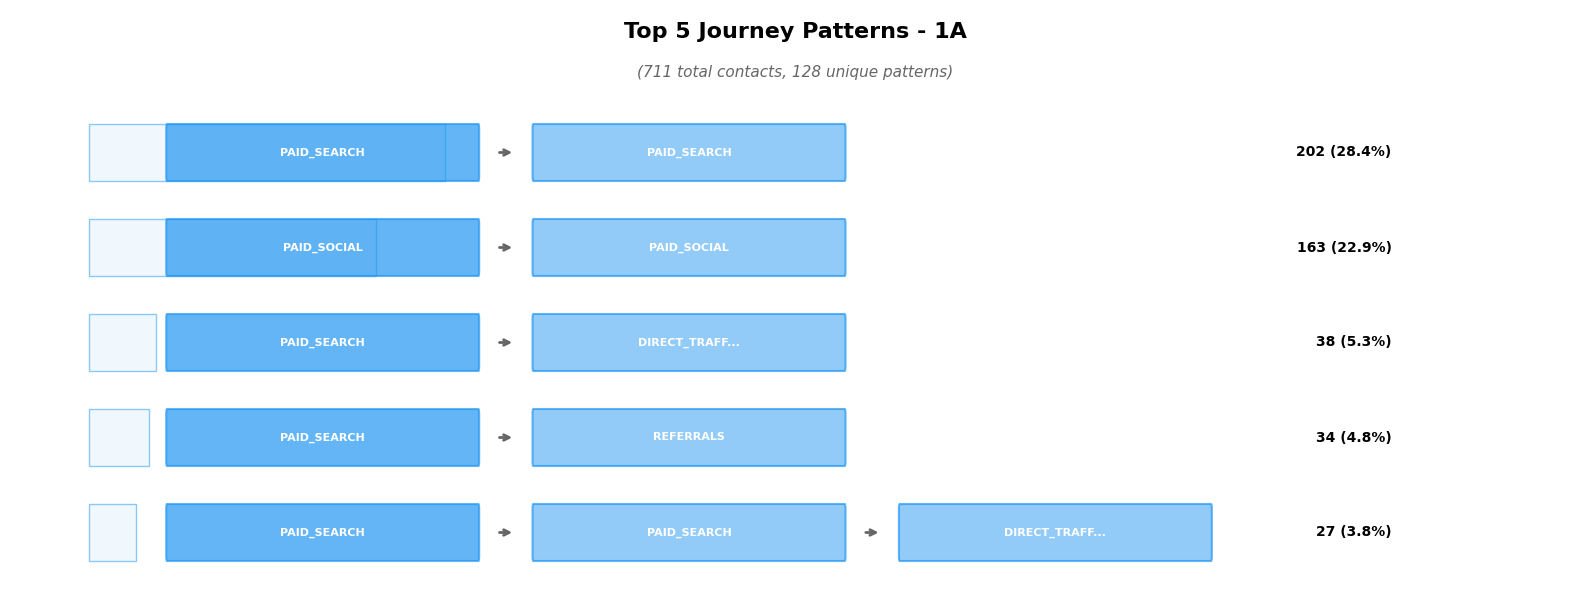


Top 5 Journey Patterns for 1A
1. [202 contacts, 28.4%] PAID_SEARCH → PAID_SEARCH
2. [163 contacts, 22.9%] PAID_SOCIAL → PAID_SOCIAL
3. [38 contacts, 5.3%] PAID_SEARCH → DIRECT_TRAFFIC
4. [34 contacts, 4.8%] PAID_SEARCH → REFERRALS
5. [27 contacts, 3.8%] PAID_SEARCH → PAID_SEARCH → DIRECT_TRAFFIC



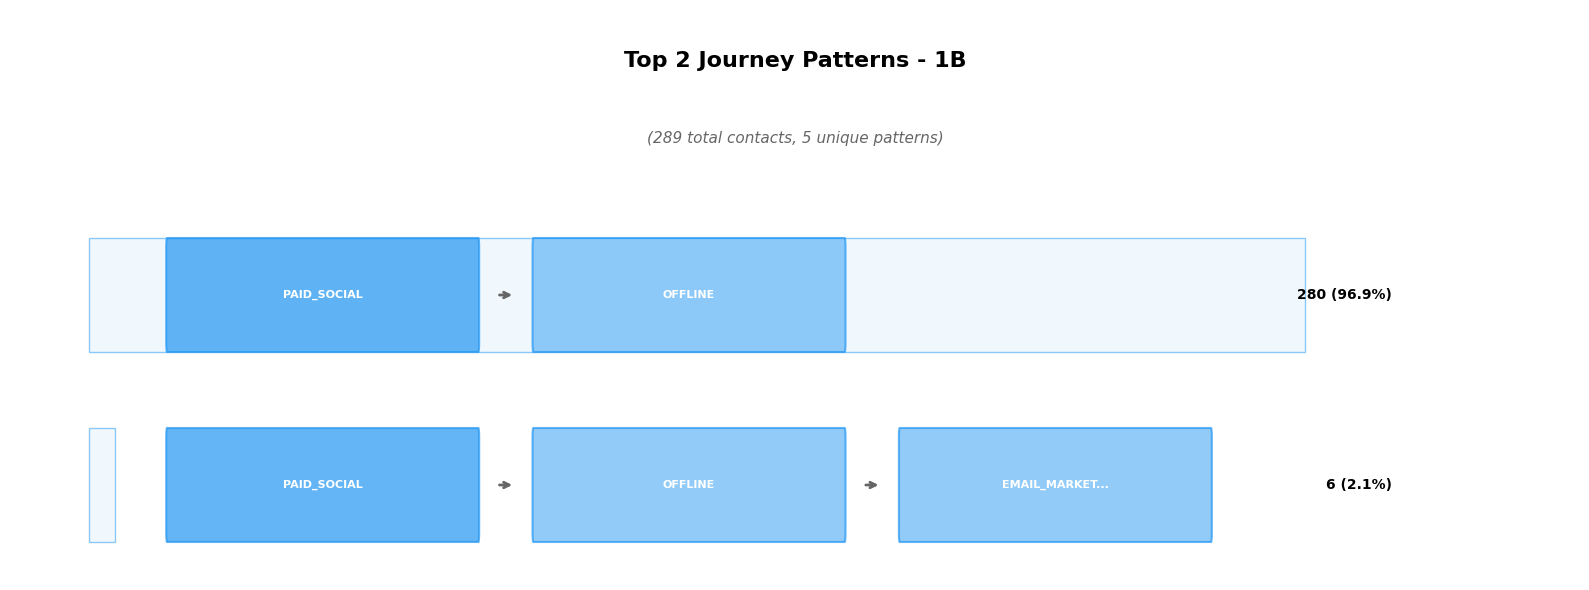


Top 2 Journey Patterns for 1B
1. [280 contacts, 96.9%] PAID_SOCIAL → OFFLINE
2. [6 contacts, 2.1%] PAID_SOCIAL → OFFLINE → EMAIL_MARKETING



In [61]:
# 🧪 EXAMPLE 1: Analyze patterns by engagement segment (1A vs 1B)
# Uncomment to run:

results = analyze_journey_patterns(segment_column='segment_engagement', max_contacts=1000)
display_journey_patterns(results, segment_column='segment_engagement')

# # Visualize top patterns for 1A
visualize_top_journey_patterns(results, segment='1A', top_n=5)

# # Visualize top patterns for 1B
visualize_top_journey_patterns(results, segment='1B', top_n=5)


🔍 Analyzing journey patterns by platform_tag...


📊 JOURNEY PATTERN ANALYSIS BY PLATFORM_TAG


🎯 Segment: Facebook
──────────────────────────────────────────────────────────────────────
Total Contacts: 228
Unique Journey Patterns: 26
Average Journey Length: 2.3 touchpoints
Journey Length Range: 2 - 14 touchpoints

📈 Most Common Journey Patterns:
  1. [163 contacts, 71.5%] PAID_SOCIAL → PAID_SOCIAL
  2. [12 contacts, 5.3%] PAID_SOCIAL → DIRECT_TRAFFIC
  3. [12 contacts, 5.3%] PAID_SOCIAL → EMAIL_MARKETING
  4. [10 contacts, 4.4%] PAID_SOCIAL → PAID_SOCIAL → DIRECT_TRAFFIC
  5. [5 contacts, 2.2%] PAID_SOCIAL → REFERRALS
  6. [4 contacts, 1.8%] PAID_SOCIAL → PAID_SOCIAL → EMAIL_MARKETING
  7. [3 contacts, 1.3%] PAID_SOCIAL → SOCIAL_MEDIA


🎯 Segment: Mixed
──────────────────────────────────────────────────────────────────────
Total Contacts: 333
Unique Journey Patterns: 23
Average Journey Length: 2.23 touchpoints
Journey Length Range: 2 - 14 touchpoints

📈 Most Common Journey Patterns:
  

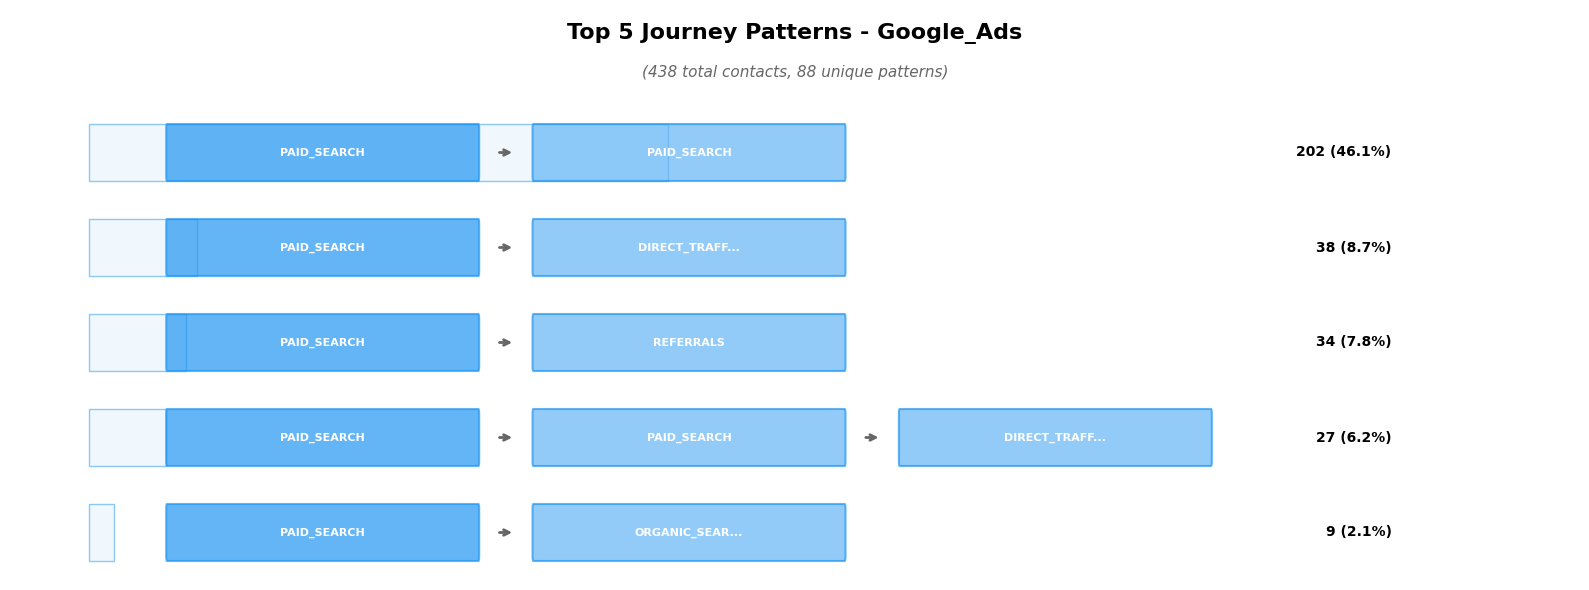


Top 5 Journey Patterns for Google_Ads
1. [202 contacts, 46.1%] PAID_SEARCH → PAID_SEARCH
2. [38 contacts, 8.7%] PAID_SEARCH → DIRECT_TRAFFIC
3. [34 contacts, 7.8%] PAID_SEARCH → REFERRALS
4. [27 contacts, 6.2%] PAID_SEARCH → PAID_SEARCH → DIRECT_TRAFFIC
5. [9 contacts, 2.1%] PAID_SEARCH → ORGANIC_SEARCH



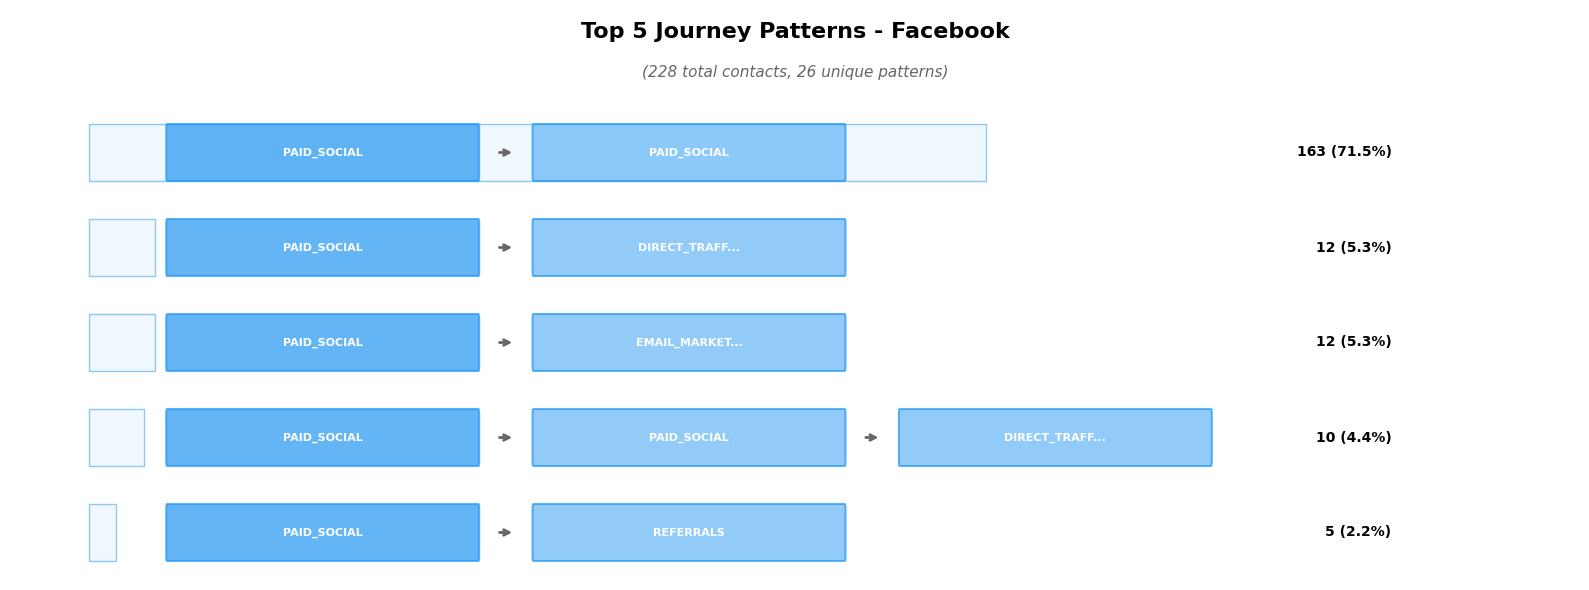


Top 5 Journey Patterns for Facebook
1. [163 contacts, 71.5%] PAID_SOCIAL → PAID_SOCIAL
2. [12 contacts, 5.3%] PAID_SOCIAL → DIRECT_TRAFFIC
3. [12 contacts, 5.3%] PAID_SOCIAL → EMAIL_MARKETING
4. [10 contacts, 4.4%] PAID_SOCIAL → PAID_SOCIAL → DIRECT_TRAFFIC
5. [5 contacts, 2.2%] PAID_SOCIAL → REFERRALS



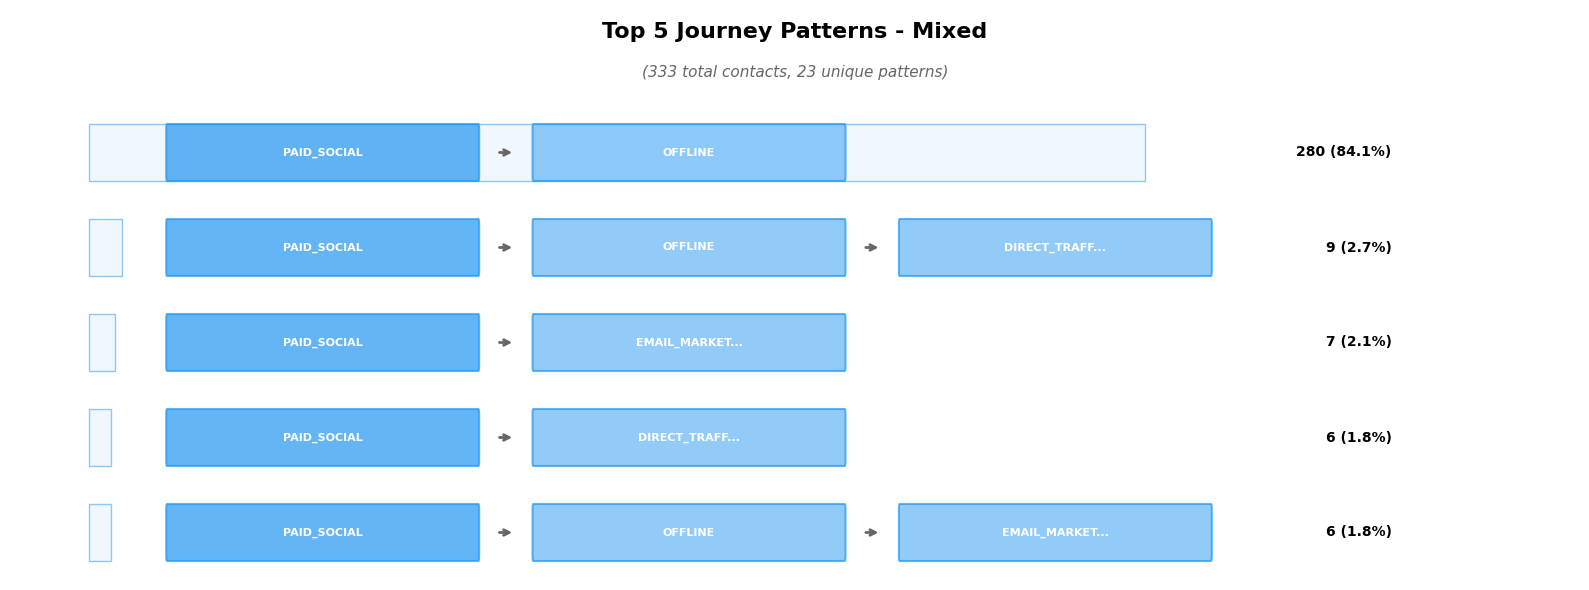


Top 5 Journey Patterns for Mixed
1. [280 contacts, 84.1%] PAID_SOCIAL → OFFLINE
2. [9 contacts, 2.7%] PAID_SOCIAL → OFFLINE → DIRECT_TRAFFIC
3. [7 contacts, 2.1%] PAID_SOCIAL → EMAIL_MARKETING
4. [6 contacts, 1.8%] PAID_SOCIAL → DIRECT_TRAFFIC
5. [6 contacts, 1.8%] PAID_SOCIAL → OFFLINE → EMAIL_MARKETING



In [62]:
# 🧪 EXAMPLE 2: Analyze patterns by platform tag
# Uncomment to run:

results_platform = analyze_journey_patterns(segment_column='platform_tag', max_contacts=1000)
display_journey_patterns(results_platform, segment_column='platform_tag')


# # Visualize Facebook journeys
visualize_top_journey_patterns(results_platform, segment='Google_Ads', top_n=5)

# # Visualize Facebook journeys
visualize_top_journey_patterns(results_platform, segment='Facebook', top_n=5)

# # Visualize Instagram journeys
visualize_top_journey_patterns(results_platform, segment='Mixed', top_n=5)


In [63]:
# 🧪 EXAMPLE 3: Compare closed vs open deal journeys
# Uncomment to run:

# 
outcome_results = compare_journey_patterns_by_outcome(max_contacts=1000)

# # This will show:
# # - Top journey patterns for closed deals
# # - Top journey patterns for open/not closed contacts
# # - Average journey length comparison
# # - Insights on differences


🔍 Comparing journey patterns by outcome (close_date)...

✅ Closed Deals: 64 contacts
   Top 5 Journey Patterns:
   1. [5 contacts, 7.8%] PAID_SEARCH → PAID_SEARCH
   2. [4 contacts, 6.2%] PAID_SEARCH → PAID_SEARCH → DIRECT_TRAFFIC
   3. [3 contacts, 4.7%] PAID_SEARCH → DIRECT_TRAFFIC
   4. [2 contacts, 3.1%] PAID_SOCIAL → OFFLINE
   5. [2 contacts, 3.1%] PAID_SEARCH → DIRECT_TRAFFIC → EMAIL_MARKETING

⏳ Open/Not Closed: 936 contacts
   Top 5 Journey Patterns:
   1. [278 contacts, 29.7%] PAID_SOCIAL → OFFLINE
   2. [197 contacts, 21.0%] PAID_SEARCH → PAID_SEARCH
   3. [162 contacts, 17.3%] PAID_SOCIAL → PAID_SOCIAL
   4. [35 contacts, 3.7%] PAID_SEARCH → DIRECT_TRAFFIC
   5. [32 contacts, 3.4%] PAID_SEARCH → REFERRALS

📊 Journey Length Comparison:
   Closed Deals: 4.61 touchpoints (avg)
   Open/Not Closed: 2.30 touchpoints (avg)
   💡 Insight: Closed deals have 2.30 more touchpoints on average




In [64]:
# 🧪 EXAMPLE 4: Analyze patterns by segment overlay (combined engagement + platform)
# Uncomment to run:

results_overlay = analyze_journey_patterns(segment_column='segment_overlay', max_contacts=1000)
display_journey_patterns(results_overlay, segment_column='segment_overlay')


🔍 Analyzing journey patterns by segment_overlay...


📊 JOURNEY PATTERN ANALYSIS BY SEGMENT_OVERLAY


🎯 Segment: 1A + Facebook
──────────────────────────────────────────────────────────────────────
Total Contacts: 227
Unique Journey Patterns: 25
Average Journey Length: 2.3 touchpoints
Journey Length Range: 2 - 14 touchpoints

📈 Most Common Journey Patterns:
  1. [163 contacts, 71.8%] PAID_SOCIAL → PAID_SOCIAL
  2. [12 contacts, 5.3%] PAID_SOCIAL → DIRECT_TRAFFIC
  3. [12 contacts, 5.3%] PAID_SOCIAL → EMAIL_MARKETING
  4. [10 contacts, 4.4%] PAID_SOCIAL → PAID_SOCIAL → DIRECT_TRAFFIC
  5. [5 contacts, 2.2%] PAID_SOCIAL → REFERRALS
  6. [4 contacts, 1.8%] PAID_SOCIAL → PAID_SOCIAL → EMAIL_MARKETING
  7. [3 contacts, 1.3%] PAID_SOCIAL → SOCIAL_MEDIA


🎯 Segment: 1A + Mixed
──────────────────────────────────────────────────────────────────────
Total Contacts: 46
Unique Journey Patterns: 20
Average Journey Length: 3.5 touchpoints
Journey Length Range: 2 - 14 touchpoints

📈 Most Common Journe

In [65]:
# 💡 Quick Pattern Analysis Summary
# Run this to get a complete overview:

def quick_pattern_summary(max_contacts=500):
    """
    Quick summary of journey patterns across different dimensions.
    """
    print("🚀 QUICK JOURNEY PATTERN SUMMARY")
    print("="*70)
    print(f"Analyzing up to {max_contacts:,} contacts...\n")
    
    # 1. By engagement
    print("\n" + "="*70)
    print("1️⃣  PATTERNS BY ENGAGEMENT (1A vs 1B)")
    print("="*70)
    results_eng = analyze_journey_patterns(segment_column='segment_engagement', 
                                          max_contacts=max_contacts, min_pattern_count=2)
    for segment, data in results_eng.items():
        print(f"\n{segment}: {data['total_contacts']} contacts, "
              f"{data['avg_journey_length']} avg touchpoints, "
              f"{data['unique_patterns']} unique patterns")
    
    # 2. By platform
    print("\n" + "="*70)
    print("2️⃣  PATTERNS BY PLATFORM TAG")
    print("="*70)
    results_plat = analyze_journey_patterns(segment_column='platform_tag', 
                                           max_contacts=max_contacts, min_pattern_count=2)
    for segment, data in sorted(results_plat.items(), key=lambda x: x[1]['total_contacts'], reverse=True)[:5]:
        print(f"\n{segment}: {data['total_contacts']} contacts, "
              f"{data['avg_journey_length']} avg touchpoints")
    
    # 3. Closed vs Open
    print("\n" + "="*70)
    print("3️⃣  CLOSED VS OPEN COMPARISON")
    print("="*70)
    outcome_results = compare_journey_patterns_by_outcome(max_contacts=max_contacts)
    
    print("\n" + "="*70)
    print("✅ SUMMARY COMPLETE!")
    print("="*70)
    print("\nNext steps:")
    print("- Use visualize_top_journey_patterns() to see visual comparisons")
    print("- Use display_journey_patterns() for detailed breakdowns")
    print("- Increase max_contacts for full dataset analysis")
    
    return {
        'engagement': results_eng,
        'platform': results_plat,
        'outcome': outcome_results
    }

# Uncomment to run quick summary:
summary = quick_pattern_summary(max_contacts=500)

🚀 QUICK JOURNEY PATTERN SUMMARY
Analyzing up to 500 contacts...


1️⃣  PATTERNS BY ENGAGEMENT (1A vs 1B)
🔍 Analyzing journey patterns by segment_engagement...


1A: 372 contacts, 2.23 avg touchpoints, 45 unique patterns

1B: 128 contacts, 2.01 avg touchpoints, 2 unique patterns

2️⃣  PATTERNS BY PLATFORM TAG
🔍 Analyzing journey patterns by platform_tag...


Facebook: 180 contacts, 2.13 avg touchpoints

Google_Ads: 168 contacts, 2.21 avg touchpoints

Mixed: 151 contacts, 2.15 avg touchpoints

Instagram: 1 contacts, 4.0 avg touchpoints

3️⃣  CLOSED VS OPEN COMPARISON
🔍 Comparing journey patterns by outcome (close_date)...

✅ Closed Deals: 18 contacts
   Top 5 Journey Patterns:
   1. [2 contacts, 11.1%] PAID_SEARCH → PAID_SEARCH → DIRECT_TRAFFIC
   2. [2 contacts, 11.1%] PAID_SEARCH → DIRECT_TRAFFIC → EMAIL_MARKETING
   3. [2 contacts, 11.1%] PAID_SEARCH → DIRECT_TRAFFIC
   4. [1 contacts, 5.6%] PAID_SOCIAL → PAID_SOCIAL
   5. [1 contacts, 5.6%] PAID_SOCIAL → REFERRALS → DIRECT_TRAFFIC → 